In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')

#                                       APPLICATION DATA


In [2]:
#Loading application_data
application_df=pd.read_csv(r'C:\Users\1956802\Downloads\application_data (1).csv')
application_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [3]:
#Loading Columns description data to check each column
columns_df=pd.read_csv(r'C:\Users\1956802\Downloads\columns_description (1).csv',sep=',', encoding='cp1252')
columns_df

Unnamed: 0                     Table                        Row  \
0             1          application_data                 SK_ID_CURR   
1             2          application_data                     TARGET   
2             5          application_data         NAME_CONTRACT_TYPE   
3             6          application_data                CODE_GENDER   
4             7          application_data               FLAG_OWN_CAR   
..          ...                       ...                        ...   
155         209  previous_application.csv             DAYS_FIRST_DUE   
156         210  previous_application.csv  DAYS_LAST_DUE_1ST_VERSION   
157         211  previous_application.csv              DAYS_LAST_DUE   
158         212  previous_application.csv           DAYS_TERMINATION   
159         213  previous_application.csv  NFLAG_INSURED_ON_APPROVAL   

                                           Description  \
0                             ID of loan in our sample   
1    Target variable (1 - client with payment diffi...   
2          Identification if loan is cash or revolving   
3                                 Gender of the client   
4                        Flag if the client owns a car   
..                                                 ...   
155  Relative to application date of current applic...   
156  Relative to application date of current applic...   
157  Relative to application date of current applic...   
158  Relative to application date of current applic...   
159  Did the client requested insurance during the ...   

                                   Special  
0                                      NaN  
1                                      NaN  
2                                      NaN  
3                                      NaN  
4                                      NaN  
..                                     ...  
155  time only relative to the application  
156  time only relative to the application  
157  time only relative to the application  
158  time only relative to the application  
159                                    NaN  

[160 rows x 5 columns]

In [4]:
#Finding number of null values in each column
application_df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [5]:
for i in range(columns_df.shape[0]):
    print(columns_df.Row[i],'=======>',columns_df.Description[i])
    print('---------------------------------------------------')
    print('---------------------------------------------------')
   

SK_ID_CURR =======> ID of loan in our sample
---------------------------------------------------
---------------------------------------------------
TARGET =======> Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)
---------------------------------------------------
---------------------------------------------------
NAME_CONTRACT_TYPE =======> Identification if loan is cash or revolving
---------------------------------------------------
---------------------------------------------------
CODE_GENDER =======> Gender of the client
---------------------------------------------------
---------------------------------------------------
FLAG_OWN_CAR =======> Flag if the client owns a car
---------------------------------------------------
---------------------------------------------------
FLAG_OWN_REALTY =======> Flag if client owns a house or flat
----

##### Data cleaning and handling of null values

In [6]:
#Percentage of null values of each column
Percentage_of_null = (application_df.isna().sum()/application_df.shape[0])*100
for i in range(len(Percentage_of_null)):
    print(Percentage_of_null[i])

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.003902299429939092
0.09040327012692229
0.42014757195677555
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
65.9908100848425
0.0
0.0
0.0
0.0
0.0
0.0
31.345545362604916
0.0006503832383231819
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
56.381072546998325
0.21462646864665005
19.825307062186393
50.74972927797705
58.51595552679416
48.781019215572776
66.49778381911543
69.87229725115525
53.29597965601231
50.3487680115508
49.76082156410665
67.84862980511267
59.376737742714894
68.35495315614726
50.193326417591564
69.43296337366793
55.17916432257708
50.74972927797705
58.51595552679416
48.781019215572776
66.49778381911543
69.87229725115525
53.29597965601231
50.3487680115508
49.76082156410665
67.84862980511267
59.376737742714894
68.35495315614726
50.193326417591564
69.43296337366793
55.17916432257708
50.74972927797705
58.51595552679416
48.781019215572776
66.49778381911543
69.87229725115525
53.29597965601231
50.3487680115508
49.76082156410665
67.84862980511267
59.3767377427

##### Since the columns with greater then 50% of null values they cannot be used for analysis ,we are considering to remove these columns and move forward with the analysis with remaining columns

In [7]:
#Percentage of columns whose percentage of null values is less than 30
Percentage_of_null[Percentage_of_null<50]

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 81, dtype: float64

#### Bar plot columns whose percentage of  null values<50% 

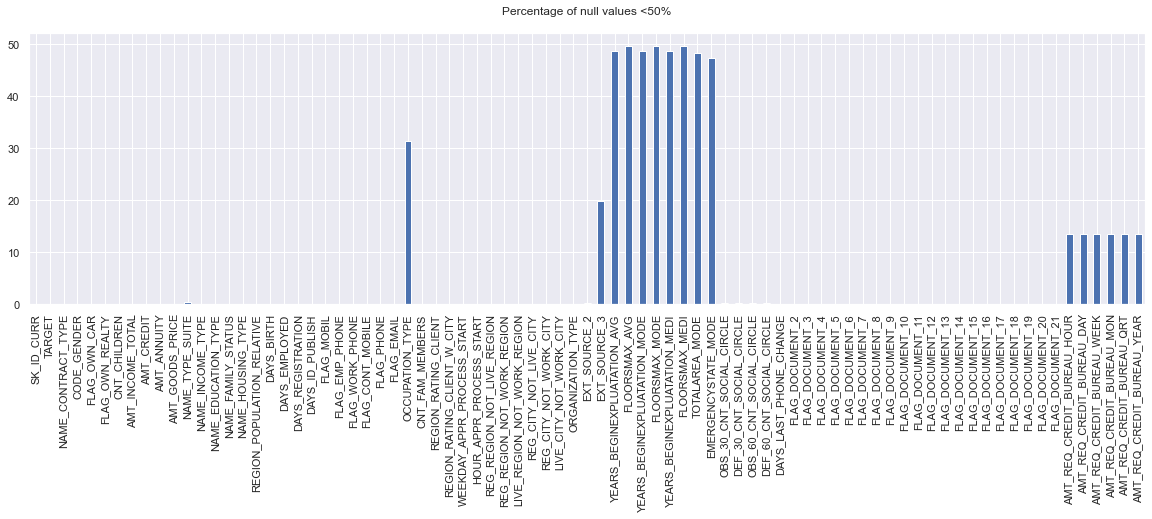

In [8]:
Percentage_of_null[Percentage_of_null<50].plot(kind='bar',figsize=(20,5))
#plt.bar(columns_list,Percentage_of_null)
plt.title("Percentage of null values <50%\n")
plt.xticks(rotation=90)
plt.show()

In [9]:
application_df=application_df.loc[:,Percentage_of_null<50]

#print(new_columns_list)
new_columns_values=((application_df.isna().sum()/application_df.shape[0])*100).sort_values(ascending=False)
#print(new_columns_values.index)
new_columns_list=list(new_columns_values.index)
for i in range(len(new_columns_values)):
    print(new_columns_list[i],'====>',new_columns_values[i],'\n')

FLOORSMAX_AVG ====> 49.76082156410665 

FLOORSMAX_MODE ====> 49.76082156410665 

FLOORSMAX_MEDI ====> 49.76082156410665 

YEARS_BEGINEXPLUATATION_AVG ====> 48.781019215572776 

YEARS_BEGINEXPLUATATION_MODE ====> 48.781019215572776 

YEARS_BEGINEXPLUATATION_MEDI ====> 48.781019215572776 

TOTALAREA_MODE ====> 48.26851722377411 

EMERGENCYSTATE_MODE ====> 47.39830445089769 

OCCUPATION_TYPE ====> 31.345545362604916 

EXT_SOURCE_3 ====> 19.825307062186393 

AMT_REQ_CREDIT_BUREAU_YEAR ====> 13.501630835970097 

AMT_REQ_CREDIT_BUREAU_HOUR ====> 13.501630835970097 

AMT_REQ_CREDIT_BUREAU_DAY ====> 13.501630835970097 

AMT_REQ_CREDIT_BUREAU_WEEK ====> 13.501630835970097 

AMT_REQ_CREDIT_BUREAU_MON ====> 13.501630835970097 

AMT_REQ_CREDIT_BUREAU_QRT ====> 13.501630835970097 

NAME_TYPE_SUITE ====> 0.42014757195677555 

DEF_30_CNT_SOCIAL_CIRCLE ====> 0.3320206431639844 

OBS_60_CNT_SOCIAL_CIRCLE ====> 0.3320206431639844 

DEF_60_CNT_SOCIAL_CIRCLE ====> 0.3320206431639844 

OBS_30_CNT_SOCIAL_CI

#### Now here we have the data whose null values are less than 50% in descending order of percentages
1. We have to deal with the null values of each of these columns 
2. So we will deal with null values of numerical data and categorical data separately 

### Dealing Null values of numerical columns

In [10]:
#1.FLOORSMAX_AVG column
application_df.FLOORSMAX_AVG.describe() 

count    154491.000000
mean          0.226282
std           0.144641
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_AVG, dtype: float64

In [11]:
#Filling the null values with median
application_df.FLOORSMAX_AVG=application_df.FLOORSMAX_AVG.fillna(application_df.FLOORSMAX_AVG.median())

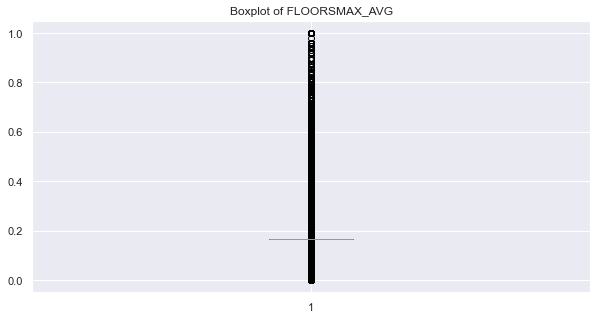

In [12]:
plt.figure(figsize=(10,5))
plt.title("Boxplot of FLOORSMAX_AVG")
plt.boxplot(application_df.FLOORSMAX_AVG)
plt.show()

In [13]:
application_df=application_df.drop(['FLOORSMAX_AVG'],axis=1) #FLOORSMAX_AVG column is dropped


###### Here on observation 
1. FLOORSMAX_AVG column has many outliers 
2. It is also irrerelevent to the TARGET column
3. So we drop the column

In [14]:
#2.FLOORSMAX_MODE column
application_df.FLOORSMAX_MODE.describe() 

count    154491.000000
mean          0.222315
std           0.143709
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_MODE, dtype: float64

In [15]:
#Filling the null values with median
application_df.FLOORSMAX_MODE=application_df.FLOORSMAX_MODE.fillna(application_df.FLOORSMAX_MODE.median())

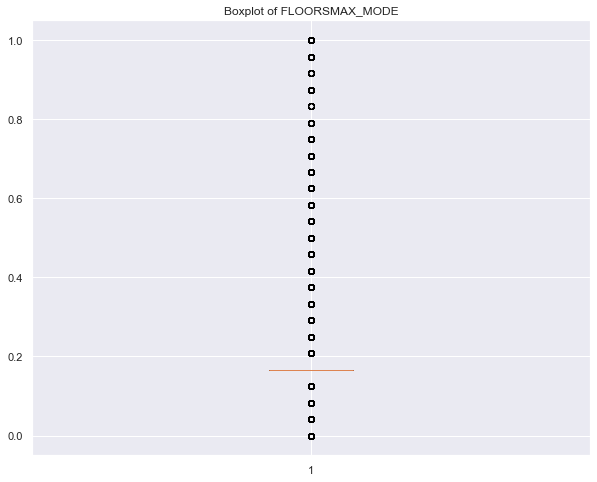

In [16]:
plt.figure(figsize=(10,8))
plt.title("Boxplot of FLOORSMAX_MODE")
plt.boxplot(application_df.FLOORSMAX_MODE)
plt.show()

In [17]:
application_df=application_df.drop(['FLOORSMAX_MODE'],axis=1) #FLOORSMAX_MODE column is dropped

##### Here on observation 
1. FLOORSMAX_MODE column has many outliers 
2. It is also irrerelevent to the TARGET column
3. So we drop the column

In [18]:
#3.FLOORSMAX_MEDI column
application_df.FLOORSMAX_MEDI.describe()

count    154491.000000
mean          0.225897
std           0.145067
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_MEDI, dtype: float64

In [19]:
#Filling the null values with median
application_df.FLOORSMAX_MEDI=application_df.FLOORSMAX_MEDI.fillna(application_df.FLOORSMAX_MEDI.median())

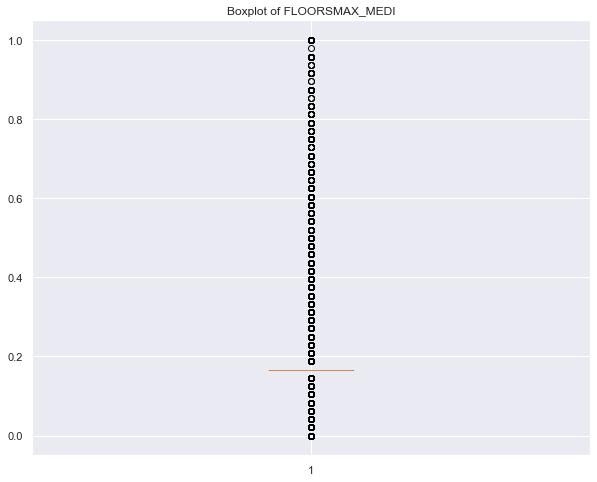

In [20]:
plt.figure(figsize=(10,8))
plt.title("Boxplot of FLOORSMAX_MEDI")
plt.boxplot(application_df.FLOORSMAX_MEDI)
plt.show()

In [21]:
application_df=application_df.drop(['FLOORSMAX_MEDI'],axis=1) #FLOORSMAX_MEDI column is dropped

#### Here on observation 
1. FLOORSMAX_MEDI column has many outliers 
2. It is also irrerelevent to the TARGET column
3. So we drop the column

In [22]:
#4.YEARS_BEGINEXPLUATATION_AVG column
application_df.YEARS_BEGINEXPLUATATION_AVG.describe()

count    157504.000000
mean          0.977735
std           0.059223
min           0.000000
25%           0.976700
50%           0.981600
75%           0.986600
max           1.000000
Name: YEARS_BEGINEXPLUATATION_AVG, dtype: float64

In [23]:
#Filling the null values with mean
application_df.YEARS_BEGINEXPLUATATION_AVG=application_df.YEARS_BEGINEXPLUATATION_AVG.fillna(application_df.YEARS_BEGINEXPLUATATION_AVG.mean())

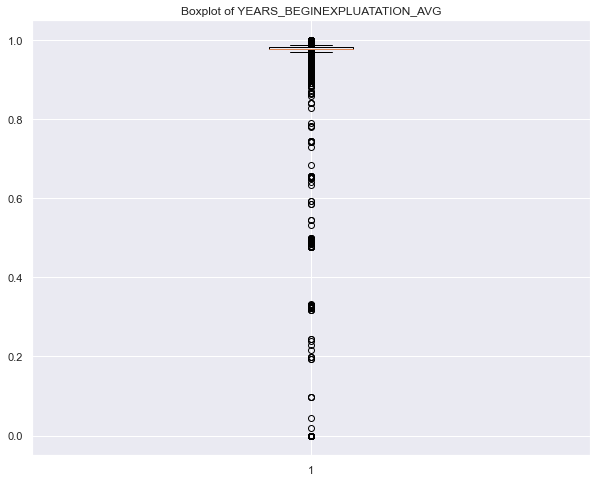

In [24]:
plt.figure(figsize=(10,8))
plt.title("Boxplot of YEARS_BEGINEXPLUATATION_AVG")
plt.boxplot(application_df.YEARS_BEGINEXPLUATATION_AVG)
plt.show()

In [25]:
application_df=application_df.drop(['YEARS_BEGINEXPLUATATION_AVG'],axis=1) #YEARS_BEGINEXPLUATATION_AVG column is dropped

#### Here on observation 
1. YEARS_BEGINEXPLUATATION_AVG column has many outliers 
2. It is also irrerelevent to the TARGET column
3. So we drop the column

In [26]:
#5.YEARS_BEGINEXPLUATATION_MODE column
application_df.YEARS_BEGINEXPLUATATION_MODE.describe()

count    157504.000000
mean          0.977065
std           0.064575
min           0.000000
25%           0.976700
50%           0.981600
75%           0.986600
max           1.000000
Name: YEARS_BEGINEXPLUATATION_MODE, dtype: float64

In [27]:
#Filling the null values with mean
application_df.YEARS_BEGINEXPLUATATION_MODE=application_df.YEARS_BEGINEXPLUATATION_MODE.fillna(application_df.YEARS_BEGINEXPLUATATION_MODE.mean())

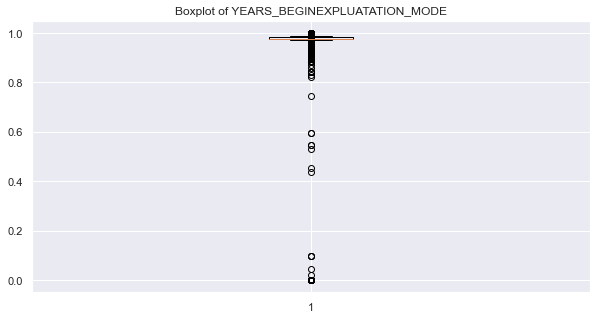

In [28]:
plt.figure(figsize=(10,5))
plt.title("Boxplot of YEARS_BEGINEXPLUATATION_MODE")
plt.boxplot(application_df.YEARS_BEGINEXPLUATATION_MODE)
plt.show()

In [29]:
application_df=application_df.drop(['YEARS_BEGINEXPLUATATION_MODE'],axis=1) #YEARS_BEGINEXPLUATATION_MODE column is dropped

#### Here on observation 
1. YEARS_BEGINEXPLUATATION_MODE column has many outliers 
2. It is also irrerelevent to the TARGET column
3. So we drop the column

In [30]:
#6.YEARS_BEGINEXPLUATATION_MEDI column
application_df.YEARS_BEGINEXPLUATATION_MEDI.describe()

count    157504.000000
mean          0.977752
std           0.059897
min           0.000000
25%           0.976700
50%           0.981600
75%           0.986600
max           1.000000
Name: YEARS_BEGINEXPLUATATION_MEDI, dtype: float64

In [31]:
#Filling the null values with mean
application_df.YEARS_BEGINEXPLUATATION_MEDI=application_df.YEARS_BEGINEXPLUATATION_MEDI.fillna(application_df.YEARS_BEGINEXPLUATATION_MEDI.mean())

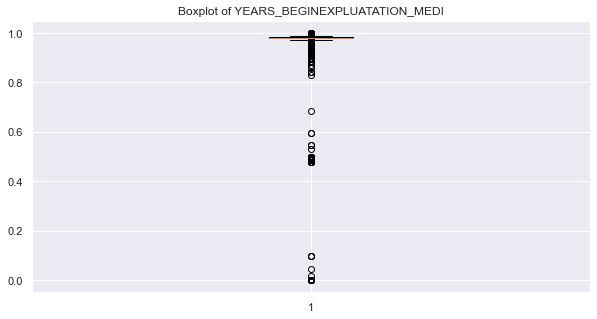

In [32]:
plt.figure(figsize=(10,5))
plt.title("Boxplot of YEARS_BEGINEXPLUATATION_MEDI")
plt.boxplot(application_df.YEARS_BEGINEXPLUATATION_MEDI)
plt.show()

In [33]:
application_df=application_df.drop(['YEARS_BEGINEXPLUATATION_MEDI'],axis=1) #YEARS_BEGINEXPLUATATION_MEDI column is dropped

#### Here on observation 
1. YEARS_BEGINEXPLUATATION_MEDI column has many outliers 
2. It is also irrerelevent to the TARGET column
3. So we drop the column

In [34]:
#7.TOTALAREA_MODE column
application_df.TOTALAREA_MODE.describe()

count    159080.000000
mean          0.102547
std           0.107462
min           0.000000
25%           0.041200
50%           0.068800
75%           0.127600
max           1.000000
Name: TOTALAREA_MODE, dtype: float64

In [35]:
#Filling the null values with mean
application_df.TOTALAREA_MODE=application_df.TOTALAREA_MODE.fillna(application_df.TOTALAREA_MODE.mean())

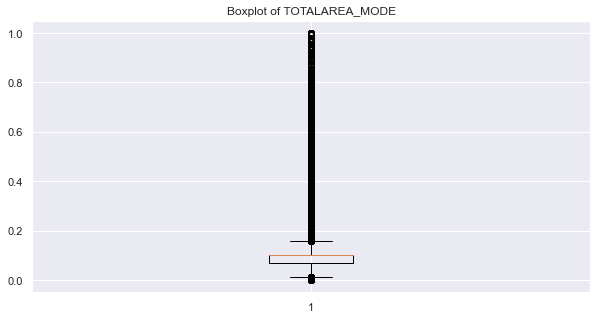

In [36]:
plt.figure(figsize=(10,5))
plt.title("Boxplot of TOTALAREA_MODE")
plt.boxplot(application_df.TOTALAREA_MODE)
plt.show()

In [37]:
application_df=application_df.drop(['TOTALAREA_MODE'],axis=1) #TOTALAREA_MODE column is dropped

#### Here on observation 
1. TOTALAREA_MODE column has many outliers 
2. It is also irrerelevent to the TARGET column
3. So we drop the column

In [38]:
application_df.EMERGENCYSTATE_MODE.value_counts()#describe()
#application_df.EMERGENCYSTATE_MODE.head()

No     159428
Yes      2328
Name: EMERGENCYSTATE_MODE, dtype: int64

In [39]:
application_df=application_df.drop(['EMERGENCYSTATE_MODE'],axis=1) #TOTALAREA_MODE column is dropped

#### EMERGENCYSTATE_MODE column is anywhere not related to the TARGET columns analysis so we drop it

In [40]:
#10. EXT_SOURCE_3
application_df.EXT_SOURCE_3.describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

In [41]:
#Filling the null values with mean
application_df.EXT_SOURCE_3=application_df.EXT_SOURCE_3.fillna(application_df.EXT_SOURCE_3.mean())

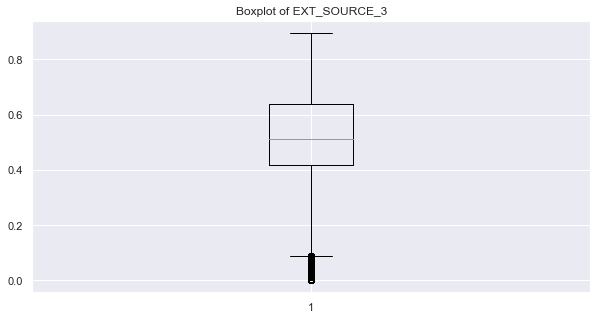

In [42]:
plt.figure(figsize=(10,5))
plt.title("Boxplot of EXT_SOURCE_3")
plt.boxplot(application_df.EXT_SOURCE_3)
plt.show()

In [43]:
application_df=application_df.drop(['EXT_SOURCE_3'],axis=1) #EXT_SOURCE_3 column is dropped

#### As we can observe that most values are outliers which will affect the analysis so it's better to drop the column as it is also insignificant to the TARGET column

In [44]:
amount_list=['AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_WEEK',
             'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR']


In [45]:
application_df[amount_list].describe()

AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_QRT  \
count               265992.000000              265992.000000   
mean                     1.899974                   0.265474   
std                      1.869295                   0.794056   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      1.000000                   0.000000   
75%                      3.000000                   0.000000   
max                     25.000000                 261.000000   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_WEEK  \
count              265992.000000               265992.000000   
mean                    0.267395                    0.034362   
std                     0.916002                    0.204685   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     0.000000                    0.000000   
75%                     0.000000                    0.000000   
max                    27.000000                    8.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_HOUR  
count              265992.000000               265992.000000  
mean                    0.007000                    0.006402  
std                     0.110757                    0.083849  
min                     0.000000                    0.000000  
25%                     0.000000                    0.000000  
50%                     0.000000                    0.000000  
75%                     0.000000                    0.000000  
max                     9.000000                    4.000000

In [46]:
application_df=application_df.drop(amount_list,axis=1) #amount_list columns are dropped 

#### On observation ,
1. All these columns have outliers which affect the data
2. These are all insignificant to the TARGET column ,so we decide to drop these columns

In [47]:
application_df.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [48]:
application_df=application_df[~application_df['NAME_TYPE_SUITE'].isnull()]

#### This is a categorical column 
1. This column has low number of null values so we can remove those rows 
2. we consider the remaining dataframe for analysis

In [49]:
unwanted_columns=['DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE',
                 'DEF_60_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE',
                  'EXT_SOURCE_2','FLAG_MOBIL','FLAG_EMP_PHONE',
              'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
              'FLAG_EMAIL','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3',
              'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5','FLAG_DOCUMENT_6',
              'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8','FLAG_DOCUMENT_9',
              'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11','FLAG_DOCUMENT_12',
              'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15',
              'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17','FLAG_DOCUMENT_18',
              'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20','FLAG_DOCUMENT_21',
              'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY',
              'DAYS_LAST_PHONE_CHANGE','AMT_GOODS_PRICE']

In [50]:
application_df.drop(labels=unwanted_columns,axis=1,inplace=True)

#### All these columns are irrelevent to  the problem domain so there is no need of these columns so we can drop them

* **Among the all FLAG columns the columns FLAG_OWN_CAR	and FLAG_OWN_REALTY contains categorical data. So we need to convert this categorical data into numerical data.**
* **For this conversion we can use encoders like OneHotEncoder or LabelEncoder**

In [51]:
# Casting all variable into numeric in the dataset

numeric_columns=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

application_df[numeric_columns]=application_df[numeric_columns].apply(pd.to_numeric)
application_df.head(5)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ... CNT_FAM_MEMBERS WEEKDAY_APPR_PROCESS_START HOUR_APPR_PROCESS_START  \
0  ...             1.0                  WEDNESDAY                      10   
1  ...             2.0                     MONDAY                      11   
2  ...             1.0                     MONDAY                       9   
3  ...             2.0                  WEDNESDAY                      17   
4  ...             1.0                   THURSDAY                      11   

  REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  
0                       0                        0  Business Entity Type 3  
1                       0                        0                  School  
2                       0                        0              Government  
3                       0                        0  Business Entity Type 3  
4                       1                        1                Religion  

[5 rows x 31 columns]

In [52]:
application_df.AMT_ANNUITY.describe()#value_counts()

count    306207.000000
mean      27122.117024
std       14490.836220
min        1615.500000
25%       16551.000000
50%       24930.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

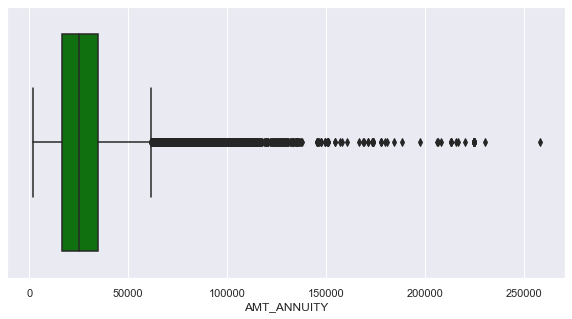

In [53]:
fig=plt.figure(figsize=(10,5))
sns.boxplot(x=application_df['AMT_ANNUITY'],color='green')
plt.show()

#### AMT_ANNUITY column has less null values. Since there ouliers but this column is needed for analysis so we are filling the null values with median

In [54]:
application_df.AMT_ANNUITY=application_df.AMT_ANNUITY.fillna(application_df.AMT_ANNUITY.median())

In [55]:
application_df.CNT_FAM_MEMBERS.describe()#value_counts()

count    306219.000000
mean          2.152786
std           0.910586
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

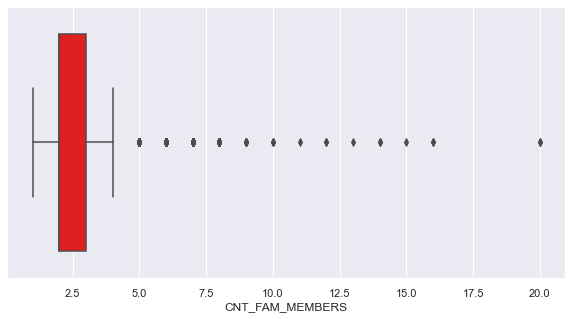

In [56]:
fig=plt.figure(figsize=(10,5))
sns.boxplot(x=application_df['CNT_FAM_MEMBERS'],color='red')
plt.show()

#### CNT_FAM_MEMBERS column has less null values. Since there ouliers but this column is needed for analysis so we are filling the null values with median.

In [57]:
application_df.CNT_FAM_MEMBERS=application_df.CNT_FAM_MEMBERS.fillna(application_df.CNT_FAM_MEMBERS.median())

In [58]:
new_columns_values=((application_df.isna().sum()/application_df.shape[0])*100).sort_values(ascending=False)
#print(new_columns_values.index)
new_columns_list=list(new_columns_values.index)
for i in range(len(new_columns_values)):
    print(new_columns_list[i],'====>',new_columns_values[i],'\n')

OCCUPATION_TYPE ====> 31.35207155663104 

SK_ID_CURR ====> 0.0 

DAYS_BIRTH ====> 0.0 

LIVE_CITY_NOT_WORK_CITY ====> 0.0 

REG_CITY_NOT_WORK_CITY ====> 0.0 

REG_CITY_NOT_LIVE_CITY ====> 0.0 

LIVE_REGION_NOT_WORK_REGION ====> 0.0 

REG_REGION_NOT_WORK_REGION ====> 0.0 

REG_REGION_NOT_LIVE_REGION ====> 0.0 

HOUR_APPR_PROCESS_START ====> 0.0 

WEEKDAY_APPR_PROCESS_START ====> 0.0 

CNT_FAM_MEMBERS ====> 0.0 

DAYS_ID_PUBLISH ====> 0.0 

DAYS_REGISTRATION ====> 0.0 

DAYS_EMPLOYED ====> 0.0 

REGION_POPULATION_RELATIVE ====> 0.0 

TARGET ====> 0.0 

NAME_HOUSING_TYPE ====> 0.0 

NAME_FAMILY_STATUS ====> 0.0 

NAME_EDUCATION_TYPE ====> 0.0 

NAME_INCOME_TYPE ====> 0.0 

NAME_TYPE_SUITE ====> 0.0 

AMT_ANNUITY ====> 0.0 

AMT_CREDIT ====> 0.0 

AMT_INCOME_TOTAL ====> 0.0 

CNT_CHILDREN ====> 0.0 

FLAG_OWN_REALTY ====> 0.0 

FLAG_OWN_CAR ====> 0.0 

CODE_GENDER ====> 0.0 

NAME_CONTRACT_TYPE ====> 0.0 

ORGANIZATION_TYPE ====> 0.0 



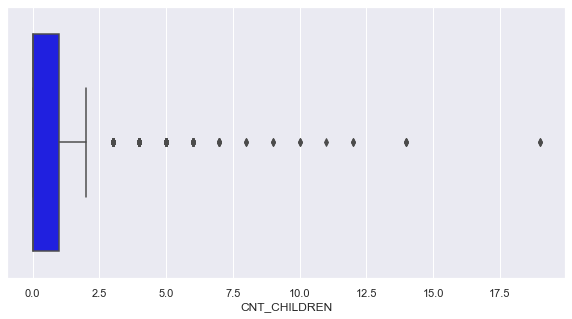

In [59]:
#CNT_CHILDREN column
fig=plt.figure(figsize=(10,5))
sns.boxplot(x=application_df['CNT_CHILDREN'],color='blue')
plt.show()

#### The boxplot shows that the CNT_CHILDREN column has outliers 
1. Many people who apply per for the loan are with 2 children.
2. More than 2 or 3 children are less 


In [60]:
(len(application_df[application_df.CNT_CHILDREN>3])/len(application_df.CNT_CHILDREN>2))*100

0.18058970867255134

####  Since this column has outliers and the percentage of applicants with children count>3 is very very less it is better to replace those values with median.

In [61]:
application_df.loc[application_df['CNT_CHILDREN']>3,'CODE_GENDER']=application_df.CNT_CHILDREN.median()

In [62]:
#Analyzing CODE_GENDER column
application_df.CODE_GENDER.value_counts()

F      201311
M      104351
0.0       553
XNA         4
Name: CODE_GENDER, dtype: int64

#### Here in the CODE_GENDER column we have Female as the highest and next male there are also some unknown values "XNA"
1. The unknown values "XNA" are very very less in number which is only 4.
2. So we can replace these "XNA" values as "F" as it doesnot affect the analysis much 
3. We have 0.0 values which are irrelevent to the gender so we romove the rows that contain 0.0

In [63]:
application_df.loc[application_df['CODE_GENDER']=='XNA','CODE_GENDER']='F'

In [64]:
application_df=application_df[~(application_df['CODE_GENDER']==0.0)]

In [65]:
application_df.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67564
XNA                       55157
Self-employed             38186
Other                     16566
Medicine                  11128
Business Entity Type 2    10489
Government                10332
School                     8824
Trade: type 7              7786
Kindergarten               6820
Construction               6679
Business Entity Type 1     5955
Transport: type 4          5364
Trade: type 3              3471
Industry: type 9           3337
Industry: type 3           3264
Security                   3225
Housing                    2935
Industry: type 11          2691
Military                   2616
Bank                       2484
Agriculture                2427
Police                     2326
Transport: type 2          2184
Postal                     2147
Security Ministries        1960
Trade: type 2              1885
Restaurant                 1794
Services                   1568
University                 1320
Industry: type 7           1299
Transpor

#### In the ORGANIZATION_TYPE column we have unknown values "XNA" which are of no use
1. Since the "XNA" values are large we cannot replace them with other values 
2. So we remove the rows that contain "XNA" values so that it doesn't affect the analysis

In [66]:
application_df=application_df[~(application_df['ORGANIZATION_TYPE']=="XNA")]

In [67]:
application_df.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67564
Self-employed             38186
Other                     16566
Medicine                  11128
Business Entity Type 2    10489
Government                10332
School                     8824
Trade: type 7              7786
Kindergarten               6820
Construction               6679
Business Entity Type 1     5955
Transport: type 4          5364
Trade: type 3              3471
Industry: type 9           3337
Industry: type 3           3264
Security                   3225
Housing                    2935
Industry: type 11          2691
Military                   2616
Bank                       2484
Agriculture                2427
Police                     2326
Transport: type 2          2184
Postal                     2147
Security Ministries        1960
Trade: type 2              1885
Restaurant                 1794
Services                   1568
University                 1320
Industry: type 7           1299
Transport: type 3          1180
Industry

#### Until here the Null values have been handled and also unwanted columns have been removed

In [68]:
application_df.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OCCUPATION_TYPE                40715
CNT_FAM_MEMBERS                    0
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
LIVE_REGION_NOT_WORK_REGION        0
R

## Univariate Analysis of numeric columns

In [69]:
application_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE'],
      dtype='object')

In [70]:
application_df.shape

(250509, 31)

In [71]:
numeric_columns=['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','CNT_FAM_MEMBERS',
       'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY','REGION_POPULATION_RELATIVE']

In [72]:
#for i in numeric_columns:
#    print(i,'=====>',application_df[i].dtype)

In [73]:
application_df['CNT_CHILDREN'].value_counts()#describe()

0    161208
1     59435
2     26256
3      3610
Name: CNT_CHILDREN, dtype: int64

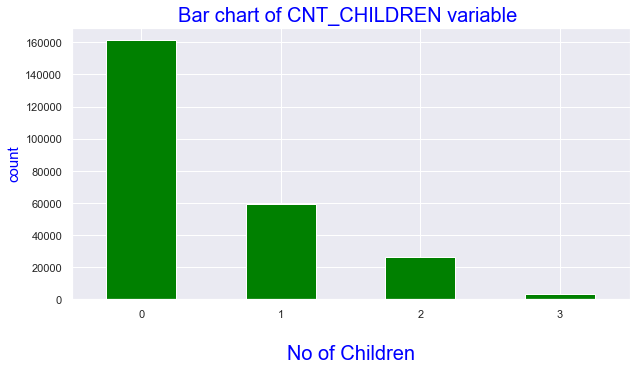

In [74]:
application_df.CNT_CHILDREN.value_counts().plot(kind='bar',figsize=(10,5),color='GREEN')
plt.title("Bar chart of CNT_CHILDREN variable ",fontdict={'fontsize':20,'fontweight':5,'color':'BLUE'})
plt.ylabel("count",fontdict={'fontsize':15,'fontweight':5,'color':'BLUE'})
plt.xticks(ticks=[0,1,2,3],rotation=0)
plt.xlabel("\nNo of Children",fontdict={'fontsize':20,'fontweight':5,'color':'BLUE'})
plt.show()

#### Most people with no children are applying for the loan

In [75]:
application_df['AMT_INCOME_TOTAL'].describe()

count    2.505090e+05
mean     1.759118e+05
std      2.595434e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.575000e+05
75%      2.115000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

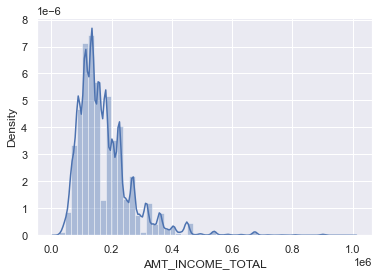

In [76]:
sns.distplot(application_df.AMT_INCOME_TOTAL[application_df.AMT_INCOME_TOTAL < 1000000])
plt.show()

### Dealing with DAYS columns

####  We have different DAYS columns namely 'DAYS_BIRTH' ,'DAYS_EMPLOYED' , 'DAYS_REGISTRATION' ,'DAYS_ID_PUBLISH' and 'DAYS_LAST_PHONE_CHANGE'

In [78]:
days_col=['DAYS_BIRTH' ,'DAYS_EMPLOYED' , 'DAYS_REGISTRATION' ,'DAYS_ID_PUBLISH']
application_df[days_col].describe()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH
count  250509.000000  250509.000000      250509.000000    250509.000000
mean   -14774.468071   -2385.405522       -4640.238810     -2799.953259
std      3664.645178    2339.931734        3252.668382      1515.319124
min    -25200.000000  -17912.000000      -22928.000000     -7197.000000
25%    -17571.000000   -3176.000000       -6958.000000     -4176.000000
50%    -14582.000000   -1648.000000       -4271.000000     -2886.000000
75%    -11776.000000    -767.000000       -1849.000000     -1486.000000
max     -7489.000000       0.000000           0.000000         0.000000

In [79]:
#Using abs() funtion to convert negative data into positive data
application_df[days_col]=abs(application_df[days_col])

In [80]:
application_df[days_col].describe()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH
count  250509.000000  250509.000000      250509.000000    250509.000000
mean    14774.468071    2385.405522        4640.238810      2799.953259
std      3664.645178    2339.931734        3252.668382      1515.319124
min      7489.000000       0.000000           0.000000         0.000000
25%     11776.000000     767.000000        1849.000000      1486.000000
50%     14582.000000    1648.000000        4271.000000      2886.000000
75%     17571.000000    3176.000000        6958.000000      4176.000000
max     25200.000000   17912.000000       22928.000000      7197.000000

**It is wise to handle DAYS_BIRTH data in the form of years rather than days and hence now adding new column named AGE to this dataset and droping off the DAYS_BIRTH column**

**For the same reason it is good to handle DAYS_EMPLOYED data in the form of years rather than days and hence now adding new column named YEARS_EMP to this dataset and droping off the DAYS_EMPLOYED column**

In [81]:
application_df['DAYS_BIRTH'].head()

0     9461
1    16765
2    19046
3    19005
4    19932
Name: DAYS_BIRTH, dtype: int64

In [82]:
# converting days into years and holding that year data in age column
application_df['AGE']=application_df['DAYS_BIRTH'].apply(lambda x: int(x/365))
application_df['AGE'].head()

0    25
1    45
2    52
3    52
4    54
Name: AGE, dtype: int64

In [83]:
# Droping 'DAYS_BIRTH' column
#application_df.drop(columns ='DAYS_BIRTH',inplace = True)
numeric_columns.remove('DAYS_BIRTH')
print(numeric_columns)

['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'REGION_POPULATION_RELATIVE']


In [84]:
application_df['DAYS_EMPLOYED'].head()

0     637
1    1188
2     225
3    3039
4    3038
Name: DAYS_EMPLOYED, dtype: int64

In [85]:
# converting days in DAYS_EMPLOYED into years and holding that year data in YEARS_EMP column
application_df['YEARS_EMP']=application_df['DAYS_EMPLOYED'].apply(lambda x: int(x/365))
application_df['YEARS_EMP'].head()

0    1
1    3
2    0
3    8
4    8
Name: YEARS_EMP, dtype: int64

In [86]:
# Droping 'DAYS_EMPLOYED' column
application_df.drop(columns = 'DAYS_EMPLOYED',inplace = True)

In [87]:
application_df[['AGE', 'YEARS_EMP']].describe()

AGE      YEARS_EMP
count  250509.000000  250509.000000
mean       39.977689       6.040458
std        10.038872       6.420341
min        20.000000       0.000000
25%        32.000000       2.000000
50%        39.000000       4.000000
75%        48.000000       8.000000
max        69.000000      49.000000

**It looks like we have some erroneous data in YEARS_EMP column.**

<AxesSubplot:xlabel='AGE'>

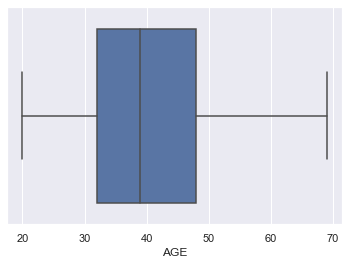

In [88]:
#Distribution of AGE data
sns.boxplot(application_df.AGE)

#### AGE column looks good

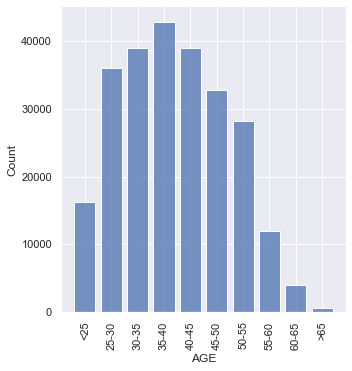

In [91]:
# Distribution plot for AGE column
application_df['AGE'] = pd.cut(application_df.AGE, [0,25,30,35,40,45,50,55,60,65,200], labels = ['<25','25-30','30-35','35-40','40-45',
                                                                                             '45-50','50-55','55-60','60-65','>65'])
sns.displot(application_df['AGE'],discrete=True,shrink=.8)
plt.xticks(rotation = 90)
plt.show()

#### The people who have their age between 35 to 40 are the highest category who are applying for loan.

<AxesSubplot:xlabel='YEARS_EMP'>

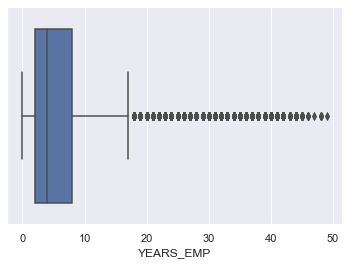

In [92]:
#Distribution of YEARS_EMP data
sns.boxplot(application_df.YEARS_EMP)

**Handling the error data in YEARS_EMP column.**
* **Years of experirnce > 90 years is not a general information and looks like error in data.**

In [93]:
#number of data points with YEARS_EMP > 90
application_df[application_df.YEARS_EMP > 90].shape[0]

0

## Univariate analysis of categorical data

In [94]:
#TARGET column
application_df.TARGET.value_counts()

0    228804
1     21705
Name: TARGET, dtype: int64

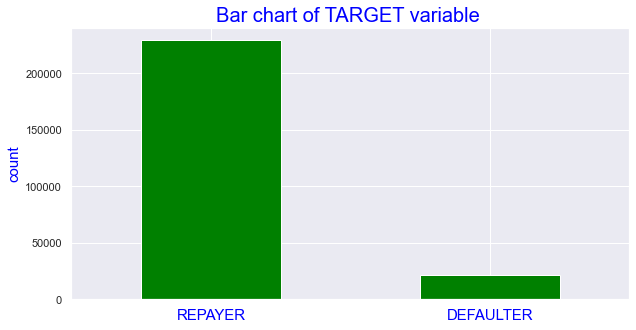

In [95]:
#pie chart of target variable --> 0 for Repayer and 1 for defaulter
application_df.TARGET.value_counts().plot(kind='bar',figsize=(10,5),color='GREEN')
plt.title("Bar chart of TARGET variable ",fontdict={'fontsize':20,'fontweight':5,'color':'BLUE'})
plt.ylabel("count",fontdict={'fontsize':15,'fontweight':5,'color':'BLUE'})
plt.xticks(ticks=[0,1],labels=['REPAYER','DEFAULTER'],rotation=0,fontdict={'fontsize':15,'fontweight':5,'color':'BLUE'})
plt.show()

#### On analyzing TARGET column we can say that  more applicants are 'repayers' and the 'defaulters' are less, as it is shown in the bar graph

In [96]:
application_df.NAME_CONTRACT_TYPE.value_counts()

Cash loans         224908
Revolving loans     25601
Name: NAME_CONTRACT_TYPE, dtype: int64

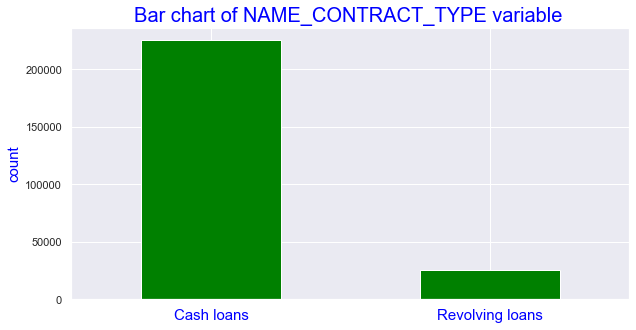

In [97]:
application_df.NAME_CONTRACT_TYPE.value_counts().plot(kind='bar',figsize=(10,5),color='GREEN')
plt.title("Bar chart of NAME_CONTRACT_TYPE variable ",fontdict={'fontsize':20,'fontweight':5,'color':'BLUE'})
plt.ylabel("count",fontdict={'fontsize':15,'fontweight':5,'color':'BLUE'})
plt.xticks(ticks=[0,1],labels=['Cash loans','Revolving loans'],rotation=0,fontdict={'fontsize':15,'fontweight':5,'color':'BLUE'})
plt.show()

#### On analyzing NAME_CONTRACT_TYPE column we can say that more applications are 'Cash loans ' and the 'Revolving loans' are less, as it is shown in the bar graph


In [98]:
application_df['CODE_GENDER'].value_counts()

F    156206
M     94303
Name: CODE_GENDER, dtype: int64

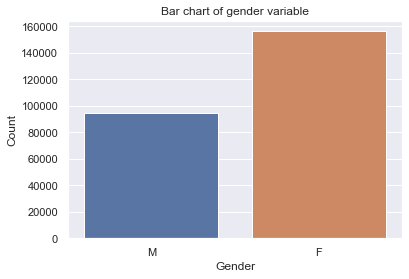

In [99]:
sns.countplot(application_df['CODE_GENDER'])
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Bar chart of gender variable")
plt.show()

#### There are more Females than male who approaching bank to process loans

In [100]:
application_df['FLAG_OWN_CAR'].value_counts()


N    156688
Y     93821
Name: FLAG_OWN_CAR, dtype: int64

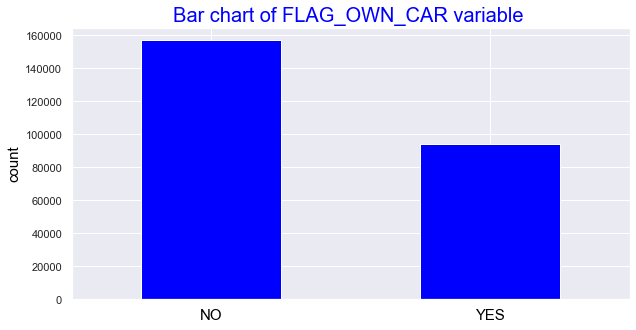

In [101]:
application_df.FLAG_OWN_CAR.value_counts().plot(kind='bar',figsize=(10,5),color='BLUE')
plt.title("Bar chart of FLAG_OWN_CAR variable ",fontdict={'fontsize':20,'fontweight':5,'color':'BLUE'})
plt.ylabel("count",fontdict={'fontsize':15,'fontweight':5,'color':'BLACK'})
plt.xticks(ticks=[0,1],labels=['NO','YES'],rotation=0,fontdict={'fontsize':15,'fontweight':5,'color':'BLACK'})
plt.show()

#### From the bar chart we can say that  most number of people don't own a car

In [102]:
application_df['FLAG_OWN_REALTY'].value_counts()

Y    170309
N     80200
Name: FLAG_OWN_REALTY, dtype: int64

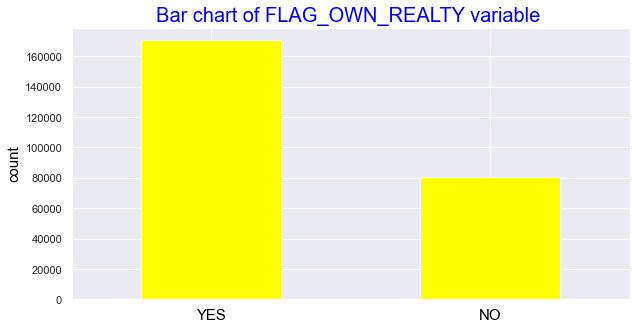

In [103]:
application_df.FLAG_OWN_REALTY.value_counts().plot(kind='bar',figsize=(10,5),color='Yellow')
plt.title("Bar chart of FLAG_OWN_REALTY variable ",fontdict={'fontsize':20,'fontweight':5,'color':'BLUE'})
plt.ylabel("count",fontdict={'fontsize':15,'fontweight':5,'color':'BLACK'})
plt.xticks(ticks=[0,1],labels=['YES','NO'],rotation=0,fontdict={'fontsize':15,'fontweight':5,'color':'BLACK'})
plt.show()

#### From the bar chart we can say that  most number of people own a realty

In [104]:
application_df['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      204609
Family              31584
Spouse, partner      9630
Children             2242
Other_B              1467
Other_A               761
Group of people       216
Name: NAME_TYPE_SUITE, dtype: int64

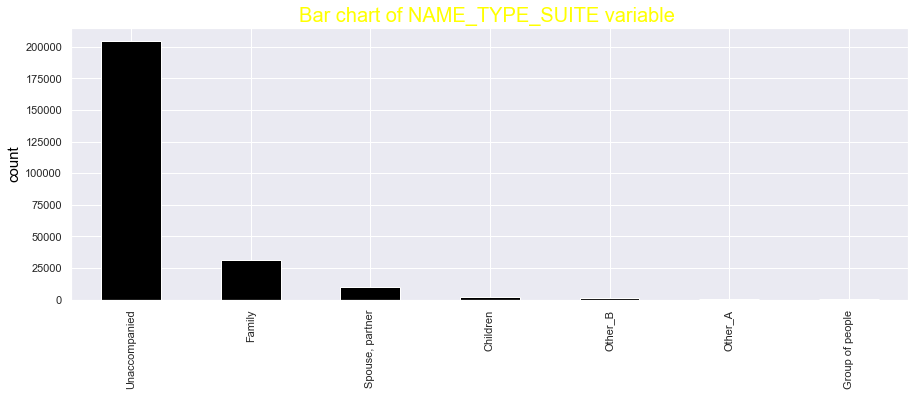

In [105]:
application_df.NAME_TYPE_SUITE.value_counts().plot(kind='bar',figsize=(15,5),color='BLACK')
plt.title("Bar chart of NAME_TYPE_SUITE variable ",fontdict={'fontsize':20,'fontweight':5,'color':'Yellow'})
plt.ylabel("count",fontdict={'fontsize':15,'fontweight':5,'color':'BLACK'})
#plt.xlabel(plt.xticks,rotation=0,fontdict={'fontsize':15,'fontweight':5,'color':'BLACK'})
plt.show()

#### From the bar chart we can say that most people who apply for the loans are Unaccompanied and also family people

In [106]:
application_df['NAME_INCOME_TYPE'].value_counts()

Working                 157752
Commercial associate     71157
State servant            21560
Student                     17
Businessman                 10
Pensioner                    8
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

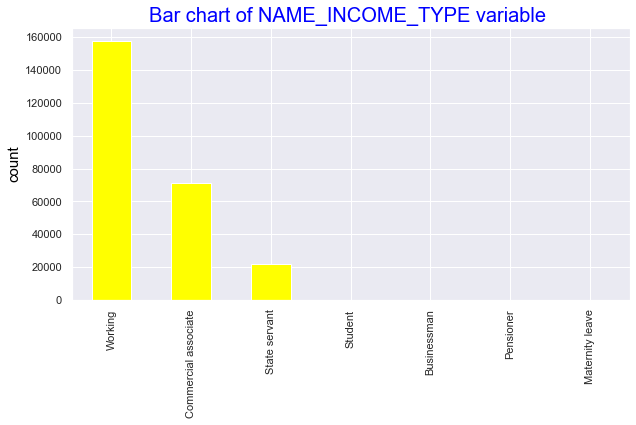

In [107]:
application_df.NAME_INCOME_TYPE.value_counts().plot(kind='bar',figsize=(10,5),color='Yellow')
plt.title("Bar chart of NAME_INCOME_TYPE variable ",fontdict={'fontsize':20,'fontweight':5,'color':'BLUE'})
plt.ylabel("count",fontdict={'fontsize':15,'fontweight':5,'color':'BLACK'})
#plt.xticks(ticks=[0,1],labels=['YES','NO'],rotation=0,fontdict={'fontsize':15,'fontweight':5,'color':'BLACK'})
plt.show()

#### From the bar chart we can say that majority people who apply for the loans are the ones whose income source through working
###### This is one of the important factors to give the loans 

In [108]:
application_df['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    172212
Higher education                  66180
Incomplete higher                  9712
Lower secondary                    2269
Academic degree                     136
Name: NAME_EDUCATION_TYPE, dtype: int64

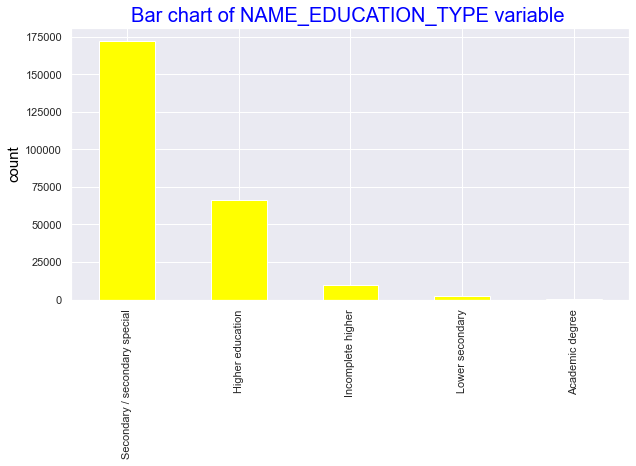

In [109]:
application_df.NAME_EDUCATION_TYPE.value_counts().plot(kind='bar',figsize=(10,5),color='Yellow')
plt.title("Bar chart of NAME_EDUCATION_TYPE variable ",fontdict={'fontsize':20,'fontweight':5,'color':'BLUE'})
plt.ylabel("count",fontdict={'fontsize':15,'fontweight':5,'color':'BLACK'})
#plt.xticks(ticks=[0,1],labels=['YES','NO'],rotation=0,fontdict={'fontsize':15,'fontweight':5,'color':'BLACK'})
plt.show()

####  From the bar chart we can say that majority people who apply for the loans are secondary education people

In [110]:
application_df['NAME_FAMILY_STATUS'].value_counts()

Married                 162765
Single / not married     39088
Civil marriage           26052
Separated                15927
Widow                     6677
Name: NAME_FAMILY_STATUS, dtype: int64

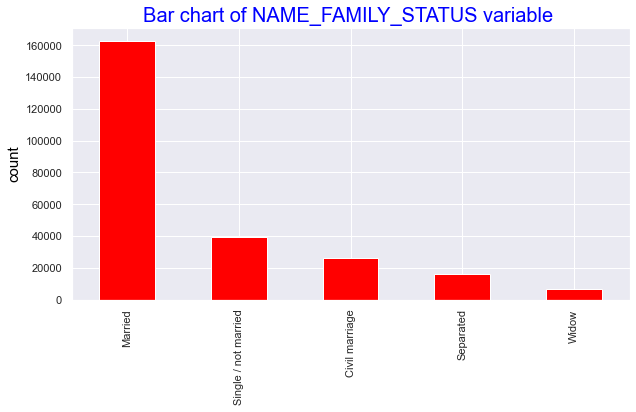

In [111]:
application_df.NAME_FAMILY_STATUS.value_counts().plot(kind='bar',figsize=(10,5),color='Red')
plt.title("Bar chart of NAME_FAMILY_STATUS variable ",fontdict={'fontsize':20,'fontweight':5,'color':'BLUE'})
plt.ylabel("count",fontdict={'fontsize':15,'fontweight':5,'color':'BLACK'})
#plt.xticks(ticks=[0,1],labels=['YES','NO'],rotation=0,fontdict={'fontsize':15,'fontweight':5,'color':'BLACK'})
plt.show()

#### From the bar chart we can get the insights that majority of people who apply for loans are Married people

In [112]:
application_df['NAME_HOUSING_TYPE'].value_counts()

House / apartment      219034
With parents            14544
Municipal apartment      9001
Rented apartment         4652
Office apartment         2283
Co-op apartment           995
Name: NAME_HOUSING_TYPE, dtype: int64

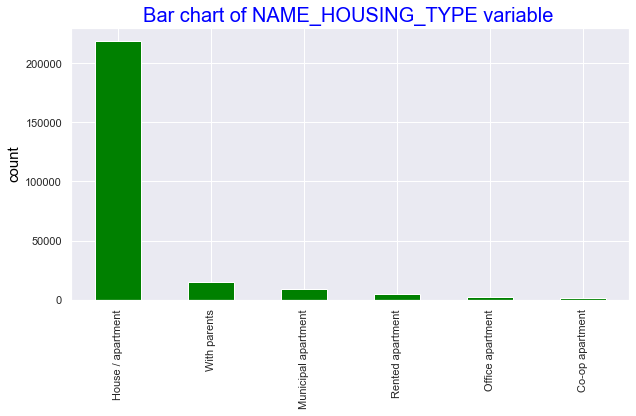

In [113]:
application_df.NAME_HOUSING_TYPE.value_counts().plot(kind='bar',figsize=(10,5),color='GREEN')
plt.title("Bar chart of NAME_HOUSING_TYPE variable ",fontdict={'fontsize':20,'fontweight':5,'color':'BLUE'})
plt.ylabel("count",fontdict={'fontsize':15,'fontweight':5,'color':'BLACK'})
#plt.xticks(ticks=[0,1],labels=['YES','NO'],rotation=0,fontdict={'fontsize':15,'fontweight':5,'color':'BLACK'})
plt.show()

#### From the bar chart we can get the insights that majority of people who apply for loans are people who own a House / Apartment

In [114]:
application_df['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67564
Self-employed             38186
Other                     16566
Medicine                  11128
Business Entity Type 2    10489
Government                10332
School                     8824
Trade: type 7              7786
Kindergarten               6820
Construction               6679
Business Entity Type 1     5955
Transport: type 4          5364
Trade: type 3              3471
Industry: type 9           3337
Industry: type 3           3264
Security                   3225
Housing                    2935
Industry: type 11          2691
Military                   2616
Bank                       2484
Agriculture                2427
Police                     2326
Transport: type 2          2184
Postal                     2147
Security Ministries        1960
Trade: type 2              1885
Restaurant                 1794
Services                   1568
University                 1320
Industry: type 7           1299
Transport: type 3          1180
Industry

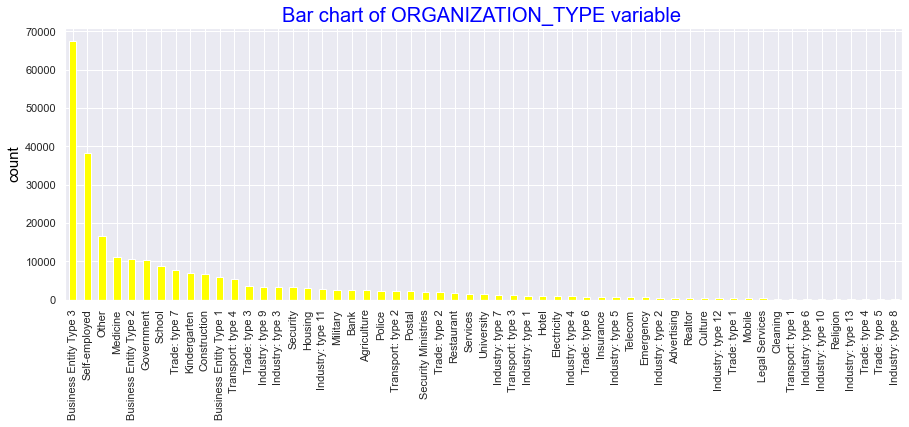

In [115]:
application_df.ORGANIZATION_TYPE.value_counts().plot(kind='bar',figsize=(15,5),color='Yellow')
plt.title("Bar chart of ORGANIZATION_TYPE variable ",fontdict={'fontsize':20,'fontweight':5,'color':'BLUE'})
plt.ylabel("count",fontdict={'fontsize':15,'fontweight':5,'color':'BLACK'})
plt.show()

#### From the bar chart we can get the insights that majority of people who apply for loans belong to Business Entity Type 3 organizations

In [116]:
application_df.OCCUPATION_TYPE.value_counts()

Laborers                 54845
Sales staff              31909
Core staff               27359
Managers                 21237
Drivers                  18493
High skill tech staff    11315
Accountants               9759
Medicine staff            8484
Security staff            6674
Cooking staff             5921
Cleaning staff            4618
Private service staff     2635
Low-skill Laborers        2078
Waiters/barmen staff      1338
Secretaries               1300
Realty agents              748
HR staff                   559
IT staff                   522
Name: OCCUPATION_TYPE, dtype: int64

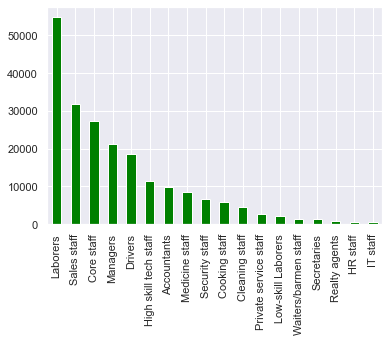

In [117]:
application_df.OCCUPATION_TYPE.value_counts().plot(kind='bar',color='green')
plt.show()

#### Since the null values are  more than 30% it is difficult to fill those values with mode because the OCCUPATION_TYPE is a ctegorical column
1. we can assign those values a separate category like 'No occupation' or we can leave them as null values ,I have kept them as null values and not changing them.
2. Laborers are the major people who are applying for loans

## Bivaraiate Analysis

#### Analyzing with respect to TARGET column

In [118]:
application_df['TARGET'].value_counts()

0    228804
1     21705
Name: TARGET, dtype: int64

#### Here the TARGET column has values 0 and 1 in which value count of 0 is much more greater than 1.
1. So if we use both of them in a single analysis it will lead to a bias data which will be favoured to only 0 values 
2. So it would be better option to analyze the 0 and 1 values separately

##### so we divide the dataset into two categories

In [119]:
Repayer_df=application_df.loc[application_df.TARGET==0] # total 280466 rows for Repayer
print(Repayer_df.shape)
Defaulter_df=application_df.loc[application_df.TARGET==1] # total 24719 rows for Defaulter
print(Defaulter_df.shape)

(228804, 32)
(21705, 32)


### Categorical Unordered Bivariate Analysis

In [120]:
cat_col=application_df.columns[application_df.dtypes == object] # all categorical coloumns
cat_col= list(cat_col)
print(cat_col)

['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']


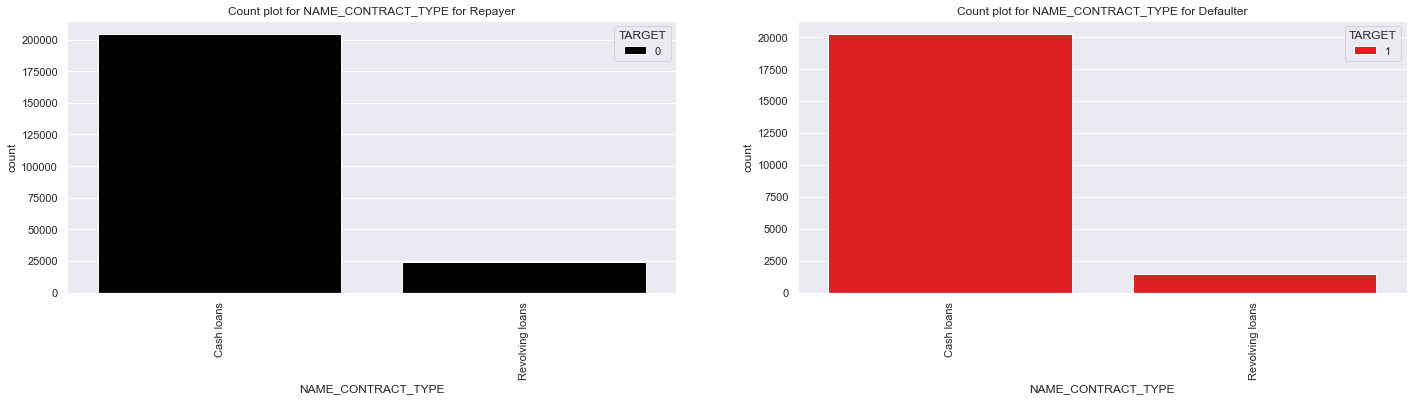

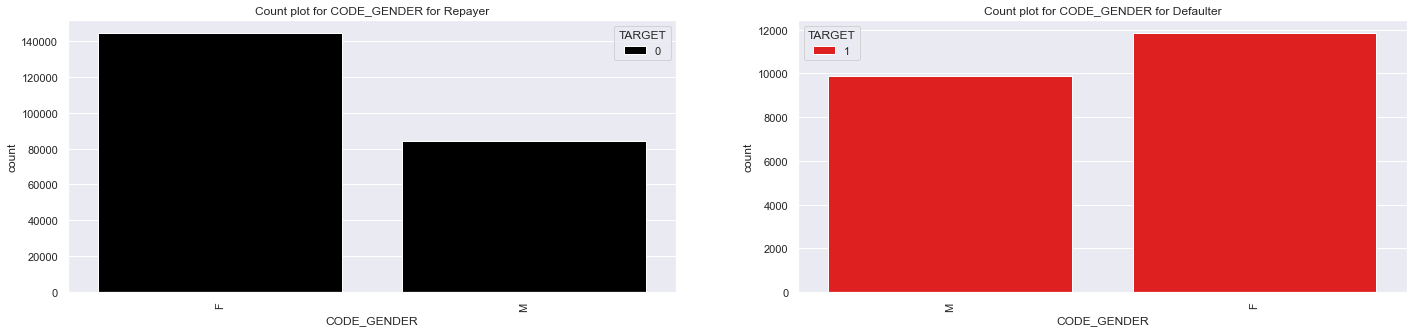

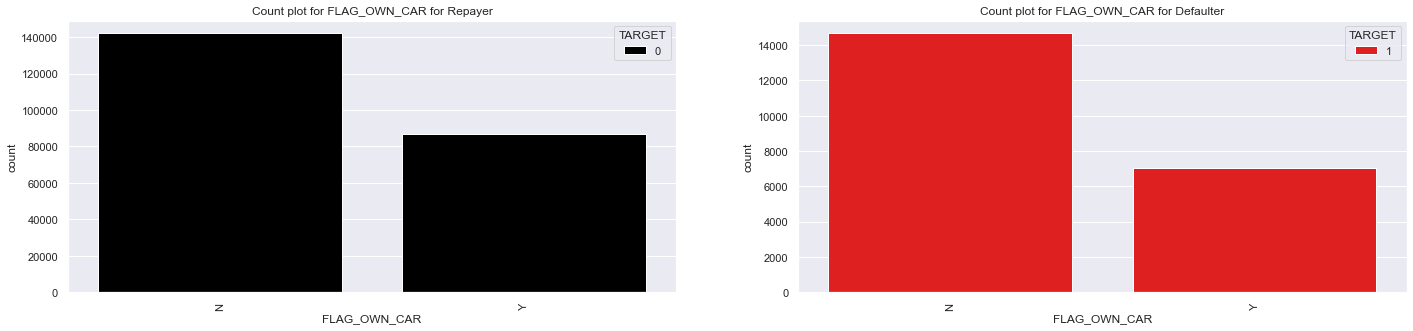

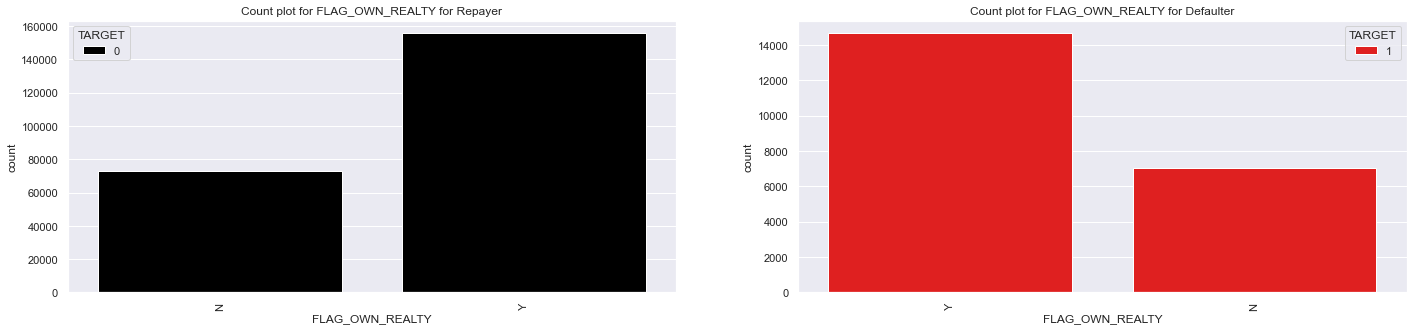

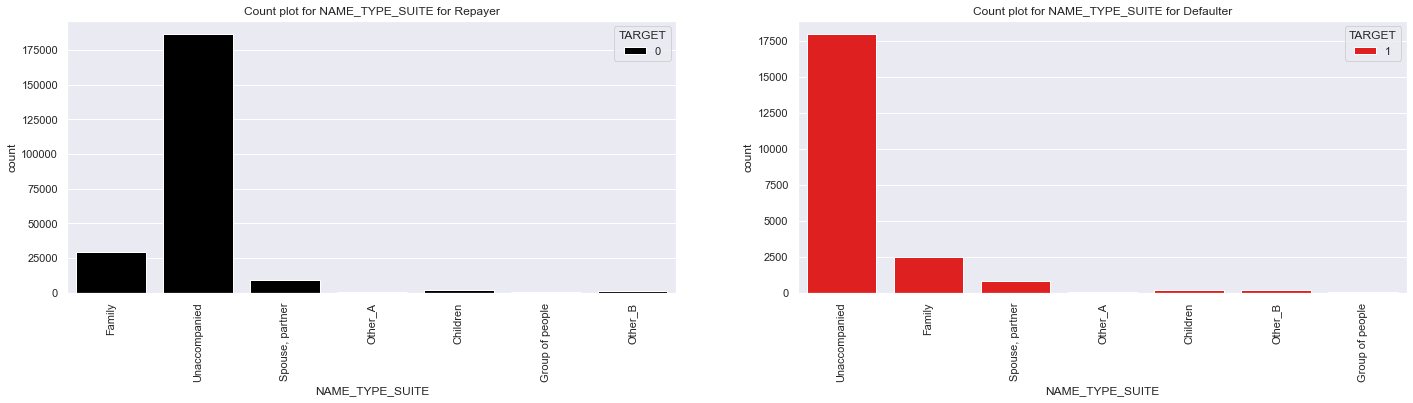

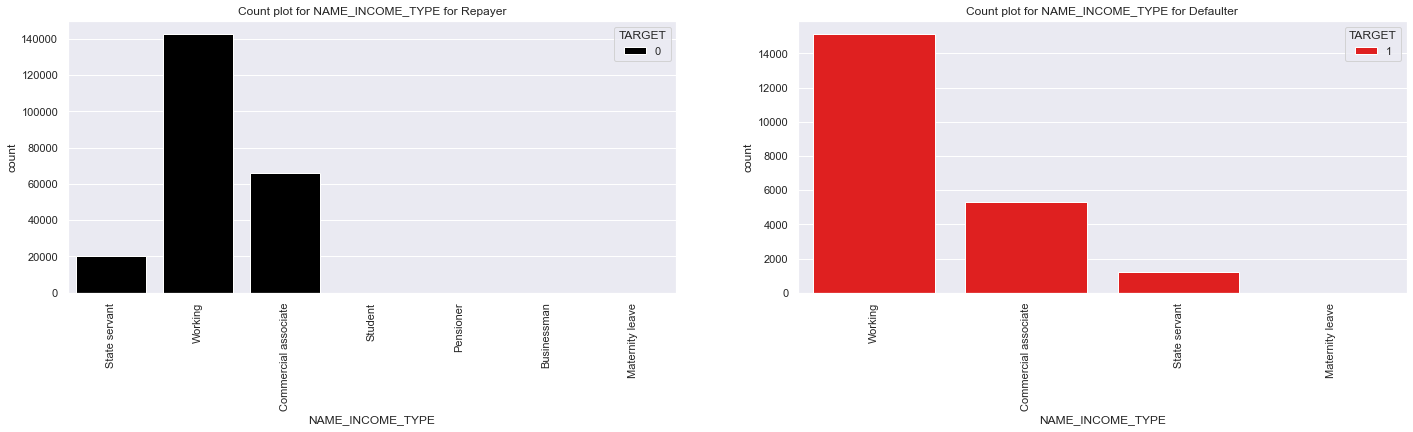

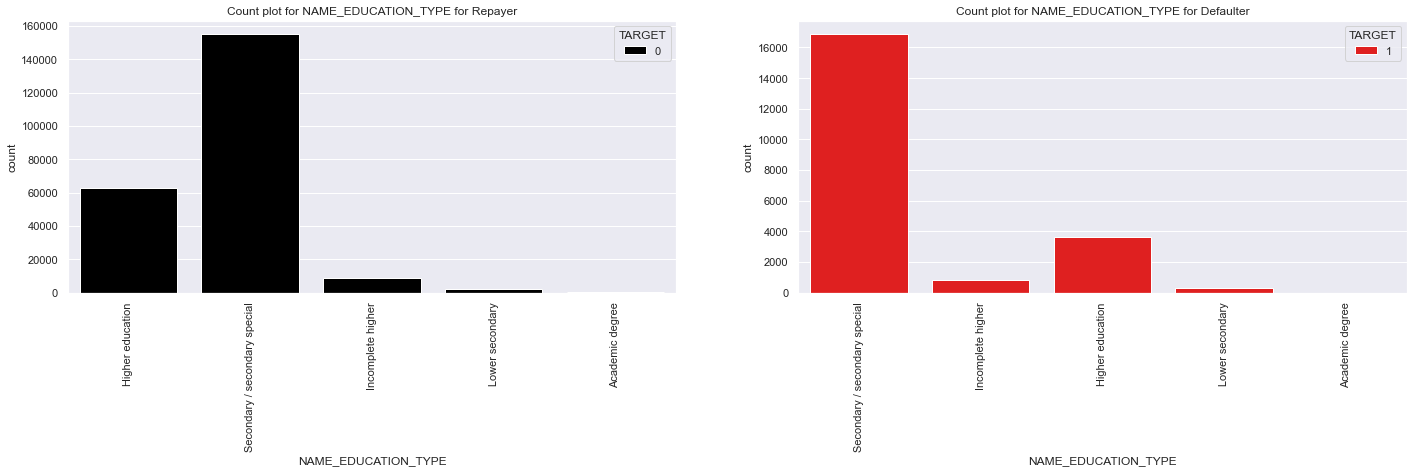

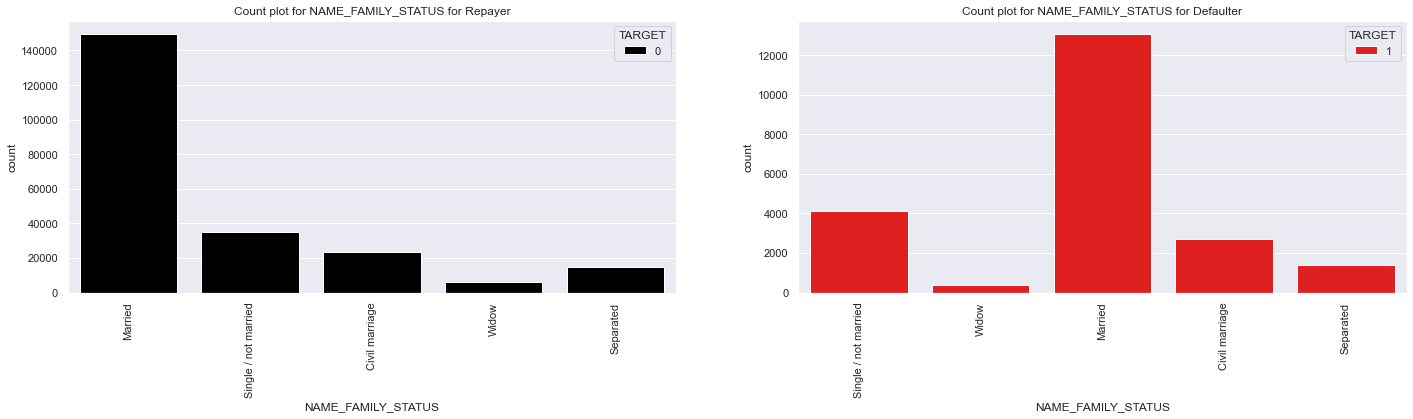

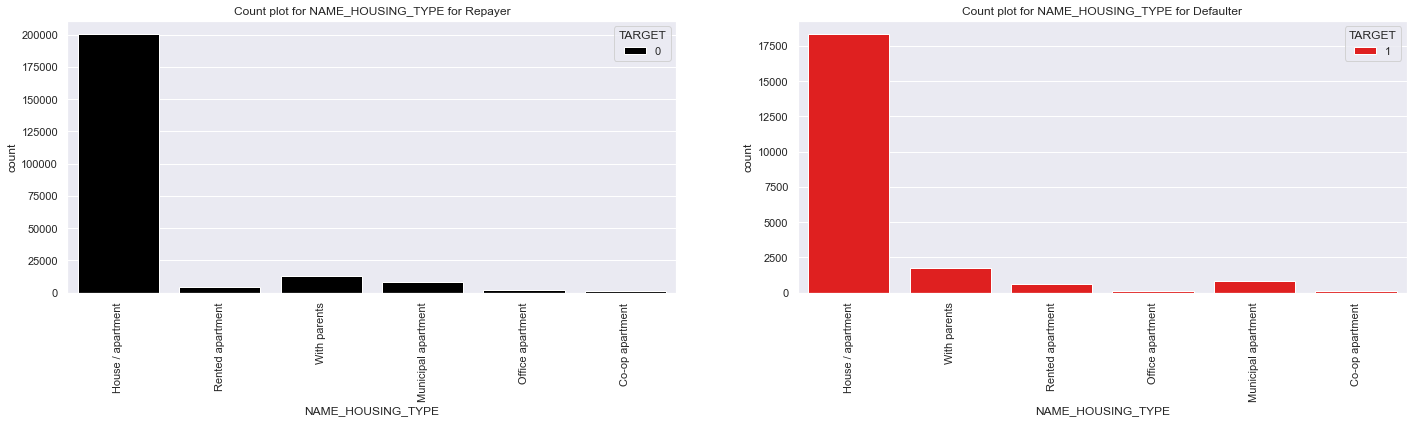

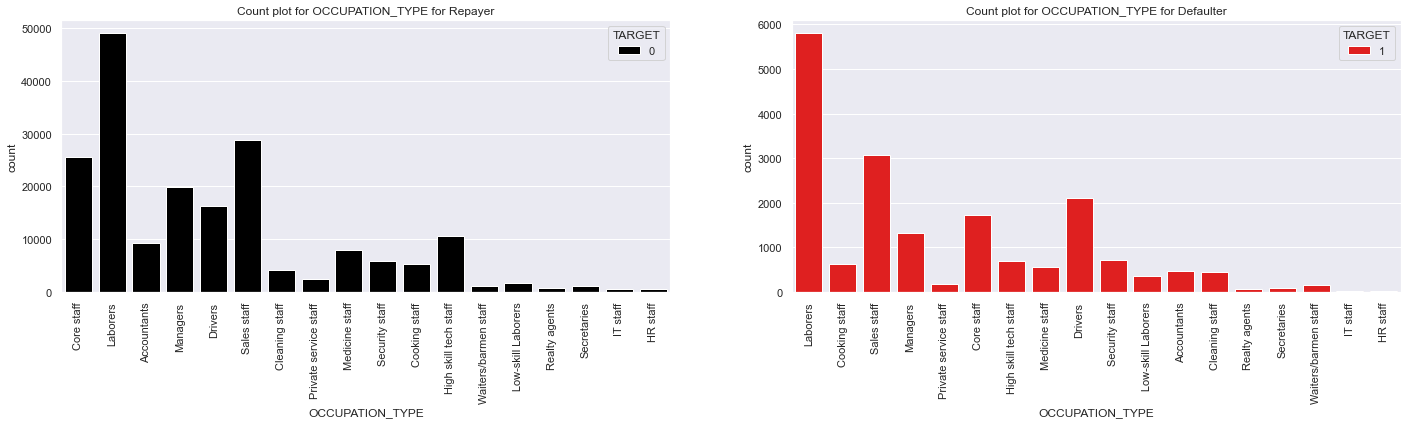

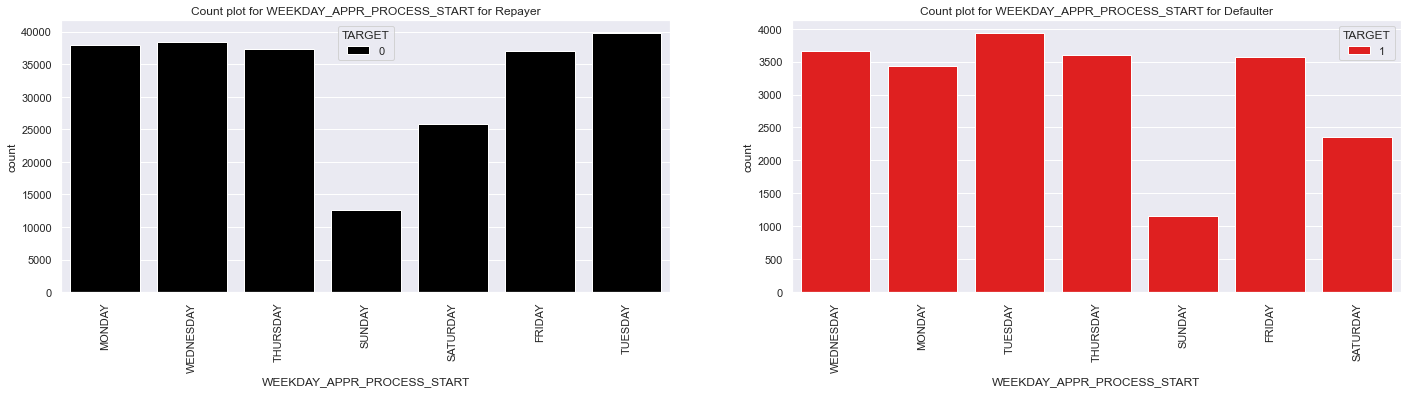

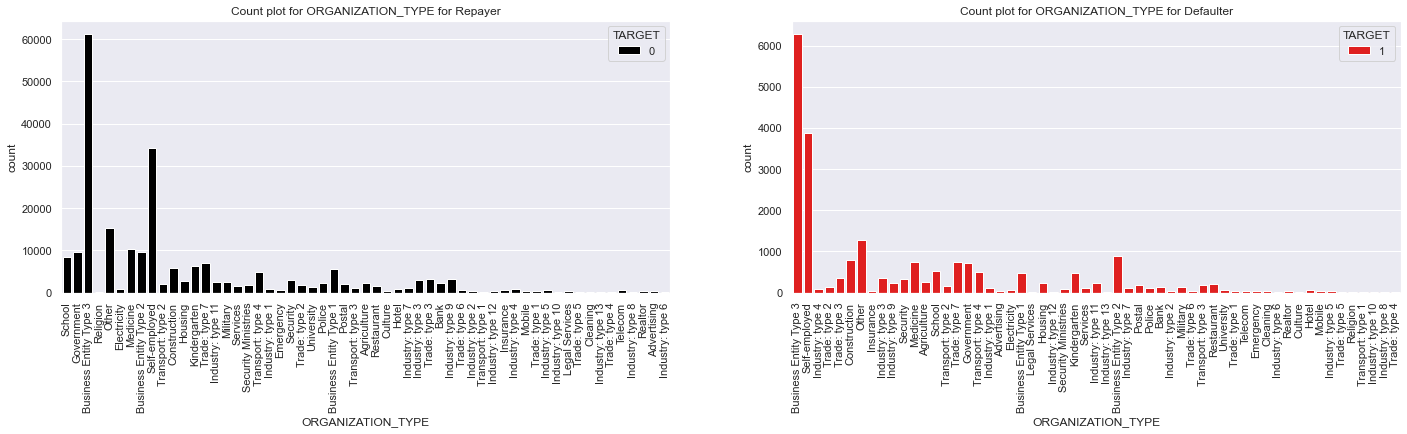

In [121]:
# count plots for all Categorical Columns
for i in cat_col:
    plt.figure(figsize=(24,5))
    plt.subplot(1,2,1)

    # print("Count plot for "+i+" for Repayer")
    plt.title("Count plot for "+i+" for Repayer")
    sns.countplot(x=i,hue=Repayer_df['TARGET'],data=Repayer_df[cat_col+['TARGET']],palette=["black","green"])
    #plt.tight_layout()
    # plt.figure(figsize = (10,10))
    plt.xticks(rotation = 90)
    plt.subplot(1,2,2)

    # print("Count plot for "+i+" for Defaulter")
    plt.title("Count plot for "+i+" for Defaulter")
    sns.countplot(x=i,hue=Defaulter_df['TARGET'],data=Defaulter_df[cat_col+['TARGET']],palette=["red","blue"])
    #plt.tight_layout()
    # plt.figure(figsize = (10,10))
    plt.xticks(rotation = 90)

### Categorical Unordered Bivariate Analysis from the above count plots for every Categorical Columns for both Repayer and Defaulter:

* **NAME_CONTRACT_TYPE column:**

    * *It is clear that both Repayers and Defaulters are approaching to bank to applay for **Cash loans** rather than Revoving loans.*

* **CODE_GENDER column:**
    * *In both both Repayers and Defaulters **Females** are the one who are applaying for the loans.*

* **NAME_TYPE_SUITE column:**
    * *In this column we have various categories of people and for both both Repayers and Defaulters the category type **Unaccompanied** are the majority people are applaying for the loans after that **Family** category and then **Spouse,partner** category.*

* **NAME_INCOME_TYPE column:**
    * *In this column we have various categories of people and for both both Repayers and Defaulters the descending order people those are applaying for the loans are **Working** , **Commercial associate** , **Pensioner** and **State servant**.*


* **NAME_EDUCATION_TYPE column:**

    * **Secondary / secondary special** category people are the highest one who are approaching the banks for applaying loans after that **Higher education** category then **Incomplete higher** then **Lower secondary** in both Repayers and Defaulters.*
    

* **NAME_FAMILY_STATUS column:**
    * *In both both Repayers and Defaulters the order of people those are applaying for the loans are **Married** then **Single / not married** then **Civil marriage** then **Separated** then **Widow** with **Married** category being the highest one.*

    

* **NAME_HOUSING_TYPE column:**
    * The people who own individual house i.e people belongs to **House / apartment** category are the majority people applaying for the loans after that people in **With parents** category then **Municipal apartment** then **Rented apartment** then **Office apartment** and at last people belongs to **Co-op apartment** category in both Repayers and Defaulters.*   


* **OCCUPATION_TYPE column:**
            
    * *In the given dataset this column got lot of missing values and to handle that missing data we explicitly imputed special category named **Nameless** and it is very clear that this category people are the highest one who are applaying for the loans. It might say that majority of people are not specifying their OCCUPATION_TYPE while applaying for the loan.*
    * *Apart from the **Nameless** category the people belongs to **Laborers** category are the second highest then **Sales staff** category then **Managers** are the one who are applaying for the loans in both Repayers and Defaulters.*

* **WEEKDAY_APPR_PROCESS_START column:**
    * *It is clear from the given application data that majority of people are starting their loan application process on **TUESDAY**.*

* **ORGANIZATION_TYPE column:**
    * **Business Entity Type 3** people are the highest category people who are applaying for the loans in both Repayers and Defaulters but the next highest category for the  Repayers is **XNA** category where as for Defaulters it is **Self-employed** category .*

## Bivariate Analysis and Multivariate Analysis for Numerical Columns

#### Numeric to numeric analysis

In [122]:
numeric_columns=application_df.columns[application_df.dtypes != object]
print(numeric_columns)
print(len(numeric_columns))

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'AGE', 'YEARS_EMP'],
      dtype='object')
20


In [123]:
# Columns who got only two unique values
two_uni_col = []
for i in numeric_columns:
    if application_df[i].nunique()==2:
        two_uni_col.append(i)

In [124]:
print(two_uni_col)
print(len(two_uni_col))

['TARGET', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']
7


**Note:**
* **The list two_uni_col contains all the columns which got only two different values for the entire column data which means the data is in Yes or No format i.e 1 or 0. Hence it is wise to exclude these columns to perform Bivariate analysis with Target Column**
* **So we have 20 numerical columns and 7 columns with only 2 unique values in the entire column. Hence after removing these we still have 13 numerical columns on which we are going to perform Bivariate analysis with Target Column.**

In [125]:
Biv_num_col = [i for i in numeric_columns if i not in two_uni_col]
print(Biv_num_col)
len(Biv_num_col)

['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'AGE', 'YEARS_EMP']


13

In [128]:
# Spliting all the selected columns to draw pair plots and there by looking for useful insights
list1=['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY']

list2=['REGION_POPULATION_RELATIVE', 'CNT_FAM_MEMBERS']

list3=['DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','AGE', 'YEARS_EMP']


### Pairplots for all Repayers

#### List 1

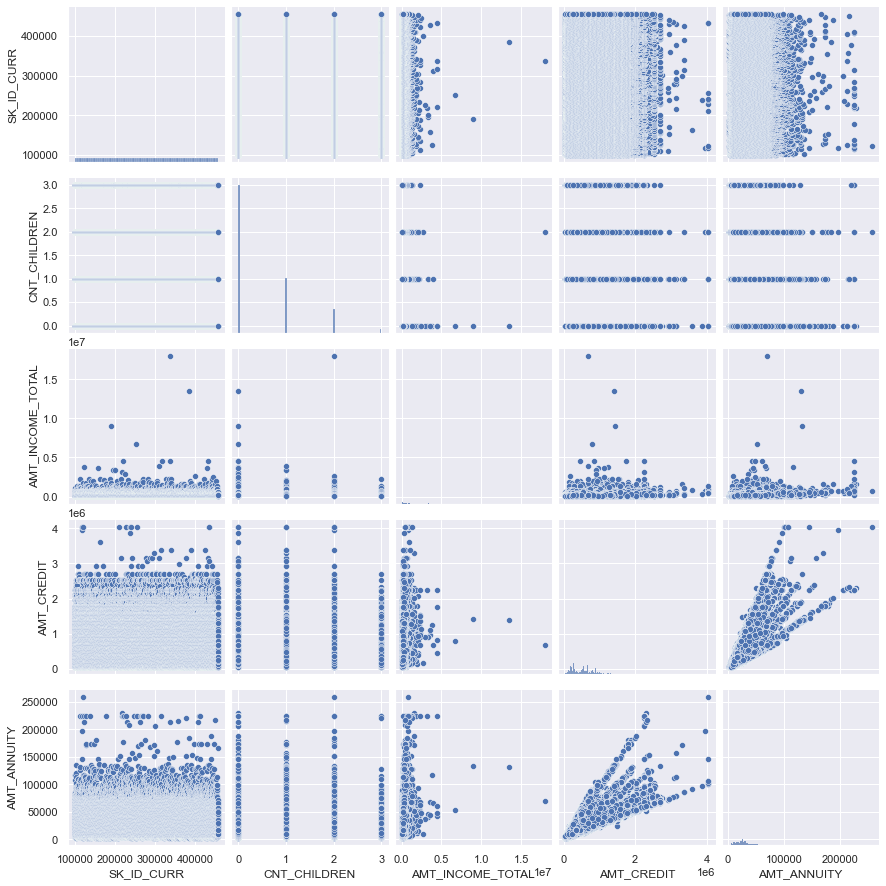

In [129]:
# For list1
sns.pairplot(Repayer_df[list1])

<AxesSubplot:>

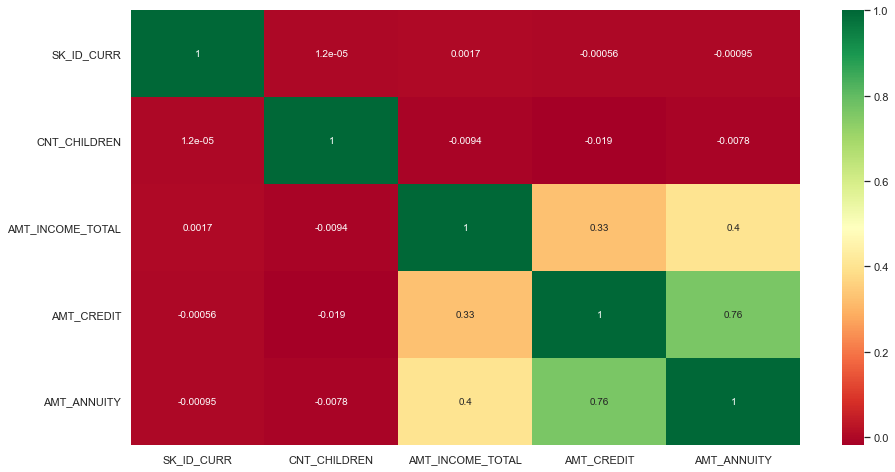

In [130]:
plt.figure(figsize = [15,8])
sns.heatmap(Repayer_df[list1].corr(), cmap = 'RdYlGn', annot = True)

**Highly correlated columns for Repayers in list1 are:**

* **'AMT_INCOME_TOTAL' , 'AMT_CREDIT' , 'AMT_ANNUITY' **

#### List 2

<Figure size 1080x720 with 0 Axes>

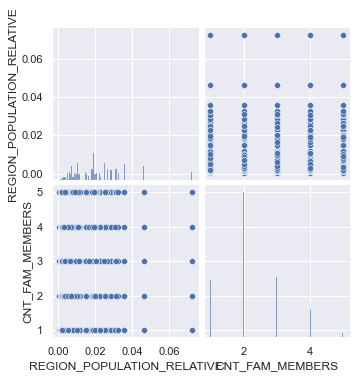

In [131]:
# For list2
plt.figure(figsize = [15,10])
sns.pairplot(Repayer_df[list2])

<AxesSubplot:>

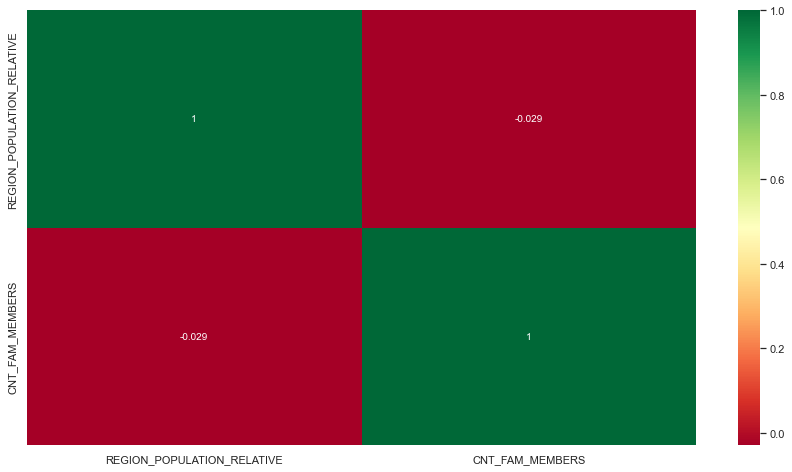

In [132]:
plt.figure(figsize = [15,8])
sns.heatmap(Repayer_df[list2].corr(), cmap = 'RdYlGn', annot = True)

#### The columns REGION_POPULATION_RELATIVE and CNT_FAM_MEMBERS are negatively correlated so their relation is not useful

#### List3

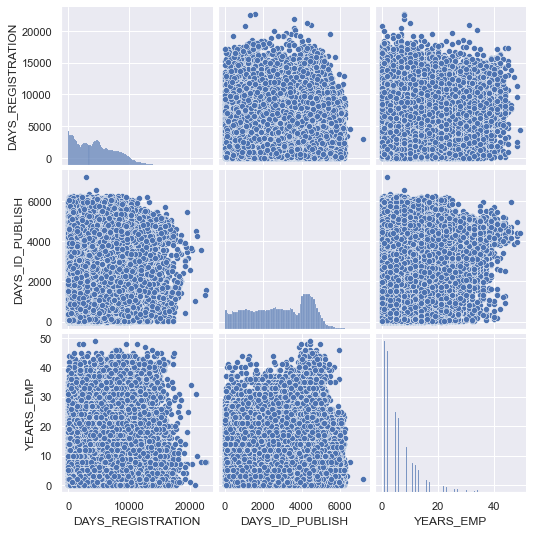

In [133]:
# For list3
sns.pairplot(Repayer_df[list3])

<AxesSubplot:>

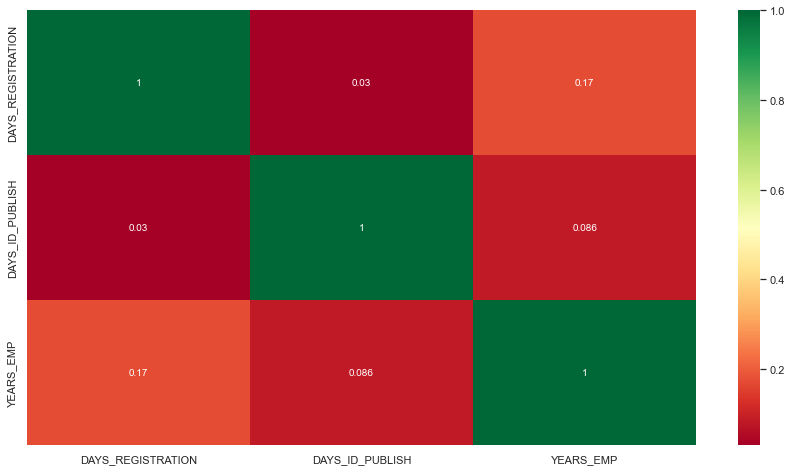

In [134]:
plt.figure(figsize = [15,8])
sns.heatmap(Repayer_df[list3].corr(), cmap = 'RdYlGn', annot = True)

**Highly correlated columns for Repayers in list3 are:**

* **'DAYS_REGISTRATION' , and 'YEARS_EMP'**

## Pair plots for all Defaulters

#### List1

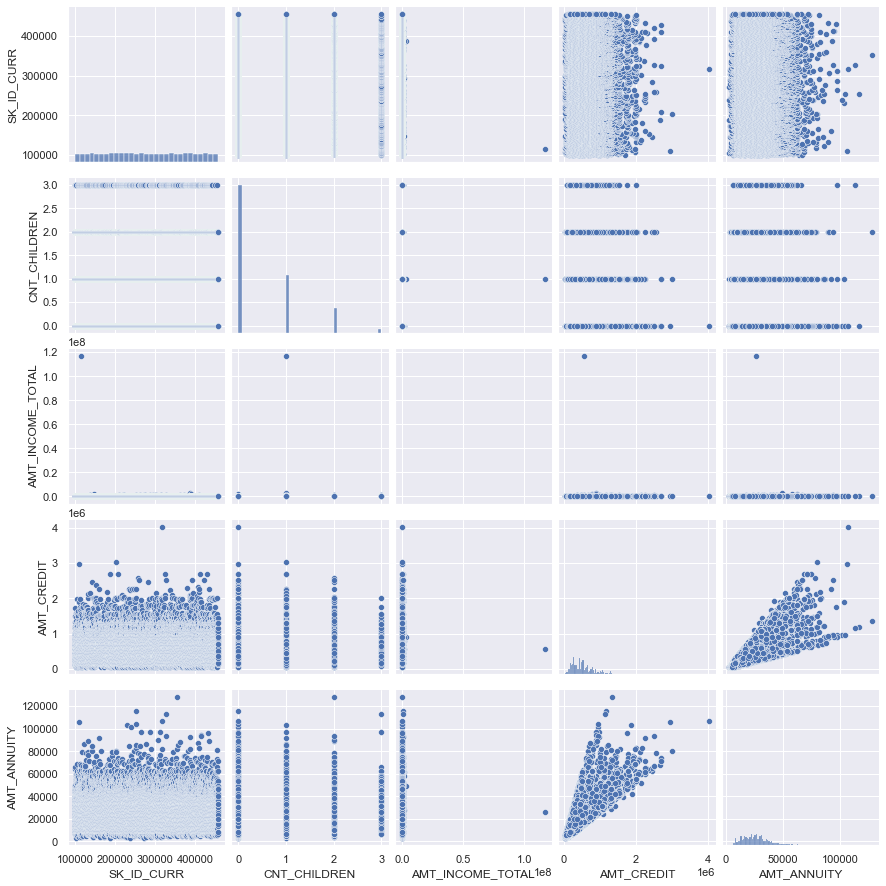

In [135]:
# For list1
sns.pairplot(Defaulter_df[list1])

<AxesSubplot:>

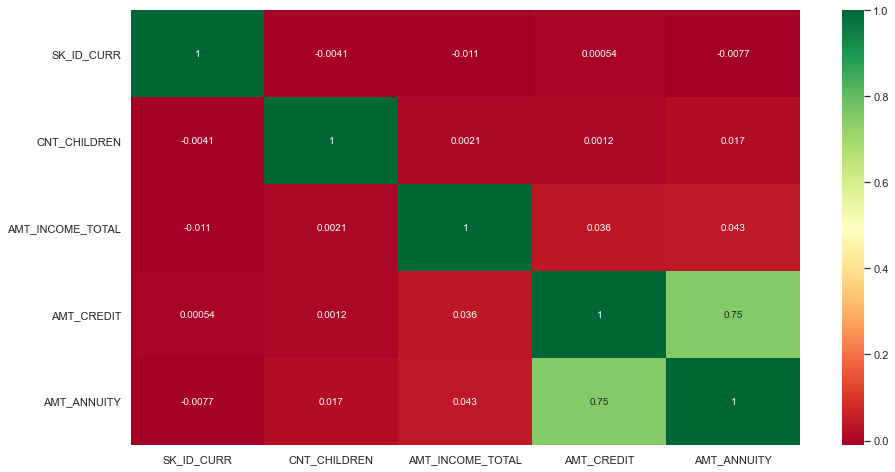

In [136]:
plt.figure(figsize = [15,8])
sns.heatmap(Defaulter_df[list1].corr(), cmap = 'RdYlGn', annot = True)

**Highly correlated columns for Defaulters in list1 are:**

* **'AMT_CREDIT' , 'AMT_ANNUITY' **

#### List2

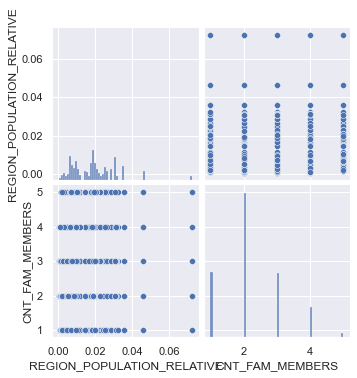

In [137]:
# For list2
sns.pairplot(Defaulter_df[list2])

<AxesSubplot:>

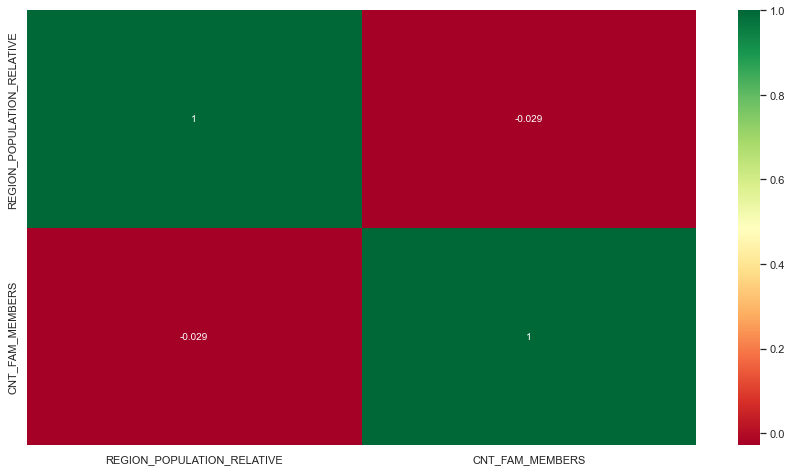

In [138]:
plt.figure(figsize = [15,8])
sns.heatmap(Defaulter_df[list2].corr(), cmap = 'RdYlGn', annot = True)

#### The columns REGION_POPULATION_RELATIVE and CNT_FAM_MEMBERS are negatively correlated so their relation is not useful

#### List3

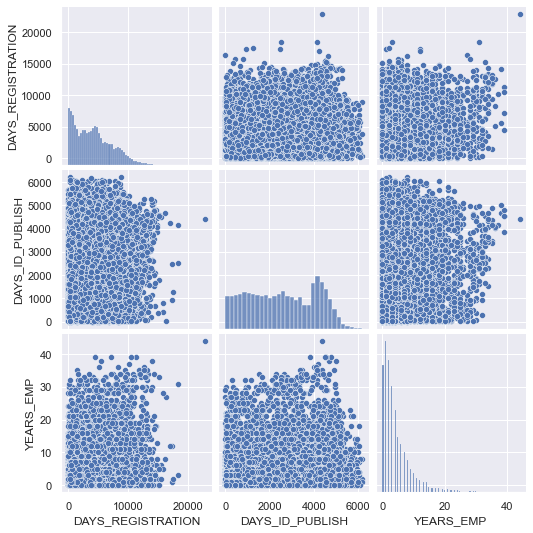

In [139]:
# For list2
sns.pairplot(Defaulter_df[list3])

<AxesSubplot:>

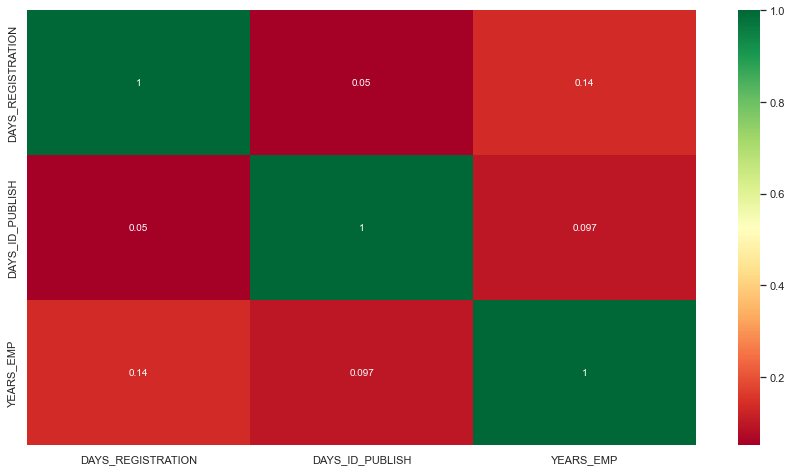

In [140]:
plt.figure(figsize = [15,8])
sns.heatmap(Defaulter_df[list3].corr(), cmap = 'RdYlGn', annot = True)

**Highly correlated columns for Defaulters in list3 are:**

* **'DAYS_REGISTRATION' , and 'YEARS_EMP'**

#### Categorical to Categorical Variable Analysis

In [141]:
cat_col

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [142]:
#'NAME_EDUCATION_TYPE' and 'CODE_GENDER'
application_df.groupby(['NAME_EDUCATION_TYPE','CODE_GENDER']).TARGET.mean().unstack()

CODE_GENDER                           F         M
NAME_EDUCATION_TYPE                              
Academic degree                0.038961  0.000000
Higher education               0.050182  0.064664
Incomplete higher              0.082963  0.093150
Lower secondary                0.128323  0.146859
Secondary / secondary special  0.085490  0.118072

**Deductions from the above information:**

* **It clear that very few  approximately no people for either genders for Academic degree EDUCATION_TYPE are availing for loans**

* **It looks as men with lower secondary education and secondary/secondary special education are more likely appear to approach the banks for loan purpose**

In [143]:
#'CODE_GENDER','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE'
info = application_df.groupby(['CODE_GENDER','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']).TARGET.mean().unstack()

<AxesSubplot:xlabel='NAME_HOUSING_TYPE', ylabel='CODE_GENDER-NAME_FAMILY_STATUS'>

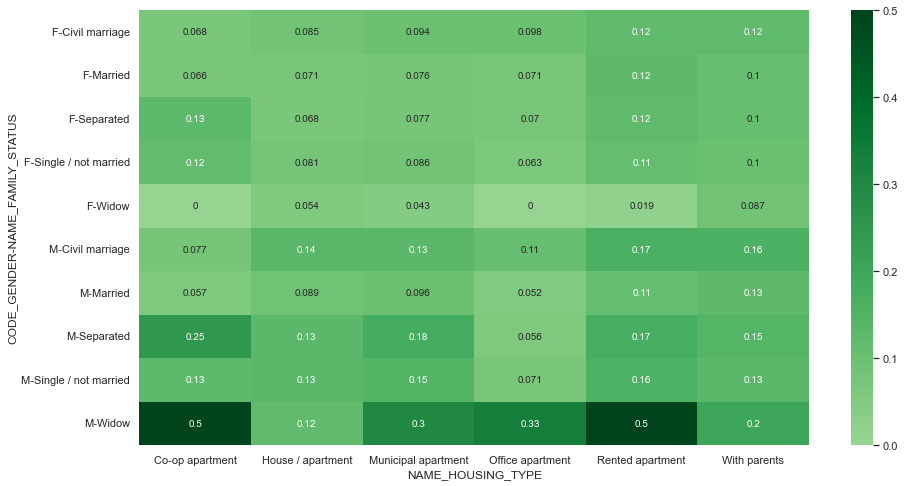

In [144]:
plt.figure(figsize = [15,8])
sns.heatmap(info, cmap = 'Greens',annot = True, center = 0.0807)

**Deductions from the above Heatmap:**
* **It can be seen that Male Widow people who belongs to Co-op apartment or Rented apartment categories in NAME_HOUSING_TYPE column are popular than any other group who are processing ther loan applications.**

In [145]:
# Highly correlated Numerical columns
top_corr_columns=['AMT_INCOME_TOTAL' , 'AMT_CREDIT' , 'AMT_ANNUITY',  
               'CNT_FAM_MEMBERS','DAYS_REGISTRATION' , 'AGE' , 'YEARS_EMP']

In [146]:
#for i in top_corr_columns:
#    print(application_df[i].head())

In [147]:
# Highly correlated Numerical columns corresponding correlation_coeff Repayers
corr = Repayer_df[top_corr_columns].corr()
cor_mat0 = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
cor_mat0.columns = ['variable_1', 'variable_2', 'correlation_coeff']
cor_mat0 = cor_mat0.loc[cor_mat0.variable_1 != cor_mat0.variable_2]
cor_mat0.dropna(inplace = True)
#new column with absolute correlation coefficient as a high negative correlation is also a strong correlation
cor_mat0['abs_correlation_coeff'] = cor_mat0['correlation_coeff'].abs()
cor_mat0.sort_values('abs_correlation_coeff', ascending = False, inplace = True)

In [148]:
cor_mat0.head(10)

variable_1         variable_2  correlation_coeff  \
13        AMT_ANNUITY         AMT_CREDIT           0.761985   
12        AMT_ANNUITY   AMT_INCOME_TOTAL           0.399959   
6          AMT_CREDIT   AMT_INCOME_TOTAL           0.325003   
34          YEARS_EMP  DAYS_REGISTRATION           0.172128   
27  DAYS_REGISTRATION    CNT_FAM_MEMBERS          -0.156058   
31          YEARS_EMP         AMT_CREDIT           0.087949   
32          YEARS_EMP        AMT_ANNUITY           0.052049   
20    CNT_FAM_MEMBERS        AMT_ANNUITY           0.042150   
19    CNT_FAM_MEMBERS         AMT_CREDIT           0.037947   
24  DAYS_REGISTRATION   AMT_INCOME_TOTAL          -0.034258   

    abs_correlation_coeff  
13               0.761985  
12               0.399959  
6                0.325003  
34               0.172128  
27               0.156058  
31               0.087949  
32               0.052049  
20               0.042150  
19               0.037947  
24               0.034258

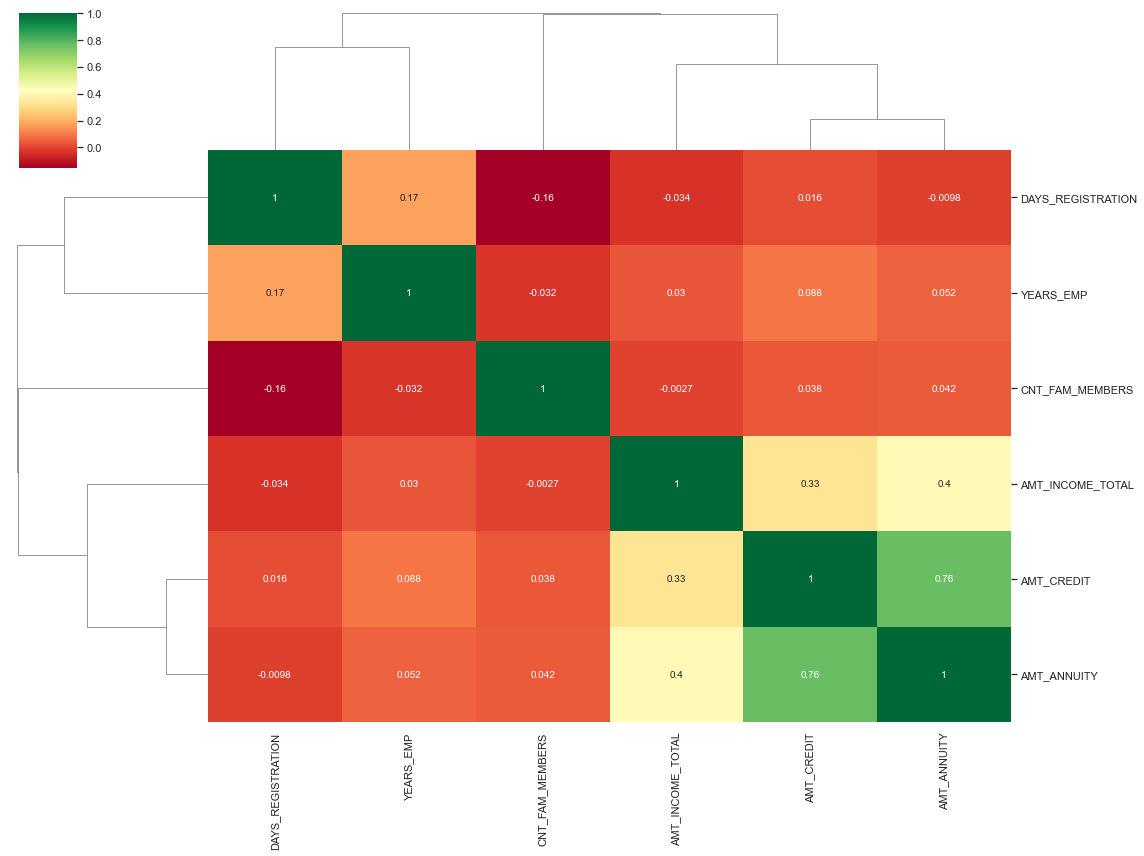

In [149]:
#Clustermap of all the relevant numeric columns for Repayers
#It shows varibles that are more and less correlated
sns.clustermap(Repayer_df[top_corr_columns].corr(), cmap = 'RdYlGn', annot = True, figsize = [16,12])
plt.show()

## Supporting Factor for a Repayer:

**AMT_INCOME_TOTAL: Clients whose income more than 700,000 are less likely to default and can be considered as                       repayers.**

**AGE: People above age of 53 have low probability of defaulting.**

**YEARS_EMP: Clients with more than 45 year experience can be considred as Repayers.**

**NAME_INCOME_TYPE:  Businessmen and Student have no defaults.** 

**NAME_EDUCATION_TYPE: Academic degree category has less defaults.**

**CODE_GENDER: Females are relatively good repayers than men.**

#### Defaulter

In [150]:
# Highly correlated Numerical columns corresponding correlation_coeff Defaulters
corr = Defaulter_df[top_corr_columns].corr()
cor_mat1 = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
cor_mat1.columns = ['variable_1', 'variable_2', 'correlation_coeff']
cor_mat1 = cor_mat1.loc[cor_mat1.variable_1 != cor_mat1.variable_2]
cor_mat1.dropna(inplace = True)
#new column with absolute correlation coefficient as a high negative correlation is also a strong correlation
cor_mat1['abs_correlation_coeff'] = cor_mat1['correlation_coeff'].abs()
cor_mat1.sort_values('abs_correlation_coeff', ascending = False, inplace = True)
cor_mat1.head(10)

variable_1         variable_2  correlation_coeff  \
13        AMT_ANNUITY         AMT_CREDIT           0.748585   
34          YEARS_EMP  DAYS_REGISTRATION           0.138431   
27  DAYS_REGISTRATION    CNT_FAM_MEMBERS          -0.122175   
31          YEARS_EMP         AMT_CREDIT           0.107943   
20    CNT_FAM_MEMBERS        AMT_ANNUITY           0.057776   
19    CNT_FAM_MEMBERS         AMT_CREDIT           0.050353   
32          YEARS_EMP        AMT_ANNUITY           0.049652   
12        AMT_ANNUITY   AMT_INCOME_TOTAL           0.043134   
6          AMT_CREDIT   AMT_INCOME_TOTAL           0.036289   
25  DAYS_REGISTRATION         AMT_CREDIT           0.032948   

    abs_correlation_coeff  
13               0.748585  
34               0.138431  
27               0.122175  
31               0.107943  
20               0.057776  
19               0.050353  
32               0.049652  
12               0.043134  
6                0.036289  
25               0.032948

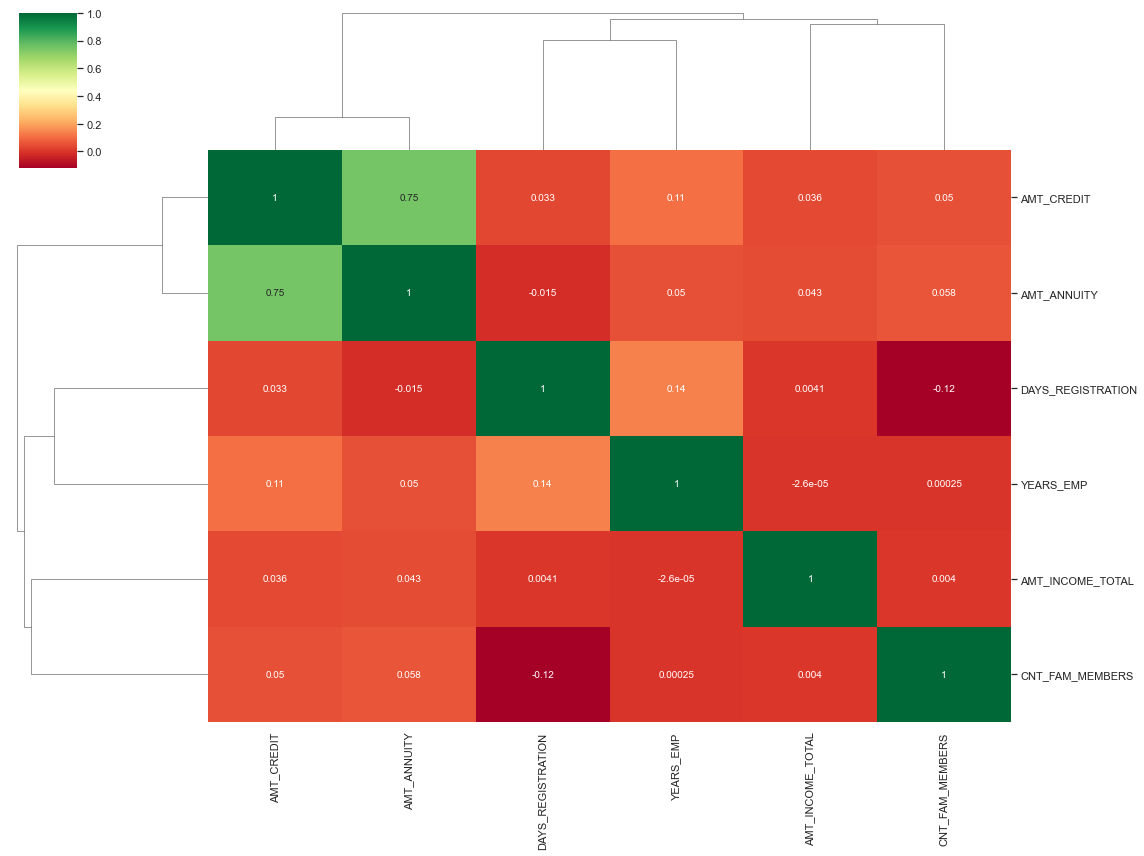

In [151]:
#Clustermap of all the relevant numeric columns for Defaulters
#It shows varibles that are more and less correlated
sns.clustermap(Defaulter_df[top_corr_columns].corr(), cmap = 'RdYlGn', annot = True, figsize = [16,12])
plt.show()

## Supporting Factor for a Defaulter:

**NAME_EDUCATION_TYPE: People with Lower Secondary & Secondary education are more tend to default.**


**AGE: People with age range of 20-40 are more tend to deafult.**

**YEARS_EMP: People who have less than 5 years of employment have high default rate.**

**NAME_INCOME_TYPE: Applicants who are at Maternity leave and Unemployed default a lot.**

**CODE_GENDER: Men are at relatively higher than female as default rate is taken into consideration.**


** CNT_FAM_MEMBERS: People with children more than 10 are mostly defaulters.**

**ORGANIZATION_TYPE: Organizations those belongs to Transport, Industry,Self-employed people and Restaurant are more defaulters than other.**  
 
**OCCUPATION_TYPE: Drivers,Low-skill Laborers, barmen, Security staff,Cooking staff are more to default than other category people.**

**Hence based on these parameters one should think before approve the loan or provide loan with higher interest rate inorder to decrease risk of defaulting.**

In [152]:
print(cat_col)

['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']


In [153]:
# Highly correlated categorical columns corresponding Target column in whole application data 
res={}
for col in cat_col:
    app_datax = application_df.groupby(col)['TARGET'].mean()
    res[col] = max(app_datax) - min(app_datax)
    
cat_df_corr = pd.DataFrame(list(res.items()))
cat_df_corr.sort_values(by=1,ascending=False)

0         1
5             NAME_INCOME_TYPE  0.400000
11           ORGANIZATION_TYPE  0.127225
9              OCCUPATION_TYPE  0.124294
6          NAME_EDUCATION_TYPE  0.115887
8            NAME_HOUSING_TYPE  0.059834
7           NAME_FAMILY_STATUS  0.045163
0           NAME_CONTRACT_TYPE  0.033943
4              NAME_TYPE_SUITE  0.029126
1                  CODE_GENDER  0.028846
2                 FLAG_OWN_CAR  0.018557
10  WEEKDAY_APPR_PROCESS_START  0.006815
3              FLAG_OWN_REALTY  0.002039

## Group of people with few chance to be a defaulter

* **People with at most 3 childreen and with 5 family members.**

* **Old Female applicant.**

* **Female applicant with higher education.**

* **High income category people.**

* **Old people with stable income.**


## Group of people with maximum chance to be a defaulter

* **People with morethan 6 childreen.**

* **Men applicants who had a civil marriage.**

* **People with Lower secondary education**

* **Low income category people.**

In [154]:
application_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'AGE', 'YEARS_EMP'],
      dtype='object')

## Previous_application.csv Dataset

### Importing the dataset

In [155]:
# Importing previous_application.csv file
previous_df=pd.read_csv(r'C:\Users\1956802\Downloads\previous_application.csv')

In [156]:
previous_df.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [157]:
previous_df.shape

(1670214, 37)

In [158]:
previous_df.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [159]:
previous_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

* **previous_application.csv contains 37 columns and 1670214 rows having various data types like int, object, float.**

In [160]:
previous_df.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       ...  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA  \
count  ...               5951.000000   1.670214e+06      1.670214e+06   
mean   ...                  0.773503  -8.806797e+02      3.139511e+02   
std    ...                  0.100879   7.790997e+02      7.127443e+03   
min    ...                  0.373150  -2.922000e+03     -1.000000e+00   
25%    ...                  0.715645  -1.300000e+03     -1.000000e+00   
50%    ...                  0.835095  -5.810000e+02      3.000000e+00   
75%    ...                  0.852537  -2.800000e+02      8.200000e+01   
max    ...                  1.000000  -1.000000e+00      4.000000e+06   

        CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count  1.297984e+06       997149.000000   997149.000000   
mean   1.605408e+01       342209.855039    13826.269337   
std    1.456729e+01        88916.115833    72444.869708   
min    0.000000e+00        -2922.000000    -2892.000000   
25%    6.000000e+00       365243.000000    -1628.000000   
50%    1.200000e+01       365243.000000     -831.000000   
75%    2.400000e+01       365243.000000     -411.000000   
max    8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     1.000000  
max                     1.000000  

[8 rows x 21 columns]

## Handling Null Values

In [161]:
# finding sum of null values in each coloumn
print((previous_df.isnull().sum()))

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [162]:
# To check percentage of null values in all columns 
previous_df.isnull().sum()*100/len(previous_df)

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

Text(0.5, 0, 'Pervious Dataset columns')

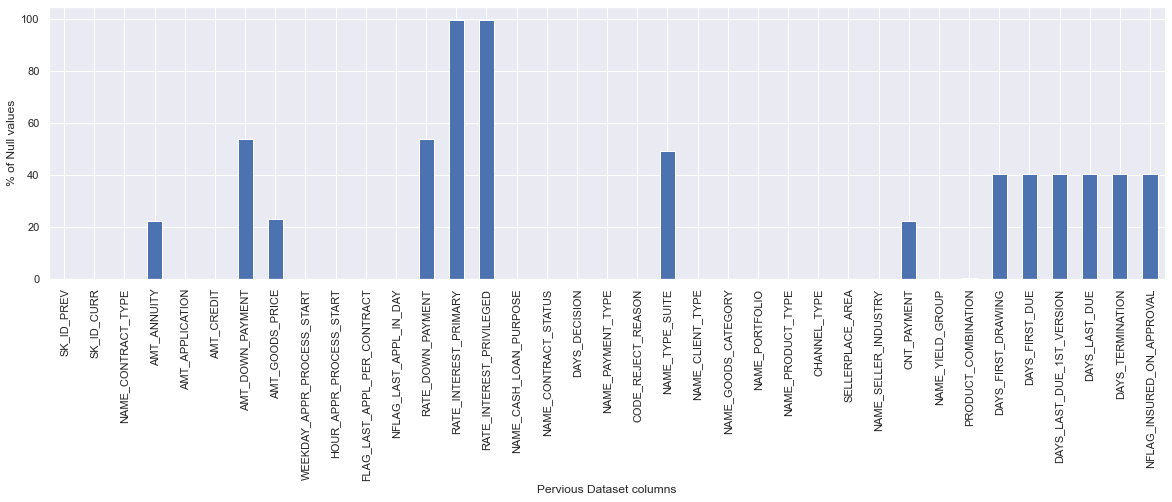

In [163]:
(previous_df.isnull().sum()*100/len(previous_df)).plot(kind='bar',figsize=(20,5))
plt.ylabel("% of Null values")
plt.xlabel("Pervious Dataset columns")


In [164]:
#checking what are the columns contains null values more than 50%
(previous_df.isnull().sum()*100/len(previous_df)>50)

SK_ID_PREV                     False
SK_ID_CURR                     False
NAME_CONTRACT_TYPE             False
AMT_ANNUITY                    False
AMT_APPLICATION                False
AMT_CREDIT                     False
AMT_DOWN_PAYMENT                True
AMT_GOODS_PRICE                False
WEEKDAY_APPR_PROCESS_START     False
HOUR_APPR_PROCESS_START        False
FLAG_LAST_APPL_PER_CONTRACT    False
NFLAG_LAST_APPL_IN_DAY         False
RATE_DOWN_PAYMENT               True
RATE_INTEREST_PRIMARY           True
RATE_INTEREST_PRIVILEGED        True
NAME_CASH_LOAN_PURPOSE         False
NAME_CONTRACT_STATUS           False
DAYS_DECISION                  False
NAME_PAYMENT_TYPE              False
CODE_REJECT_REASON             False
NAME_TYPE_SUITE                False
NAME_CLIENT_TYPE               False
NAME_GOODS_CATEGORY            False
NAME_PORTFOLIO                 False
NAME_PRODUCT_TYPE              False
CHANNEL_TYPE                   False
SELLERPLACE_AREA               False
N

In [165]:
# Total number of columns contain null values grater than 50%
(previous_df.isnull().sum()*100/len(previous_df)>50).sum()

4

* **4 columns contain null values grater than 50%**

In [167]:
Percentage_g50=(previous_df.isnull().sum()*100/len(previous_df)>50)
Percentage_g50

SK_ID_PREV                     False
SK_ID_CURR                     False
NAME_CONTRACT_TYPE             False
AMT_ANNUITY                    False
AMT_APPLICATION                False
AMT_CREDIT                     False
AMT_DOWN_PAYMENT                True
AMT_GOODS_PRICE                False
WEEKDAY_APPR_PROCESS_START     False
HOUR_APPR_PROCESS_START        False
FLAG_LAST_APPL_PER_CONTRACT    False
NFLAG_LAST_APPL_IN_DAY         False
RATE_DOWN_PAYMENT               True
RATE_INTEREST_PRIMARY           True
RATE_INTEREST_PRIVILEGED        True
NAME_CASH_LOAN_PURPOSE         False
NAME_CONTRACT_STATUS           False
DAYS_DECISION                  False
NAME_PAYMENT_TYPE              False
CODE_REJECT_REASON             False
NAME_TYPE_SUITE                False
NAME_CLIENT_TYPE               False
NAME_GOODS_CATEGORY            False
NAME_PORTFOLIO                 False
NAME_PRODUCT_TYPE              False
CHANNEL_TYPE                   False
SELLERPLACE_AREA               False
N

In [168]:
# columns contain null values grater than 50%
drop_col=[]
for i in range(len(Percentage_g50)):
    if Percentage_g50[i]==True:
        drop_col.append(Percentage_g50.index[i])
print(len(drop_col))
print(drop_col)

4
['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED']


In [169]:
# Droping all the columns those contain null values grater than 50%
previous_df.drop(columns = drop_col, inplace = True)

In [170]:
# Shape of the dataset after removal of columns with more than 50% null values 
previous_df.shape

(1670214, 33)

* **In the original previous_application.csv contain 37 columns. After reomval of 4 columns we still left with 33 columns**

## Dealing with null values more than 30%

In [171]:
#checking what are the columns contains null values more than 30%
(previous_df.isnull().sum()*100/len(previous_df)>30)

SK_ID_PREV                     False
SK_ID_CURR                     False
NAME_CONTRACT_TYPE             False
AMT_ANNUITY                    False
AMT_APPLICATION                False
AMT_CREDIT                     False
AMT_GOODS_PRICE                False
WEEKDAY_APPR_PROCESS_START     False
HOUR_APPR_PROCESS_START        False
FLAG_LAST_APPL_PER_CONTRACT    False
NFLAG_LAST_APPL_IN_DAY         False
NAME_CASH_LOAN_PURPOSE         False
NAME_CONTRACT_STATUS           False
DAYS_DECISION                  False
NAME_PAYMENT_TYPE              False
CODE_REJECT_REASON             False
NAME_TYPE_SUITE                 True
NAME_CLIENT_TYPE               False
NAME_GOODS_CATEGORY            False
NAME_PORTFOLIO                 False
NAME_PRODUCT_TYPE              False
CHANNEL_TYPE                   False
SELLERPLACE_AREA               False
NAME_SELLER_INDUSTRY           False
CNT_PAYMENT                    False
NAME_YIELD_GROUP               False
PRODUCT_COMBINATION            False
D

In [172]:
# Total number of columns contain null values grater than 30%
(previous_df.isnull().sum()*100/len(previous_df)>30).sum()

7

In [173]:
Perecntage_g30=(previous_df.isnull().sum()*100/len(previous_df)>30)
Perecntage_g30

SK_ID_PREV                     False
SK_ID_CURR                     False
NAME_CONTRACT_TYPE             False
AMT_ANNUITY                    False
AMT_APPLICATION                False
AMT_CREDIT                     False
AMT_GOODS_PRICE                False
WEEKDAY_APPR_PROCESS_START     False
HOUR_APPR_PROCESS_START        False
FLAG_LAST_APPL_PER_CONTRACT    False
NFLAG_LAST_APPL_IN_DAY         False
NAME_CASH_LOAN_PURPOSE         False
NAME_CONTRACT_STATUS           False
DAYS_DECISION                  False
NAME_PAYMENT_TYPE              False
CODE_REJECT_REASON             False
NAME_TYPE_SUITE                 True
NAME_CLIENT_TYPE               False
NAME_GOODS_CATEGORY            False
NAME_PORTFOLIO                 False
NAME_PRODUCT_TYPE              False
CHANNEL_TYPE                   False
SELLERPLACE_AREA               False
NAME_SELLER_INDUSTRY           False
CNT_PAYMENT                    False
NAME_YIELD_GROUP               False
PRODUCT_COMBINATION            False
D

In [174]:
col_Gthan_30=[]
for i in range(len(Perecntage_g30)):
    if Perecntage_g30[i]==True:
        col_Gthan_30.append(Perecntage_g30.index[i])
print(len(col_Gthan_30))
print(col_Gthan_30)

7
['NAME_TYPE_SUITE', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']


In [175]:
col_Gthan_30

['NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [176]:
# To check percentage of null values in all columns 
for i in col_Gthan_30:
    print(i+"\t","===>",(previous_df[i].isnull().sum()*100/len(previous_df)))   

NAME_TYPE_SUITE	 ===> 49.11975351661523
DAYS_FIRST_DRAWING	 ===> 40.29812946125467
DAYS_FIRST_DUE	 ===> 40.29812946125467
DAYS_LAST_DUE_1ST_VERSION	 ===> 40.29812946125467
DAYS_LAST_DUE	 ===> 40.29812946125467
DAYS_TERMINATION	 ===> 40.29812946125467
NFLAG_INSURED_ON_APPROVAL	 ===> 40.29812946125467


In [177]:
# for complete column output
pd.set_option("display.max_colwidth", -1)
col_data=pd.read_csv(r'C:\Users\1956802\Downloads\columns_description (1).csv',encoding='mac_roman')
col_data.tail(38) # gives all the Description about columns in previous_application.csv 

Unnamed: 0                     Table                          Row  \
122  176         previous_application.csv  SK_ID_PREV                    
123  177         previous_application.csv  SK_ID_CURR                    
124  178         previous_application.csv  NAME_CONTRACT_TYPE            
125  179         previous_application.csv  AMT_ANNUITY                   
126  180         previous_application.csv  AMT_APPLICATION               
127  181         previous_application.csv  AMT_CREDIT                    
128  182         previous_application.csv  AMT_DOWN_PAYMENT              
129  183         previous_application.csv  AMT_GOODS_PRICE               
130  184         previous_application.csv  WEEKDAY_APPR_PROCESS_START    
131  185         previous_application.csv  HOUR_APPR_PROCESS_START       
132  186         previous_application.csv  FLAG_LAST_APPL_PER_CONTRACT   
133  187         previous_application.csv  NFLAG_LAST_APPL_IN_DAY        
134  188         previous_application.csv  NFLAG_MICRO_CASH              
135  189         previous_application.csv  RATE_DOWN_PAYMENT             
136  190         previous_application.csv  RATE_INTEREST_PRIMARY         
137  191         previous_application.csv  RATE_INTEREST_PRIVILEGED      
138  192         previous_application.csv  NAME_CASH_LOAN_PURPOSE        
139  193         previous_application.csv  NAME_CONTRACT_STATUS          
140  194         previous_application.csv  DAYS_DECISION                 
141  195         previous_application.csv  NAME_PAYMENT_TYPE             
142  196         previous_application.csv  CODE_REJECT_REASON            
143  197         previous_application.csv  NAME_TYPE_SUITE               
144  198         previous_application.csv  NAME_CLIENT_TYPE              
145  199         previous_application.csv  NAME_GOODS_CATEGORY           
146  200         previous_application.csv  NAME_PORTFOLIO                
147  201         previous_application.csv  NAME_PRODUCT_TYPE             
148  202         previous_application.csv  CHANNEL_TYPE                  
149  203         previous_application.csv  SELLERPLACE_AREA              
150  204         previous_application.csv  NAME_SELLER_INDUSTRY          
151  205         previous_application.csv  CNT_PAYMENT                   
152  206         previous_application.csv  NAME_YIELD_GROUP              
153  207         previous_application.csv  PRODUCT_COMBINATION           
154  208         previous_application.csv  DAYS_FIRST_DRAWING            
155  209         previous_application.csv  DAYS_FIRST_DUE                
156  210         previous_application.csv  DAYS_LAST_DUE_1ST_VERSION     
157  211         previous_application.csv  DAYS_LAST_DUE                 
158  212         previous_application.csv  DAYS_TERMINATION              
159  213         previous_application.csv  NFLAG_INSURED_ON_APPROVAL     

                                                                                                                                                                                                                                                             Description  \
122  ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loan applications in Home Credit, previous application could, but not necessarily have to lead to credit)                                 
123  ID of loan in our sample                                                                                                                                                                                                                                              
124  Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application                                                                                                                                                                               
125  Annuity of previous application          

In [178]:
col_Gthan_30

['NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [179]:
previous_df["NAME_TYPE_SUITE"].value_counts()

Unaccompanied      508970
Family             213263
Spouse, partner    67069 
Children           31566 
Other_B            17624 
Other_A            9077  
Group of people    2240  
Name: NAME_TYPE_SUITE, dtype: int64

In [180]:
previous_df['NAME_TYPE_SUITE'].isnull().sum()

820405

In [181]:
# Imputing "Nameless" for all the missing values in NAME_TYPE_SUITE column
previous_df["NAME_TYPE_SUITE"] = previous_df["NAME_TYPE_SUITE"].fillna("Nameless") 

In [182]:
previous_df['NAME_TYPE_SUITE'].isnull().sum() # So from now on no more missing data in NAME_TYPE_SUITE column

0

In [183]:
days_col=['DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION']
days_col

['DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION']

In [184]:
previous_df[days_col].describe()

DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  \
count  997149.000000       997149.000000   997149.000000               
mean   342209.855039       13826.269337    33767.774054                
std    88916.115833        72444.869708    106857.034789               
min   -2922.000000        -2892.000000    -2801.000000                 
25%    365243.000000      -1628.000000    -1242.000000                 
50%    365243.000000      -831.000000     -361.000000                  
75%    365243.000000      -411.000000      129.000000                  
max    365243.000000       365243.000000   365243.000000               

       DAYS_LAST_DUE  DAYS_TERMINATION  
count  997149.000000  997149.000000     
mean   76582.403064   81992.343838      
std    149647.415123  153303.516729     
min   -2889.000000   -2874.000000       
25%   -1314.000000   -1270.000000       
50%   -537.000000    -499.000000        
75%   -74.000000     -44.000000         
max    365243.000000  365243.000000

**There are some negative values in the DAYS columns**

**Reason for negative values in DAYS columns:**
* **The data in DAYS columns is relative to the current application. For eg 'DAYS_BIRTH' column data, if we consider application date as today, then any date prior to today will be in negative format means yesterday will be -1, day before yesterday will be -2 and so on...**
* **Hence we need to convert this negative data to positive data and one method which will be very hand to do this is abs() function**

In [185]:
#Using abs() funtion to convert negative data into positive data
previous_df[days_col]=abs(previous_df[days_col])

In [187]:
previous_df[days_col].describe()

DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  \
count  997149.000000       997149.000000   997149.000000               
mean   342340.056543       15949.224065    35163.363265                
std    88413.495220        72007.270877    106405.950190               
min    2.000000            2.000000        0.000000                    
25%    365243.000000       475.000000      257.000000                  
50%    365243.000000       921.000000      741.000000                  
75%    365243.000000       1825.000000     1735.000000                 
max    365243.000000       365243.000000   365243.000000               

       DAYS_LAST_DUE  DAYS_TERMINATION  
count  997149.000000  997149.000000     
mean   78152.730207   83505.775017      
std    148833.342466  152484.418802     
min    2.000000       2.000000          
25%    455.000000     447.000000        
50%    1155.000000    1171.000000       
75%    2418.000000    2501.000000       
max    365243.000000  365243.000000

**Clearly the DAYS_FIRST_DRAWING column seems to got lot of incorrect data which can be interpreted by seeing the stastical description for the respective column and hence it is wise to drop that column**

In [188]:
previous_df.drop(columns='DAYS_FIRST_DRAWING',inplace=True)

In [189]:
days_col=['DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE', 'DAYS_TERMINATION']
days_col

['DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION']

In [190]:
previous_df[days_col].describe()

DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  \
count  997149.000000   997149.000000              997149.000000   
mean   15949.224065    35163.363265               78152.730207    
std    72007.270877    106405.950190              148833.342466   
min    2.000000        0.000000                   2.000000        
25%    475.000000      257.000000                 455.000000      
50%    921.000000      741.000000                 1155.000000     
75%    1825.000000     1735.000000                2418.000000     
max    365243.000000   365243.000000              365243.000000   

       DAYS_TERMINATION  
count  997149.000000     
mean   83505.775017      
std    152484.418802     
min    2.000000          
25%    447.000000        
50%    1171.000000       
75%    2501.000000       
max    365243.000000

**Handling the missing data in existing DAYS columns using imputing the median of respective columns**

**NOTE:**
* **All the DAYS columns got an extreme max value nearly more than 1000 years which further needs to be handled.**

In [191]:
# Imputing Missing values in DAYS columns using MEDIAN values of the respective columns
previous_df.fillna(previous_df[days_col].median(),inplace = True)

In [192]:
previous_df[days_col].isnull().sum()

DAYS_FIRST_DUE               0
DAYS_LAST_DUE_1ST_VERSION    0
DAYS_LAST_DUE                0
DAYS_TERMINATION             0
dtype: int64

In [193]:
previous_df['NFLAG_INSURED_ON_APPROVAL'].value_counts()

0.0    665527
1.0    331622
Name: NFLAG_INSURED_ON_APPROVAL, dtype: int64

In [194]:
previous_df['NFLAG_INSURED_ON_APPROVAL'].isnull().sum()

673065

**NFLAG_INSURED_ON_APPROVAL got more than 30% missing data which can be handled by imputing mode value which is 0.0 in this case.**

In [195]:
# Imputing Missing values in NFLAG_INSURED_ON_APPROVAL columns using MODE values of the respective column
previous_df['NFLAG_INSURED_ON_APPROVAL'].fillna(0.0,inplace = True)

In [196]:
previous_df['NFLAG_INSURED_ON_APPROVAL'].isnull().sum()

0

## Dealing with null values more than 0%

In [203]:
Perentage0=(previous_df.isnull().sum()*100/len(application_df)>0)
#type(l2)
print(Perentage0)

SK_ID_PREV                     False
SK_ID_CURR                     False
NAME_CONTRACT_TYPE             False
AMT_ANNUITY                    True 
AMT_APPLICATION                False
AMT_CREDIT                     True 
AMT_GOODS_PRICE                True 
WEEKDAY_APPR_PROCESS_START     False
HOUR_APPR_PROCESS_START        False
FLAG_LAST_APPL_PER_CONTRACT    False
NFLAG_LAST_APPL_IN_DAY         False
NAME_CASH_LOAN_PURPOSE         False
NAME_CONTRACT_STATUS           False
DAYS_DECISION                  False
NAME_PAYMENT_TYPE              False
CODE_REJECT_REASON             False
NAME_TYPE_SUITE                False
NAME_CLIENT_TYPE               False
NAME_GOODS_CATEGORY            False
NAME_PORTFOLIO                 False
NAME_PRODUCT_TYPE              False
CHANNEL_TYPE                   False
SELLERPLACE_AREA               False
NAME_SELLER_INDUSTRY           False
CNT_PAYMENT                    True 
NAME_YIELD_GROUP               False
PRODUCT_COMBINATION            True 
D

In [204]:
col_Gthan_0=[]
for i in range(len(Perentage0)):
    if Perentage0[i]==True:
        col_Gthan_0.append(Perentage0.index[i])
print(len(col_Gthan_0))
print(col_Gthan_0)

5
['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'CNT_PAYMENT', 'PRODUCT_COMBINATION']


In [205]:
# To check percentage of null values in all columns 
for i in col_Gthan_0:
    print(i+"\t","===>",(previous_df[i].isnull().sum()*100/len(previous_df)))    

AMT_ANNUITY	 ===> 22.286665062081866
AMT_CREDIT	 ===> 5.9872567227912114e-05
AMT_GOODS_PRICE	 ===> 23.08177275486854
CNT_PAYMENT	 ===> 22.286365699245724
PRODUCT_COMBINATION	 ===> 0.02071590826085759


**AMT_CREDIT column got very less missing vlaues**

In [206]:
amt_col=['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE']
previous_df[amt_col].describe()

AMT_ANNUITY    AMT_CREDIT  AMT_GOODS_PRICE
count  1.297979e+06  1.670213e+06  1.284699e+06   
mean   1.595512e+04  1.961140e+05  2.278473e+05   
std    1.478214e+04  3.185746e+05  3.153966e+05   
min    0.000000e+00  0.000000e+00  0.000000e+00   
25%    6.321780e+03  2.416050e+04  5.084100e+04   
50%    1.125000e+04  8.054100e+04  1.123200e+05   
75%    2.065842e+04  2.164185e+05  2.340000e+05   
max    4.180581e+05  6.905160e+06  6.905160e+06

**From the above stastical description it can be clear that there are lot of outliers in these AMT columns**

Box plot for AMT_ANNUITY Column


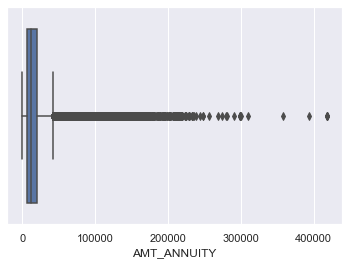

:::::::::::::::
Box plot for AMT_CREDIT Column


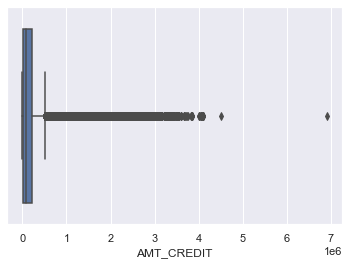

:::::::::::::::
Box plot for AMT_GOODS_PRICE Column


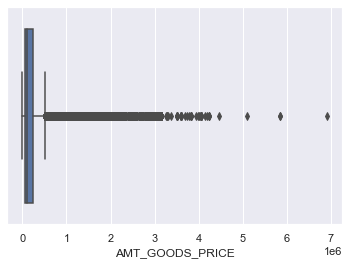

:::::::::::::::


In [207]:
# Box plots for all AMT columns
for i in amt_col:
    print("Box plot for "+i+" Column")
    sns.boxplot(previous_df[i])
    plt.show()
    print(":::::::::::::::")

In [208]:
previous_df[amt_col].isnull().sum()

AMT_ANNUITY        372235
AMT_CREDIT         1     
AMT_GOODS_PRICE    385515
dtype: int64

In [209]:
amt_col=['AMT_ANNUITY','AMT_GOODS_PRICE']

In [210]:
previous_df[amt_col].isnull().sum()

AMT_ANNUITY        372235
AMT_GOODS_PRICE    385515
dtype: int64

In [211]:
# Imputing Missing values in AMT columns using MEDIAN values of the respective columns
previous_df.fillna(previous_df[amt_col].median(),inplace = True)

In [212]:
previous_df[amt_col].isnull().sum()

AMT_ANNUITY        0
AMT_GOODS_PRICE    0
dtype: int64

In [213]:
previous_df['PRODUCT_COMBINATION'].value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest        98833 
POS household without interest    82908 
Card X-Sell                       80582 
Cash Street: high                 59639 
Cash X-Sell: high                 59301 
Cash Street: middle               34658 
Cash Street: low                  33834 
POS mobile without interest       24082 
POS other with interest           23879 
POS industry without interest     12602 
POS others without interest       2555  
Name: PRODUCT_COMBINATION, dtype: int64

In [214]:
previous_df['PRODUCT_COMBINATION'].isnull().sum()

346

**PRODUCT_COMBINATION got some few missing data which can be handled by imputing mode value which is Cash category in this case.**

In [215]:
# Imputing Missing values in PRODUCT_COMBINATION columns using MODE value of the respective column
previous_df['PRODUCT_COMBINATION'].fillna('Cash',inplace = True)

In [216]:
previous_df['PRODUCT_COMBINATION'].isnull().sum() # No more null values in this PRODUCT_COMBINATION column 

0

In [217]:
previous_df['CNT_PAYMENT'].describe()

count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

**CNT_PAYMENT column also seems to got lot of outlier data.**

<AxesSubplot:xlabel='CNT_PAYMENT'>

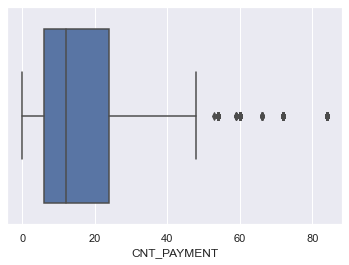

In [218]:
# Box Plot for CNT_PAYMENT
sns.boxplot(previous_df['CNT_PAYMENT'])

In [219]:
previous_df['CNT_PAYMENT'].isnull().sum()

372230

In [220]:
# Imputing Missing values in DAYS columns using MEDIAN values of the respective columns
previous_df['CNT_PAYMENT'].fillna(previous_df['CNT_PAYMENT'].median(),inplace = True)

In [221]:
previous_df['CNT_PAYMENT'].isnull().sum() # No more missing vlues in CNT_PAYMENT 

0

In [222]:
previous_df['AMT_CREDIT'].isnull().sum()

1

**We still have one null value in the AMT_CREDIT column and it is wise to drop the corresponding row.**

In [223]:
previous_df.shape

(1670214, 32)

In [224]:
not_subset=['AMT_CREDIT']
previous_df=previous_df.dropna(subset=not_subset) # droping a row which got null value in the AMT_CREDIT column

In [225]:
previous_df.shape # one tuple got descresed after removing a row with null value

(1670213, 32)

In [226]:
# To check percentage of null values in all the existing columns 
previous_df.isnull().sum()*100/len(application_df)

SK_ID_PREV                     0.0
SK_ID_CURR                     0.0
NAME_CONTRACT_TYPE             0.0
AMT_ANNUITY                    0.0
AMT_APPLICATION                0.0
AMT_CREDIT                     0.0
AMT_GOODS_PRICE                0.0
WEEKDAY_APPR_PROCESS_START     0.0
HOUR_APPR_PROCESS_START        0.0
FLAG_LAST_APPL_PER_CONTRACT    0.0
NFLAG_LAST_APPL_IN_DAY         0.0
NAME_CASH_LOAN_PURPOSE         0.0
NAME_CONTRACT_STATUS           0.0
DAYS_DECISION                  0.0
NAME_PAYMENT_TYPE              0.0
CODE_REJECT_REASON             0.0
NAME_TYPE_SUITE                0.0
NAME_CLIENT_TYPE               0.0
NAME_GOODS_CATEGORY            0.0
NAME_PORTFOLIO                 0.0
NAME_PRODUCT_TYPE              0.0
CHANNEL_TYPE                   0.0
SELLERPLACE_AREA               0.0
NAME_SELLER_INDUSTRY           0.0
CNT_PAYMENT                    0.0
NAME_YIELD_GROUP               0.0
PRODUCT_COMBINATION            0.0
DAYS_FIRST_DUE                 0.0
DAYS_LAST_DUE_1ST_VE

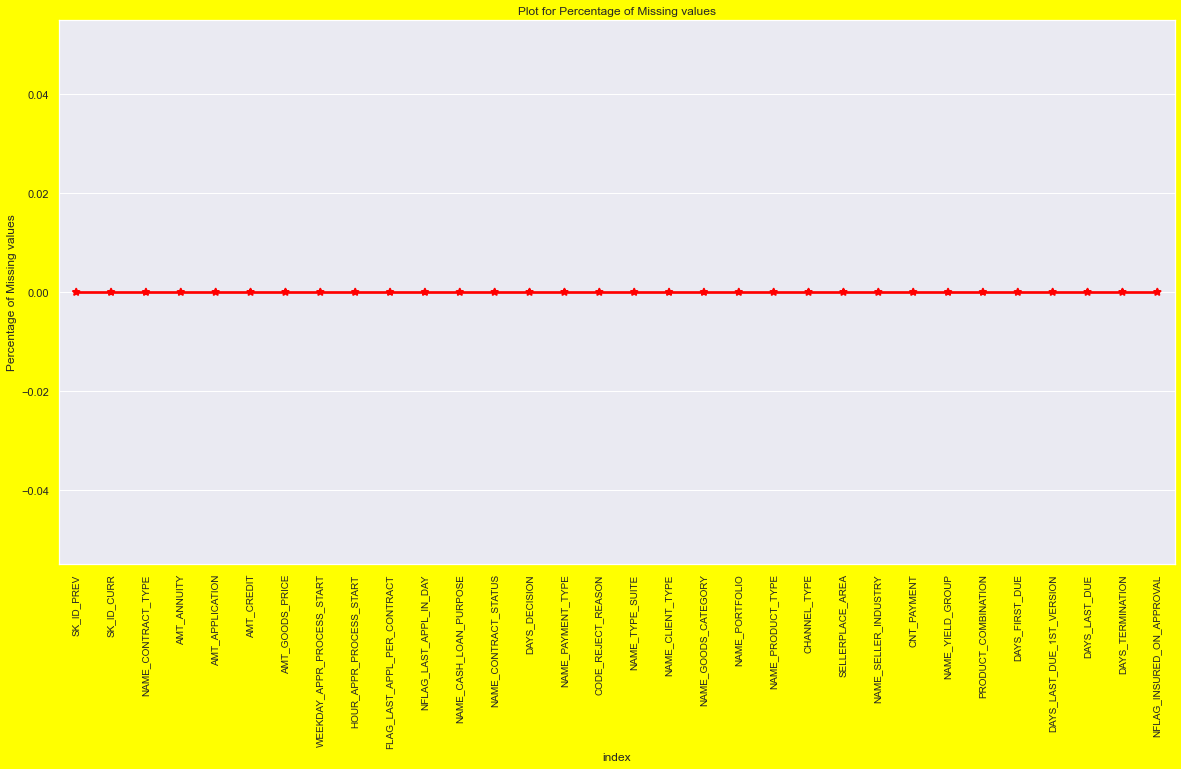

In [231]:
miss_data = pd.DataFrame( (previous_df.isnull().sum()) * 100 / previous_df.shape[0]).reset_index()

plt.figure(figsize = (20,10),facecolor='yellow')

ax = sns.pointplot('index', 0, data = miss_data,color='Red',markers='*')

plt.xticks(rotation = 90, fontsize = 10)

plt.title("Plot for Percentage of Missing values")

plt.ylabel("Percentage of Missing values")

plt.show()

In [232]:
previous_df.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [233]:
previous_df['DAYS_DECISION'].describe()

count    1.670213e+06
mean    -8.806798e+02
std      7.790999e+02
min     -2.922000e+03
25%     -1.300000e+03
50%     -5.810000e+02
75%     -2.800000e+02
max     -1.000000e+00
Name: DAYS_DECISION, dtype: float64

**DAYS_DECISION column got some negative values and coverting that data to positive.**

In [234]:
previous_df['DAYS_DECISION']=abs(previous_df['DAYS_DECISION'])

In [235]:
previous_df['DAYS_DECISION'].describe() # converted to positive one

count    1.670213e+06
mean     8.806798e+02
std      7.790999e+02
min      1.000000e+00
25%      2.800000e+02
50%      5.810000e+02
75%      1.300000e+03
max      2.922000e+03
Name: DAYS_DECISION, dtype: float64

**Handling 'XNA' and 'XAP' values in several columns in previous application data**

In [237]:
#Replacing 'XNA' and 'XAP' with NaN
previous_df.replace({'XNA':np.nan, 'XAP':np.nan}, inplace = True)

In [238]:
previous_df.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [240]:
# Categorical columns in Previous Application dataset
previous_cat_col=previous_df.columns[previous_df.dtypes == object] # all categorical coloumns
#prev_cat_col= list(prev_cat_col)
print(previous_cat_col)

Index(['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')


In [241]:
# getting all numerical data columns in  Previous Application dataset
prev_numerical_col=previous_df.columns[previous_df.dtypes != object] # all numercial coloumns
prev_numerical_col

Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START',
       'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION', 'SELLERPLACE_AREA',
       'CNT_PAYMENT', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

# Univariate Analysis
###### Analysing Individual Variables

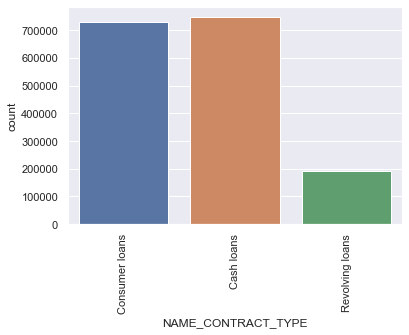

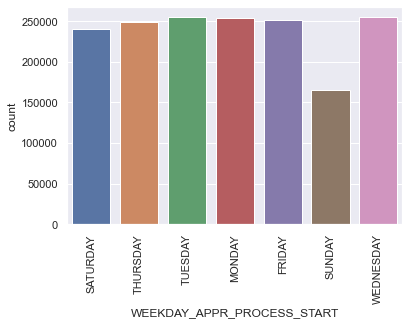

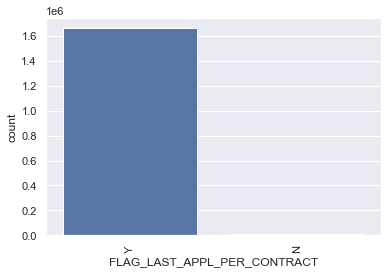

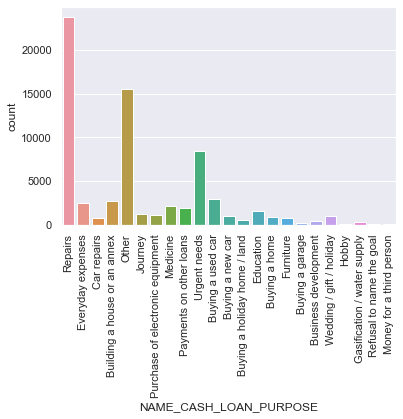

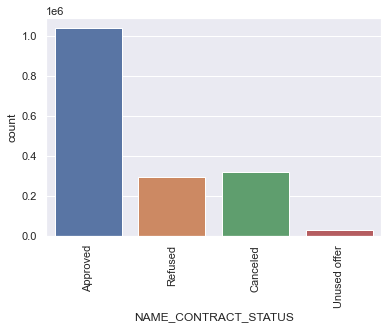

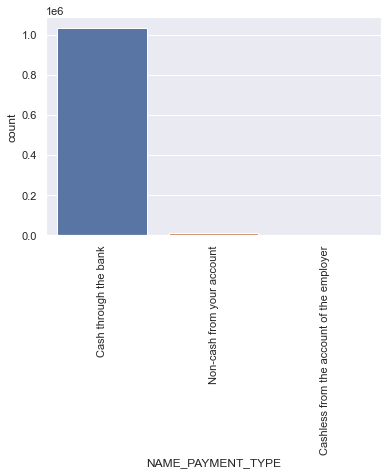

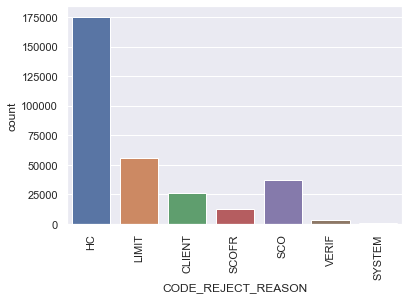

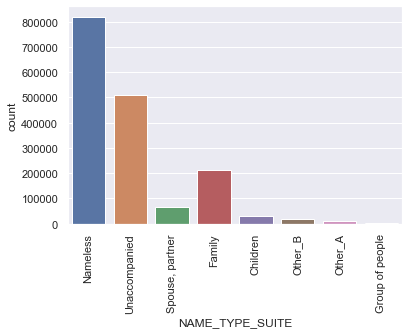

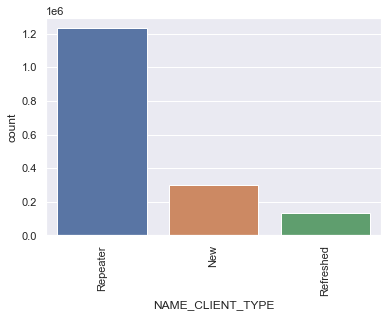

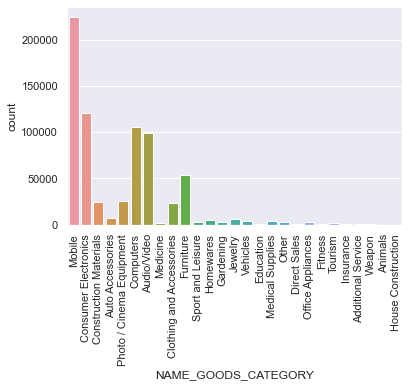

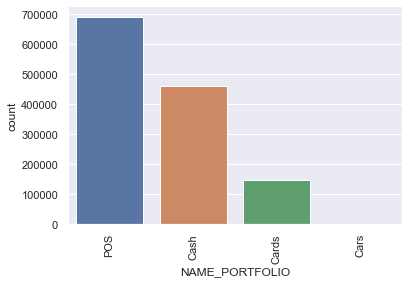

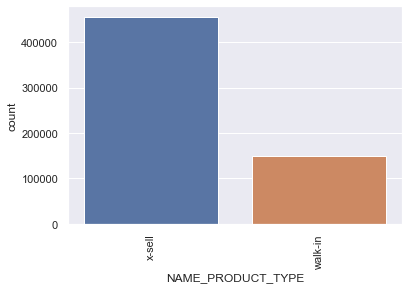

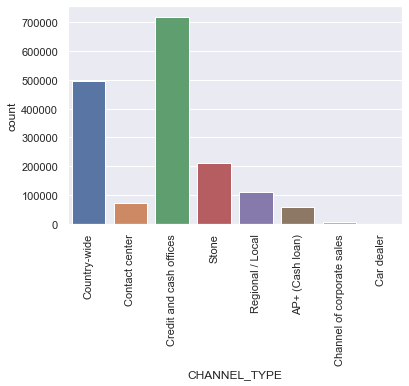

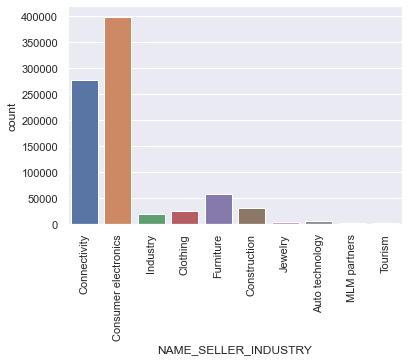

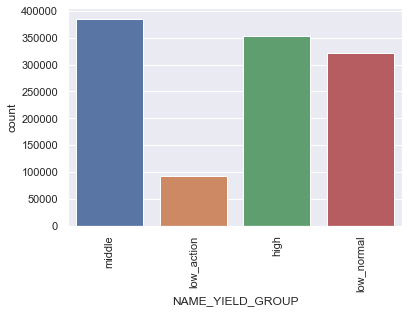

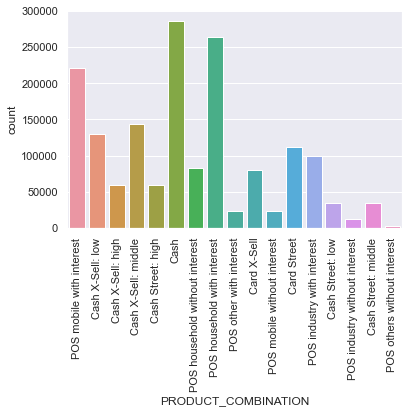

In [242]:
# Count Plots for all Categorical Columns in  Previous Application dataset
for i in previous_cat_col:
    sns.countplot(previous_df[i])
    plt.xticks(rotation = 90)
    plt.show()

* **NAME_CONTRACT_TYPE column:**

    * **The majority of the loans are Cash loans after that Consumer loans atlast Revolving loans.**

* **WEEK_APPR_PROCESS_START column:**

    * **The majority of the loans are on Wednesday,monday and tuesday which we are the starting days of a week.**

* **NAME_CASH_LOAN_PURPOSE column:**

    * **The majority of people belongs to Repairs category in NAME_CASH_LOAN_PURPOSE column.**

* **NAME_CONTRACT_STATUS column:**

    * **It is clear that lot of loan applications got Approved by the bank for previous applications.**

* **NAME_PAYMENT_TYPE column:**
    * **Maximum all the payements i.e, about 99% were done in Cash through the bank type.**

* **CODE_REJECT_REASON column:**
    * **Maximum loans got rejected from bankside falls under HC category.**

* **NAME_TYPE_SUITE column:**
    * **There are lot of missing data in this column and we imputed Nameless category to handle this data and after that Unaccompained category.**

* **NAME_CLIENT_TYPE column:**
    * **Most people belongs to Repeater category in this NAME_CLIENT_TYPE column.**

* **NAME_GOODS_CATEGORY column:**
    * **To buy Mobile lot of people are applied for loan in previous application dataset.**

* **CHANNEL_TYPE column:**

    * *Country wide category is the majority category to which the respective loans got approved and Credit andcash officers laons are mostly got rejected in the whole previous application dataset.*

* **NAME_SELLER_INDUSTRY column:**

    * *Consumer electronics category is the highest category in NAME_SELLER_INDUSTRY which got approval for the loans whole previous application dataset.*

#### Numerical Columns

In [243]:
# Creating speerate datasets for all the four categories
approved_data = previous_df[previous_df['NAME_CONTRACT_STATUS']=='Approved']
refused_data = previous_df[previous_df['NAME_CONTRACT_STATUS']=='Refused']
canceled_data = previous_df[previous_df['NAME_CONTRACT_STATUS']=='Canceled']
unused_data = previous_df[previous_df['NAME_CONTRACT_STATUS']=='Unused offer']

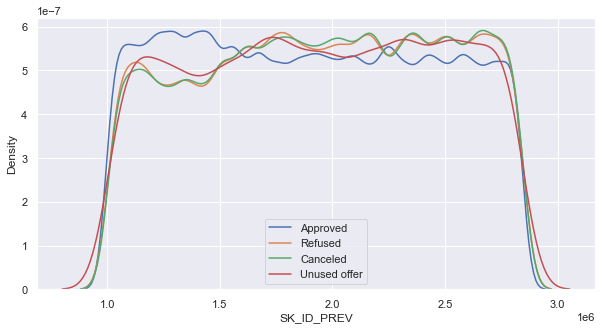

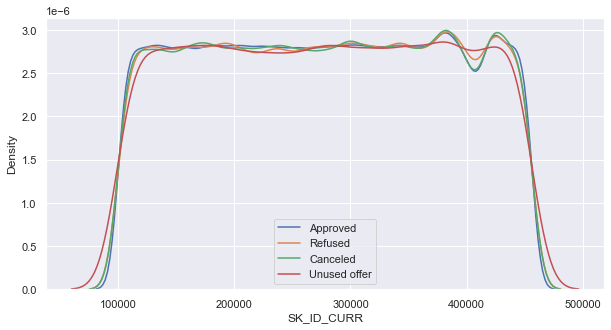

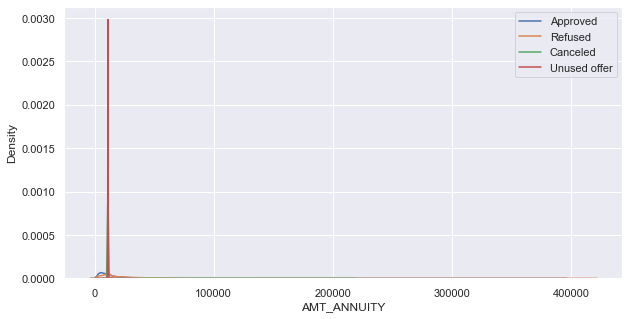

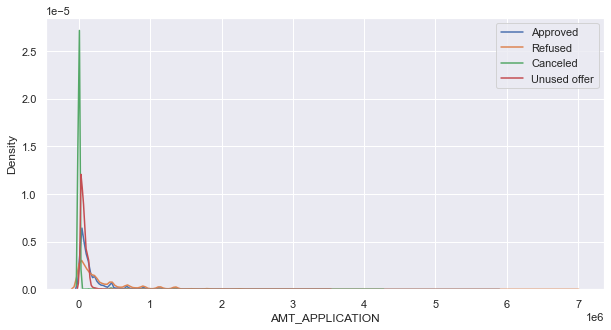

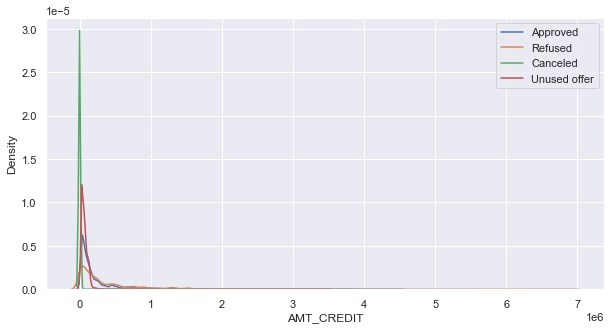

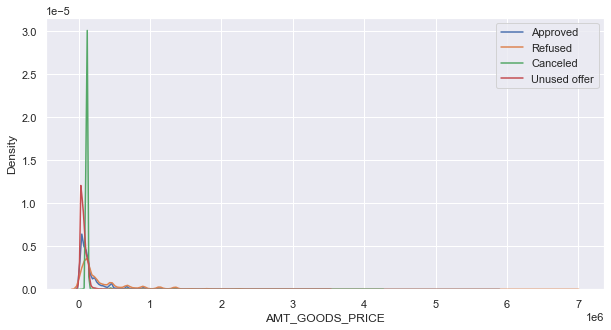

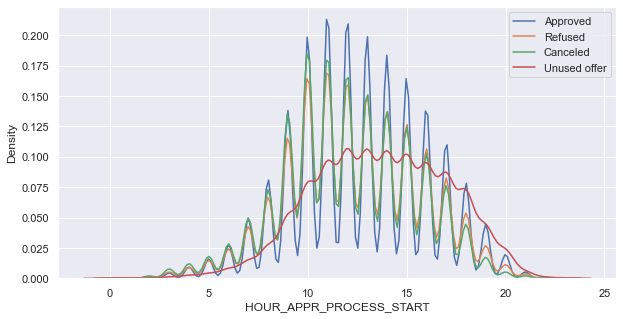

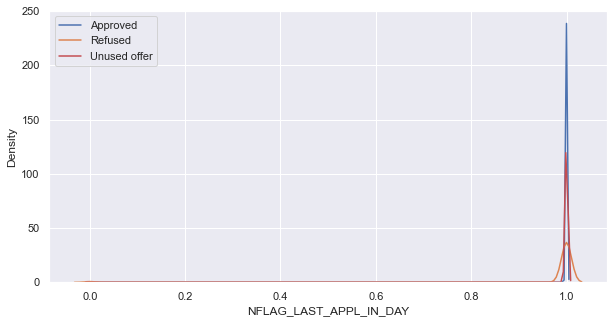

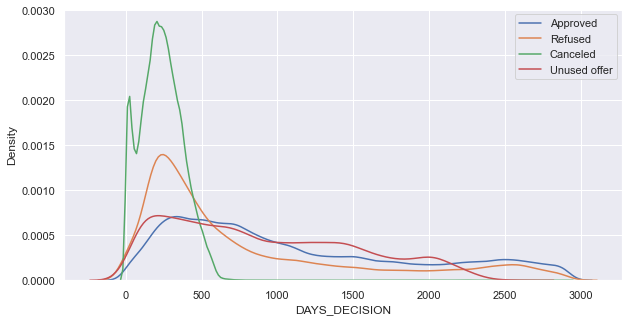

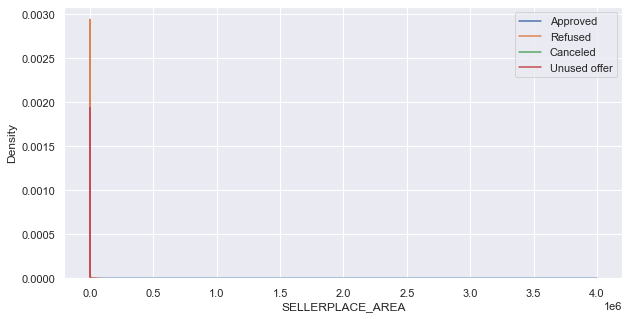

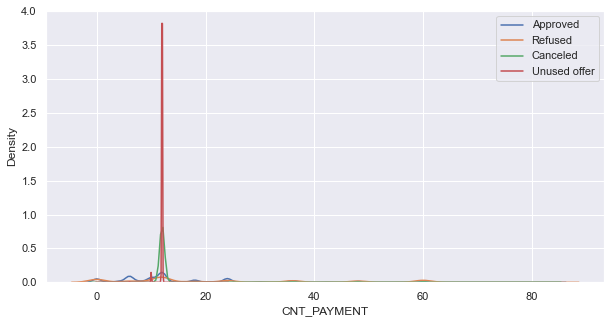

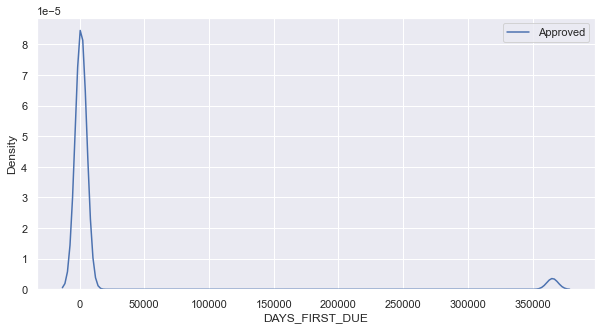

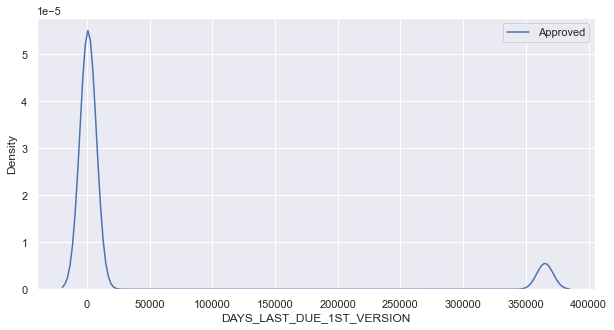

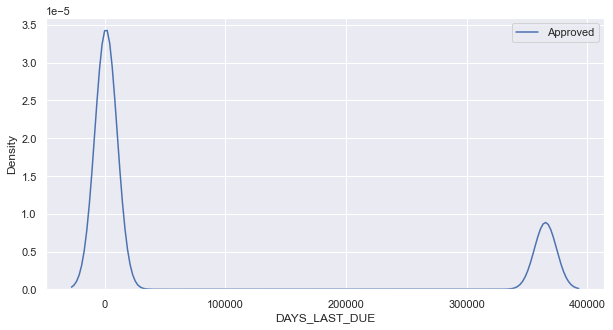

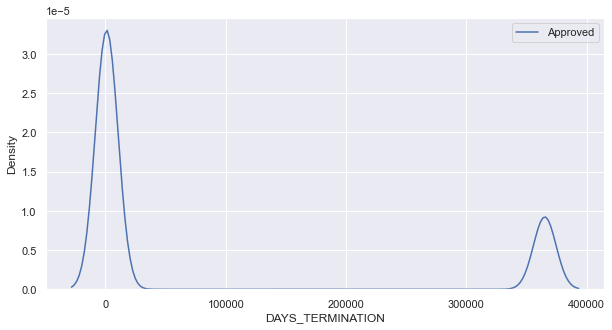

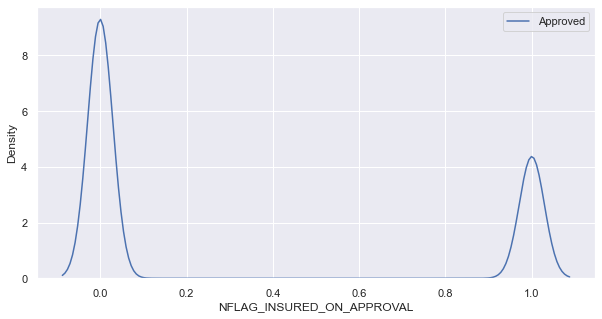

In [244]:
for i in prev_numerical_col:
    plt.figure(figsize=(10,5))
    sns.distplot(approved_data[i], hist=False, label ='Approved')
    sns.distplot(refused_data[i], hist=False, label = 'Refused')
    sns.distplot(canceled_data[i], hist=False, label = 'Canceled')
    sns.distplot(unused_data[i], hist=False, label = 'Unused offer')
    plt.legend()
    plt.show()

## Bivariate Analysis and Multivariate Analysis for Numerical Columns

#### Numeric to numeric analysis

In [246]:
print(prev_numerical_col)
print(len(prev_numerical_col))

Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START',
       'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION', 'SELLERPLACE_AREA',
       'CNT_PAYMENT', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')
16


In [248]:
# Columns who got only two unique values
prev_two_uni_col = []
for i in prev_numerical_col:
    if previous_df[i].nunique()==2:
        prev_two_uni_col.append(i)

In [249]:
print(prev_two_uni_col)
print(len(prev_two_uni_col))

['NFLAG_LAST_APPL_IN_DAY', 'NFLAG_INSURED_ON_APPROVAL']
2


In [250]:
prev_Biv_num_col = [i for i in prev_numerical_col if i not in prev_two_uni_col]
print(prev_Biv_num_col)
len(prev_Biv_num_col)

['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION']


14

In [251]:
list1=['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 
'HOUR_APPR_PROCESS_START']

list2=['DAYS_DECISION','SELLERPLACE_AREA', 'CNT_PAYMENT', 'DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION', 
'DAYS_LAST_DUE', 'DAYS_TERMINATION']

### Pairplots for all Approved

#### List 1

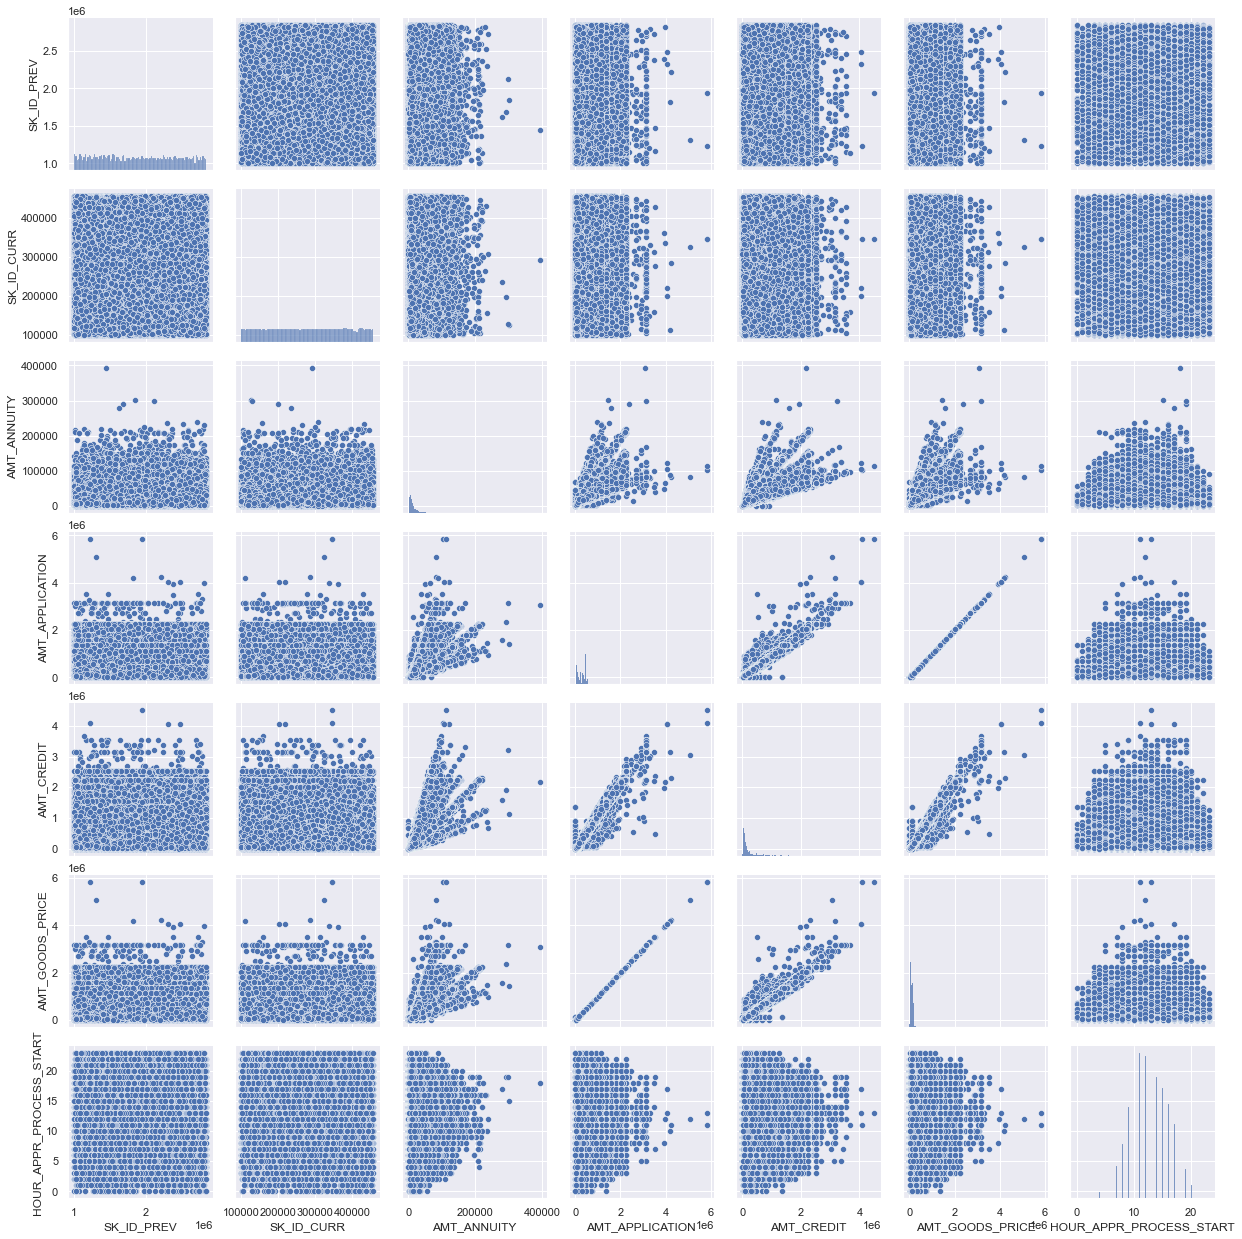

In [252]:
# For list1
sns.pairplot(approved_data[list1])

<AxesSubplot:>

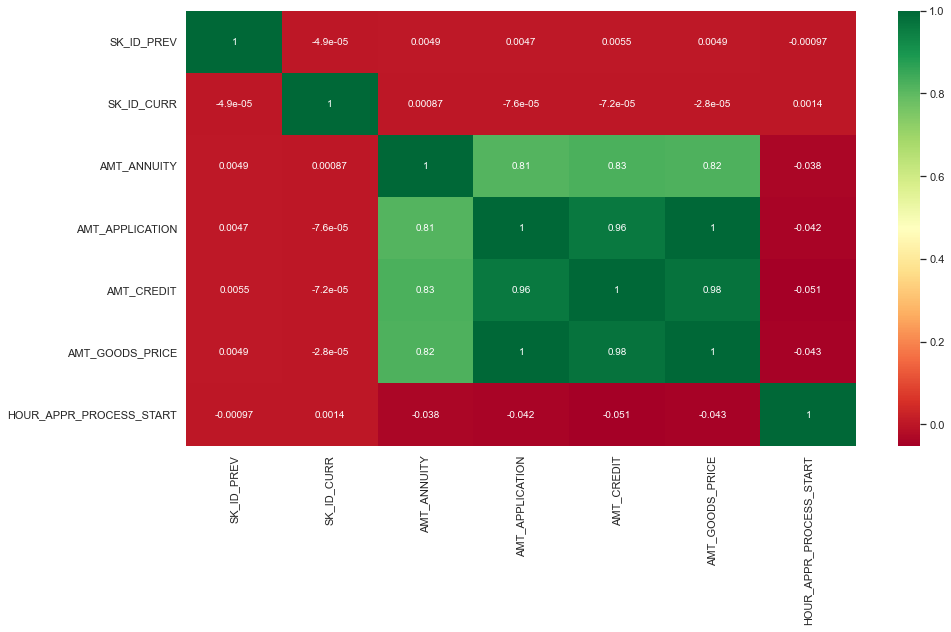

In [253]:
plt.figure(figsize = [15,8])
sns.heatmap(approved_data[list1].corr(), cmap = 'RdYlGn', annot = True)

**Highly correlated columns for Approved Category in list1 are:**

* **'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT' and 'AMT_GOODS_PRICE'**

#### List 2

<AxesSubplot:>

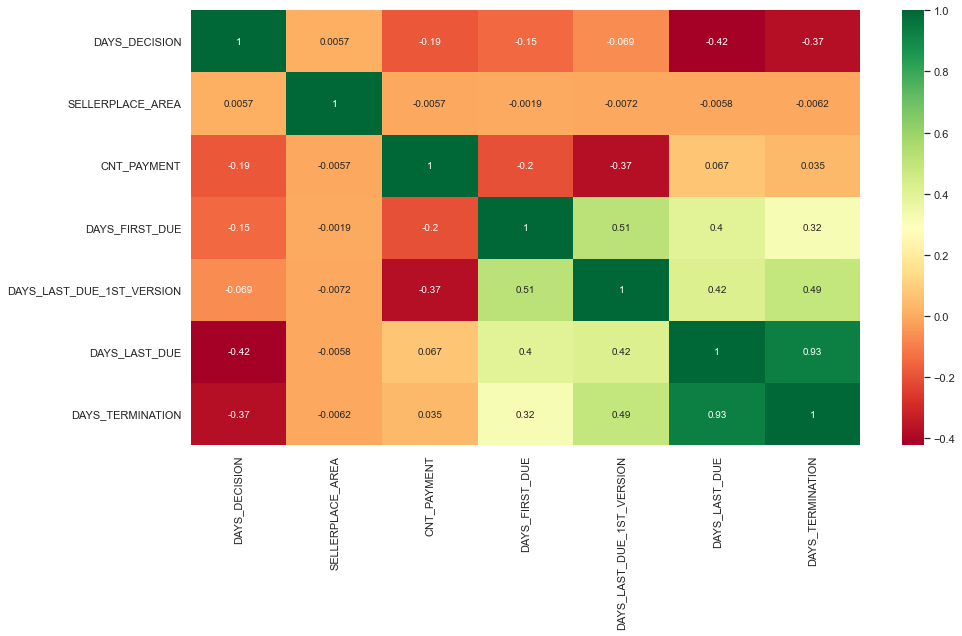

In [255]:
plt.figure(figsize = [15,8])
sns.heatmap(approved_data[list2].corr(), cmap = 'RdYlGn', annot = True)

**Highly correlated columns for Approved category in list2 are:**

* **'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE' and 'DAYS_TERMINATION'**

### Pairplots for all Canceled

#### List 1


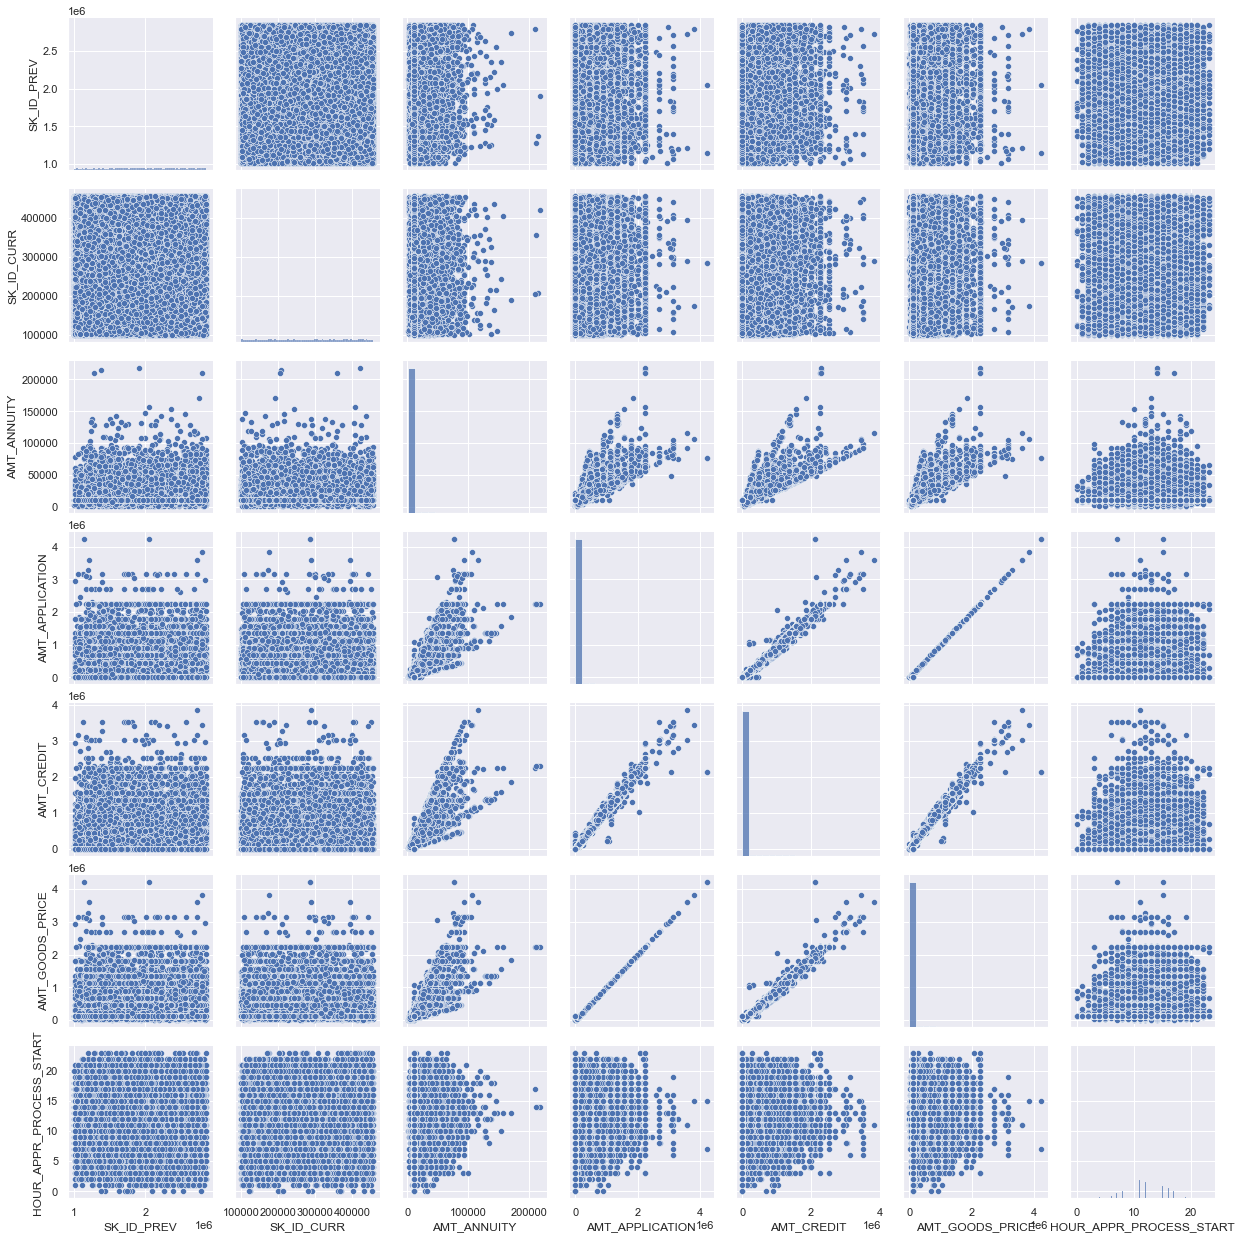

In [257]:
# For list1
sns.pairplot(canceled_data[list1])

<AxesSubplot:>

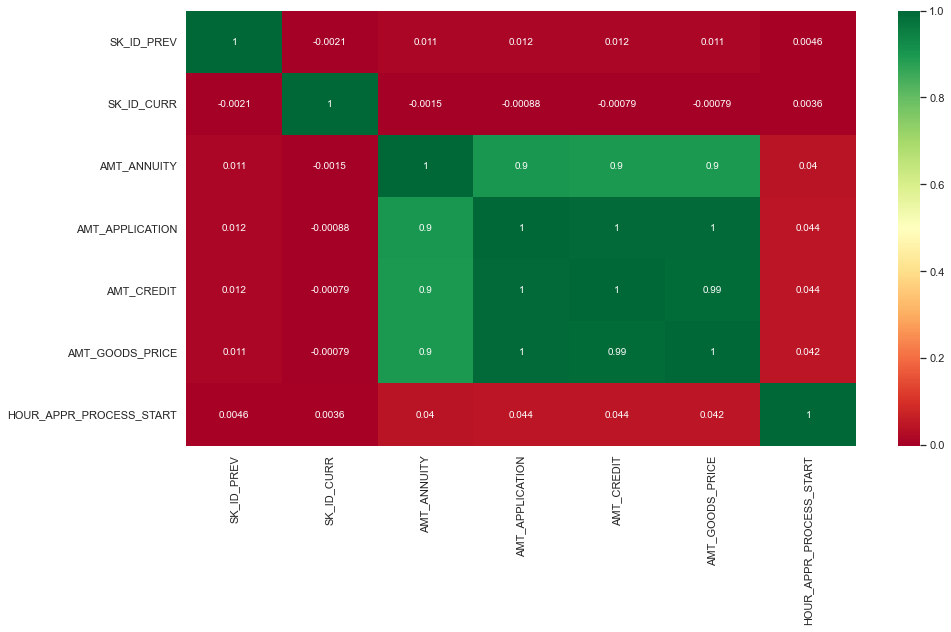

In [261]:
plt.figure(figsize = [15,8])
sns.heatmap(canceled_data[list1].corr(), cmap = 'RdYlGn', annot = True)

**Highly correlated columns for Canceled Category in list1 are:**

* **'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT' and 'AMT_GOODS_PRICE'**

#### List 2

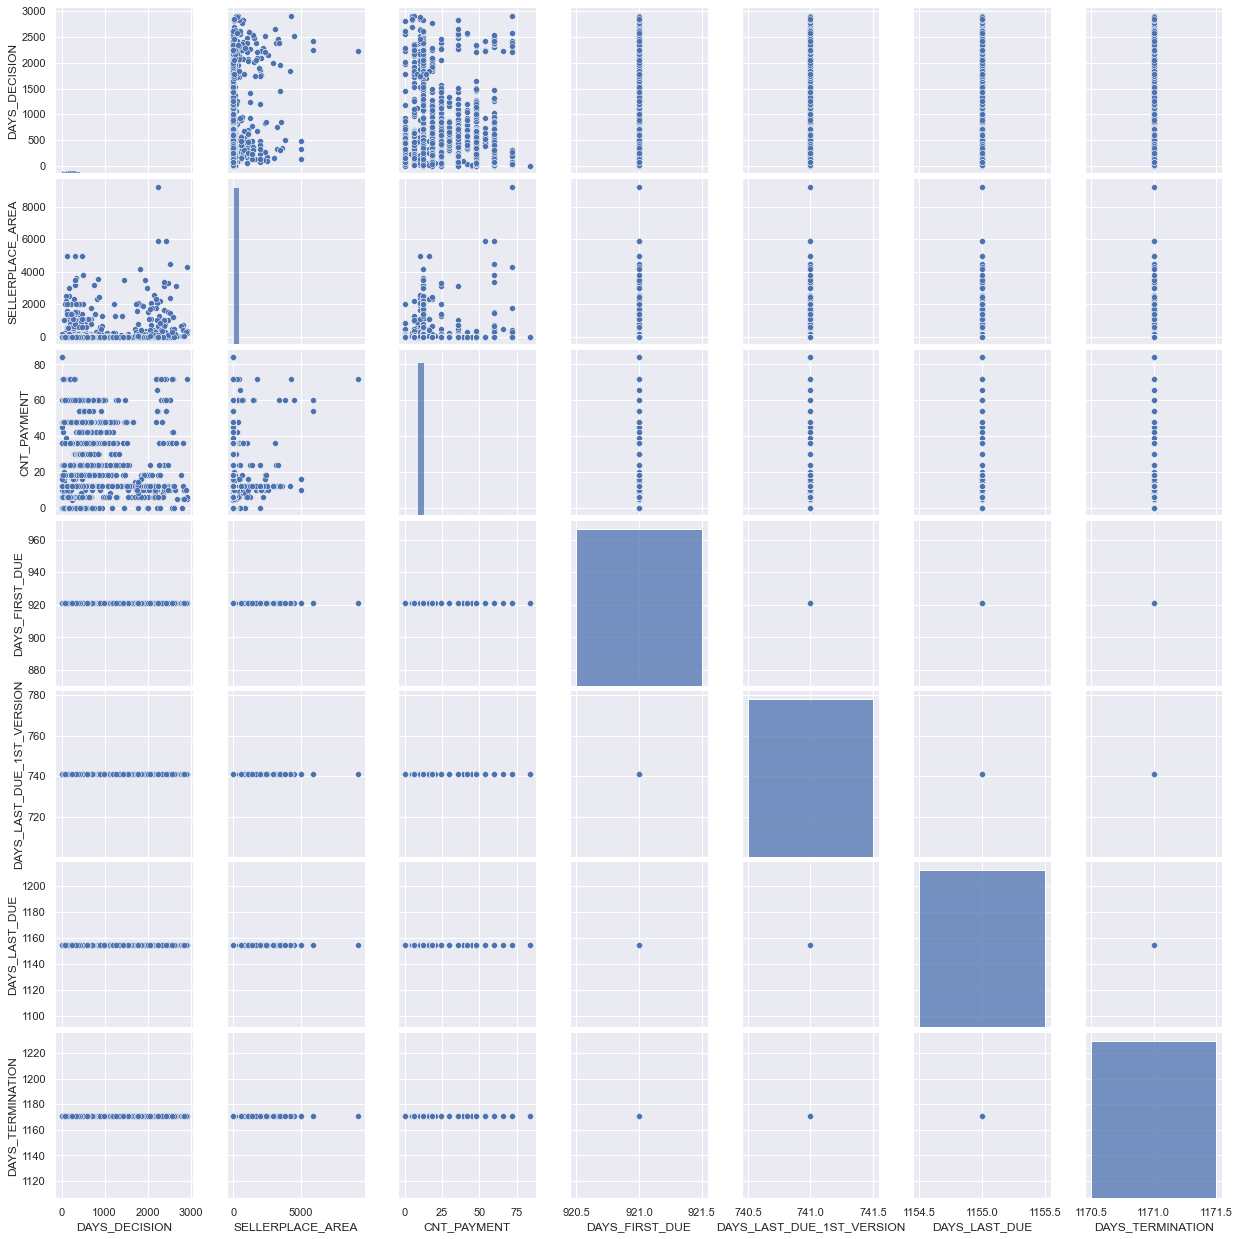

In [259]:
# For list2
sns.pairplot(canceled_data[list2])

<AxesSubplot:>

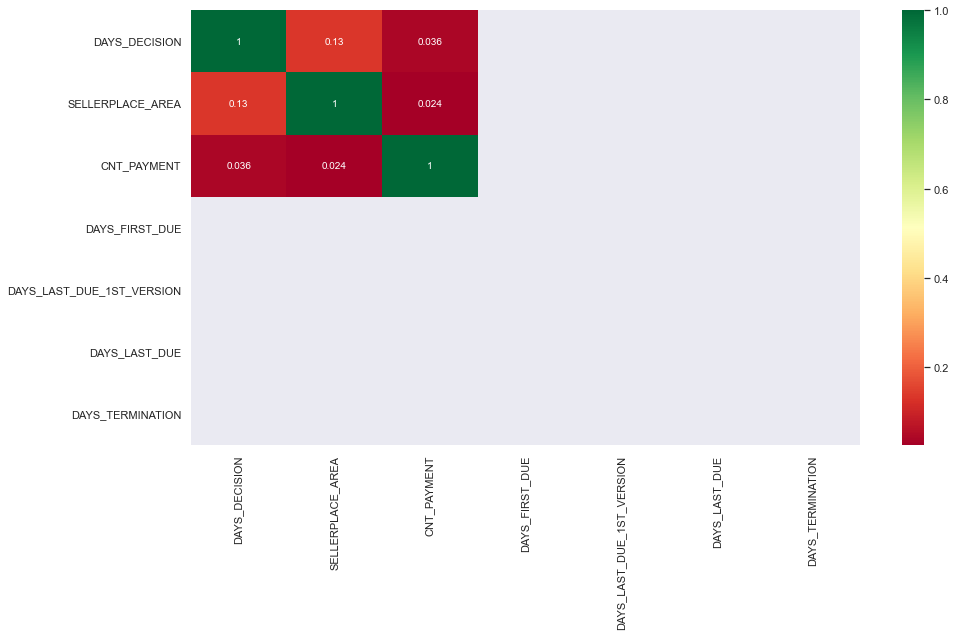

In [262]:
plt.figure(figsize = [15,8])
sns.heatmap(canceled_data[list2].corr(), cmap = 'RdYlGn', annot = True)

**Note: It seems no valuable columns list2 with good correlation.**

## Pairplots for all Refused

#### List1

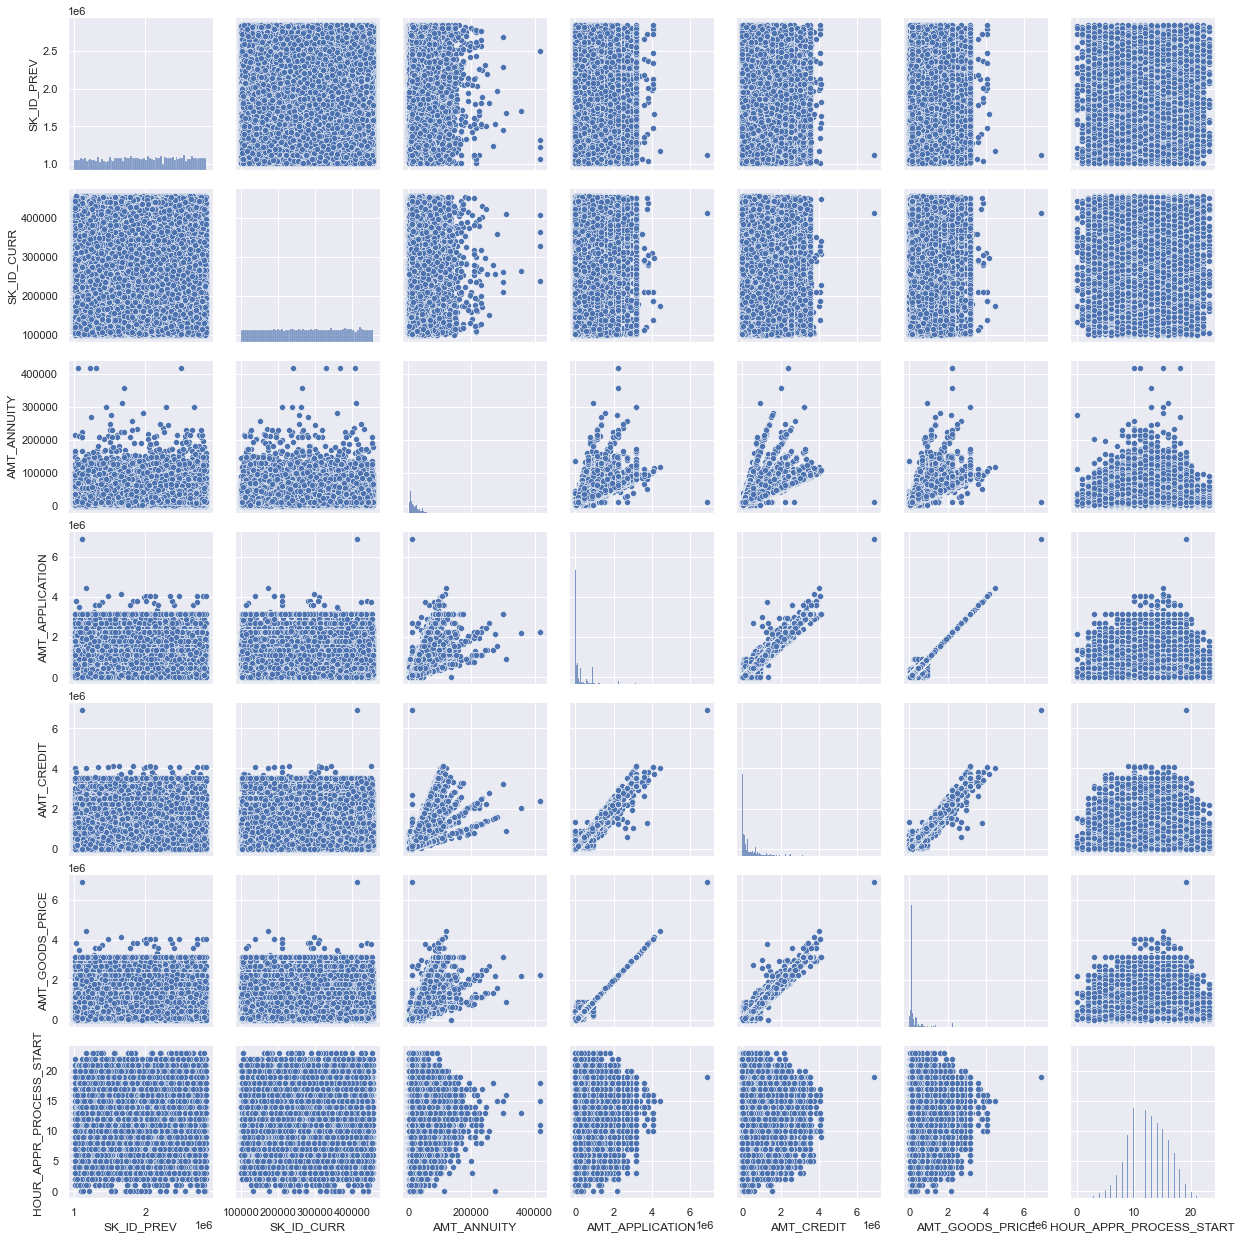

In [263]:
# For list1
sns.pairplot(refused_data[list1])

<AxesSubplot:>

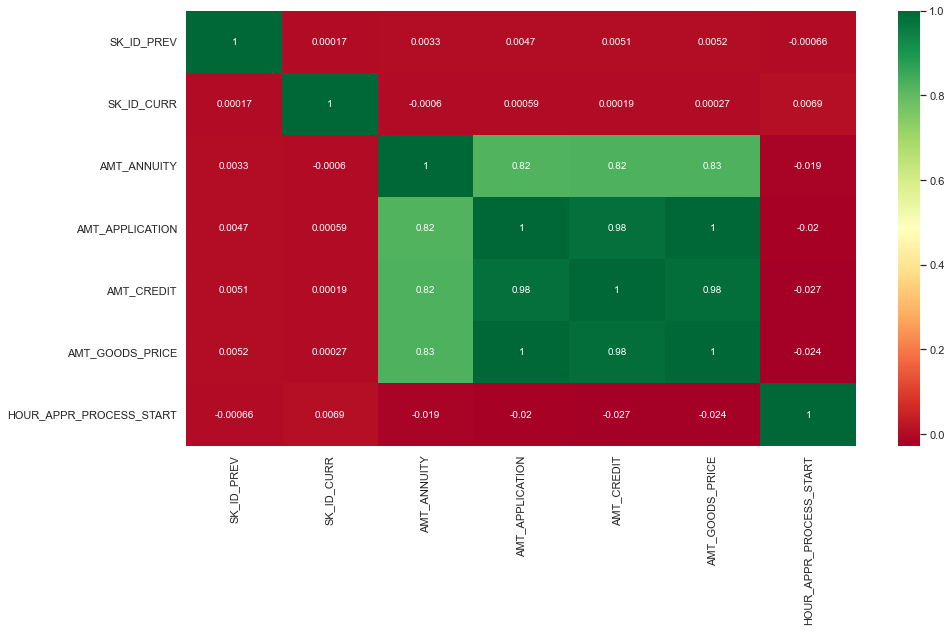

In [267]:
plt.figure(figsize = [15,8])
sns.heatmap(refused_data[list1].corr(), cmap = 'RdYlGn', annot = True)

**Highly correlated columns for Refused Category in list1 are:**

* **'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT' and 'AMT_GOODS_PRICE'**

#### List2

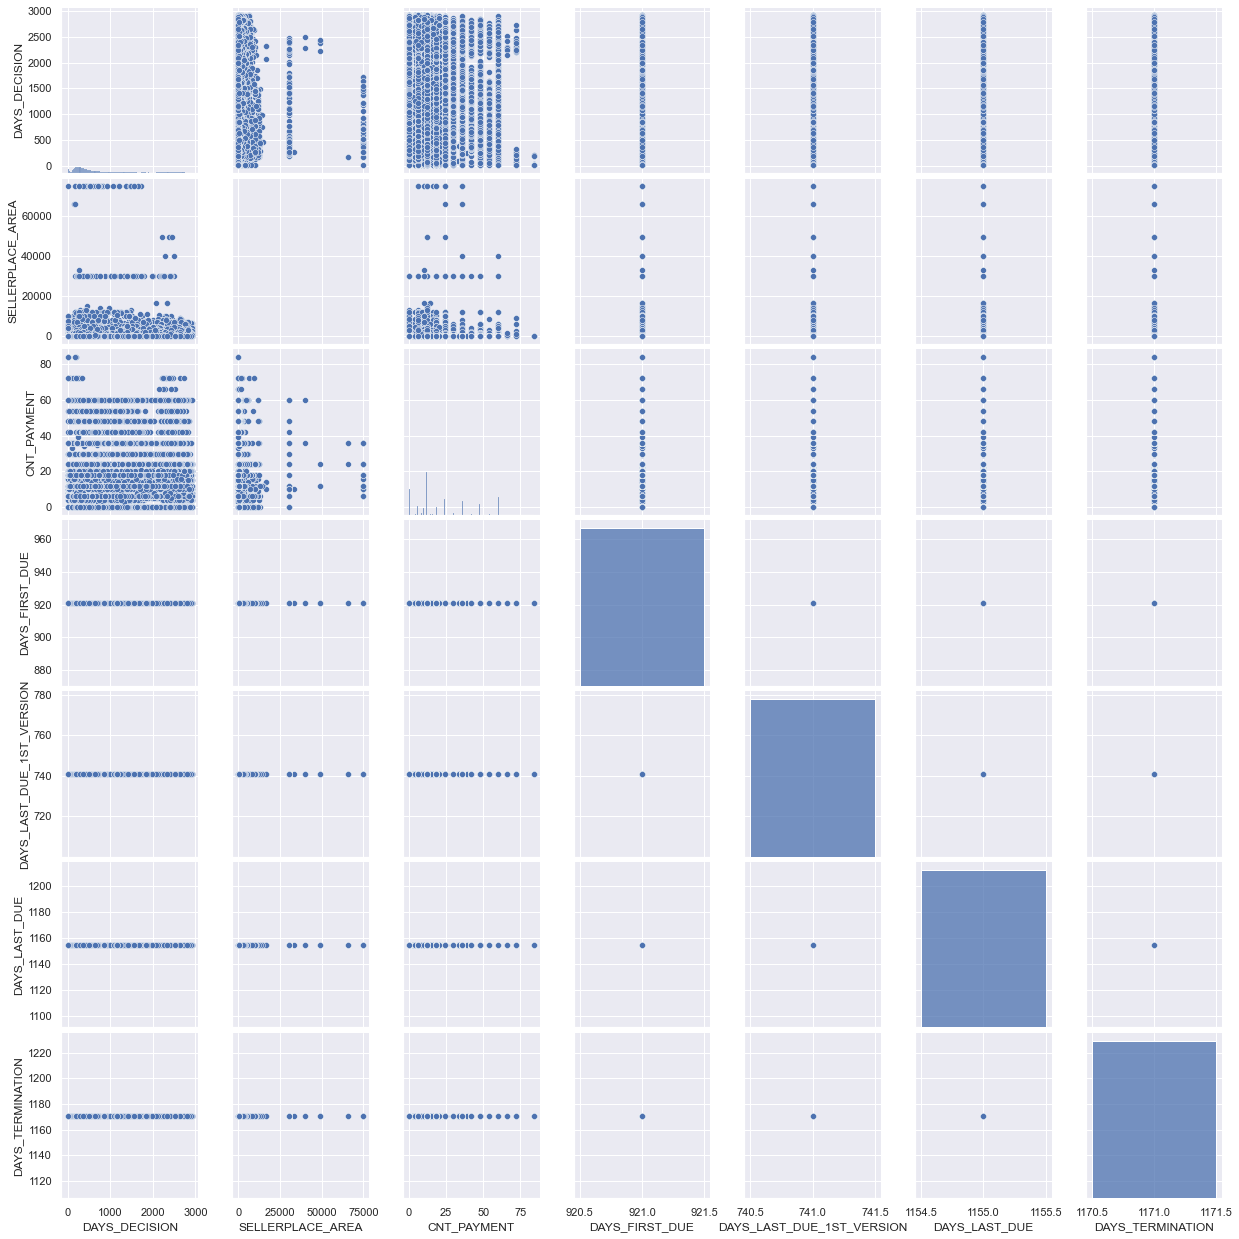

In [265]:
# For list2
sns.pairplot(refused_data[list2])

<AxesSubplot:>

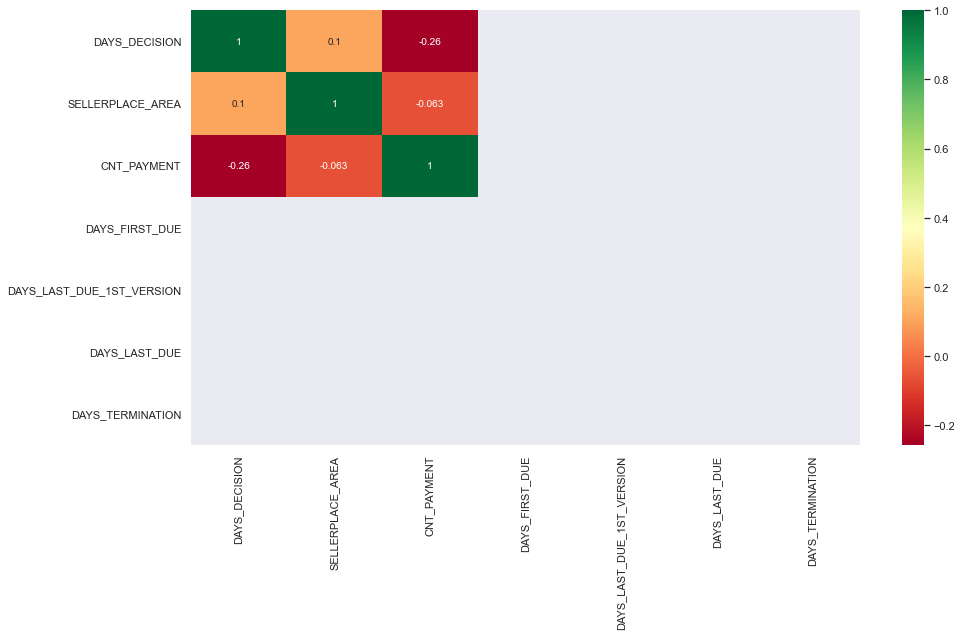

In [266]:
plt.figure(figsize = [15,8])
sns.heatmap(refused_data[list2].corr(), cmap = 'RdYlGn', annot = True)

**Note: It seems no valuable columns list2 with good correlation.**

In [268]:
# Highly correlated Numerical columns in previous application dataset
prev_top_corr_col=['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT' , 'AMT_GOODS_PRICE','SELLERPLACE_AREA',
       'CNT_PAYMENT', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION']

In [269]:
# Highly correlated Numerical columns corresponding correlation_coeff
corr = previous_df[prev_top_corr_col].corr()
prev_cor_mat1 = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
prev_cor_mat1.columns = ['variable_1', 'variable_2', 'correlation_coeff']
prev_cor_mat1 = prev_cor_mat1.loc[prev_cor_mat1.variable_1 != prev_cor_mat1.variable_2]
prev_cor_mat1.dropna(inplace = True)
#new column with absolute correlation coefficient as a high negative correlation is also a strong correlation
prev_cor_mat1['abs_correlation_coeff'] = prev_cor_mat1['correlation_coeff'].abs()
prev_cor_mat1.sort_values('abs_correlation_coeff', ascending = False, inplace = True)
prev_cor_mat1.head(10)

variable_1       variable_2  correlation_coeff  \
31  AMT_GOODS_PRICE   AMT_APPLICATION  0.987143            
21  AMT_CREDIT        AMT_APPLICATION  0.975824            
32  AMT_GOODS_PRICE   AMT_CREDIT       0.971117            
98  DAYS_TERMINATION  DAYS_LAST_DUE    0.935007            
30  AMT_GOODS_PRICE   AMT_ANNUITY      0.816293            
20  AMT_CREDIT        AMT_ANNUITY      0.811670            
10  AMT_APPLICATION   AMT_ANNUITY      0.805558            
51  CNT_PAYMENT       AMT_APPLICATION  0.681113            
53  CNT_PAYMENT       AMT_GOODS_PRICE  0.676007            
52  CNT_PAYMENT       AMT_CREDIT       0.674387            

    abs_correlation_coeff  
31  0.987143               
21  0.975824               
32  0.971117               
98  0.935007               
30  0.816293               
20  0.811670               
10  0.805558               
51  0.681113               
53  0.676007               
52  0.674387

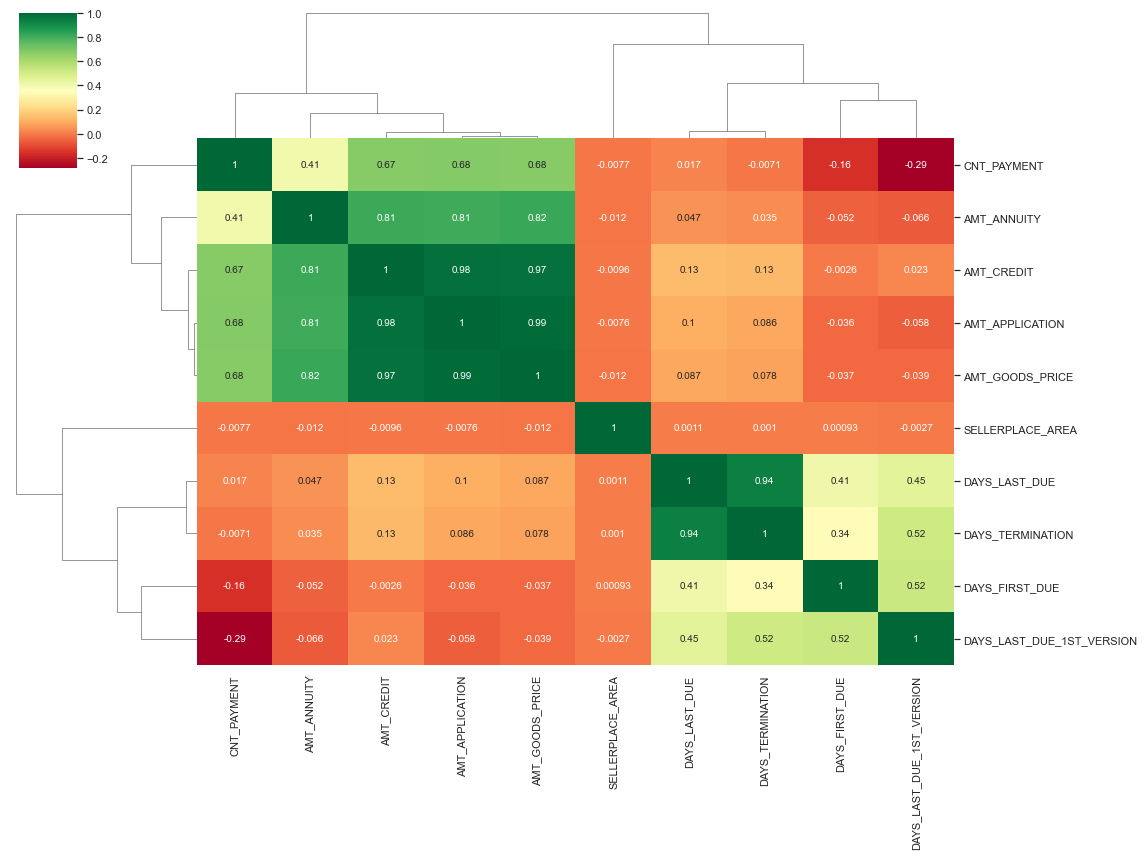

In [270]:
#Clustermap of all the relevant numeric columns 
#It shows varibles that are more and less correlated
sns.clustermap(previous_df[prev_top_corr_col].corr(), cmap = 'RdYlGn', annot = True, figsize = [16,12])
plt.show()

In [272]:
print(previous_cat_col)

Index(['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')


Deductions from the above barplots:

### The above top 10 features will help to know whether a loan lender is default or not.**
Important Observations
* **The people belongs to Maternity leave (>98%) and Unemployed(>55%) categories are the one who were tend to be defaulters and it is wise to check once again if such people approach bank to lend loans.**
* **Students are the one who are very less tend to default.**
* **The clients who are Refused to name the goal were the majority people who were being defaulters.**
* **The people who lend a loan to Buying a garage were very less to be in defaulters.**
* **The SCOFR reason category is the most CODE_REJECT_REASON which got highest percentage of Defaulters.**
* **The people who belongs to Transport:type 3 were the majority people in defaulters.**
* **The people who belongs to Industry:type 12 were the very less to be default.**
* **Low-skilled Laborers are the one who tend to being like defaulters.**
* **The people who belongs Accountants category are very fewer to be in defaulters.**
* **Highest percentage of Defaulters belongs to Insurance and Vehicles category.**
* **The people with Animals category in NAME_GOODS_CATEGORY are the fewer people who tend to default.**
* **The people with Lower secondary and Secondary / secondary special education type were the most defaulters and one need to take care of these category people while processing their loan application.**
* **The people with Acadamic degree are very less tend to default.**
* **AP+(Cash loan) category in CHANNEL_TYPE column data got highest percentage defaulters.**
* **Car dealer category people are very fewer percentage people to be in defaulters**
* **Cash Street: middle and Cash X-Sell: low category people are the majority people who tend to be defaulters.**
* **Auto Technology category in NAME_SELLER_INDUSTRY column got highest percentage of defaulters.**